Жук Татьяна

Telegram: @tatiana_zhuk 

# Классификация музыкальных треков по жанрам

Музыкальный сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Таким образом, цель проекта - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

**Описание данных**
 - instance_id - уникальный идентификатор трека
 - track_name - название трека
 - acousticness - акустичность
 - danceability - танцевальность
 - duration_ms -продолжительность в милисекундах
 - energy - энергичность
 - instrumentalness - инструментальность
 - key - базовый ключ (нота) произведения
 - liveness - привлекательность
 - loudness - громкость
 - mode - указывает на модальность (мажорную или минорную) трека
 - speechiness - выразительность
 - tempo - темп
 - obtained_date - дата загрузки в сервис
 - valence - привлекательность произведения для пользователей сервиса
 - music_genre - музыкальный жанр

## 1. Загрузка и ознакомление с данными

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
import matplotlib.pyplot as plt
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport
import phik
from phik import resources, report
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install imbalanced-learn
#import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, fbeta_score 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
import numpy as np
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\python_projects\Yandex_DS\Мастерская kaggle\датасет\kaggle_music_genre_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

Данные о базовом ключе, модальности и темпе представлены не полностью.

In [3]:
df.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


## 2. Предварительная обработка данных

In [4]:
df.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

Избавимся от пропусков:

In [5]:
data = df.dropna(subset=['key','mode','tempo'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18754 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       18754 non-null  float64
 1   track_name        18754 non-null  object 
 2   acousticness      18754 non-null  float64
 3   danceability      18754 non-null  float64
 4   duration_ms       18754 non-null  float64
 5   energy            18754 non-null  float64
 6   instrumentalness  18754 non-null  float64
 7   key               18754 non-null  object 
 8   liveness          18754 non-null  float64
 9   loudness          18754 non-null  float64
 10  mode              18754 non-null  object 
 11  speechiness       18754 non-null  float64
 12  tempo             18754 non-null  float64
 13  obtained_date     18754 non-null  object 
 14  valence           18754 non-null  float64
 15  music_genre       18754 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [6]:
data.duplicated().sum()

0

Дубликаты отсутствуют.

In [7]:
cat_columns = ['key', 'mode', 'music_genre']
for column in cat_columns:
    print(column)
    print(data[column].unique())
    print()

key
['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' 'G' 'C#' 'B']

mode
['Major' 'Minor']

music_genre
['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'
 'Anime' 'Rap' 'Classical']



Неявные дубликаты также отсутствуют.

In [8]:
data.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,18754.000000,18754.000000,18754.000000,1.875400e+04,18754.000000,18754.000000,18754.000000,18754.000000,18754.000000,18754.000000,18754.000000
mean,55928.931908,0.275025,0.561725,2.207254e+05,0.625431,0.160718,0.198873,-8.553494,0.091178,120.929143,0.464954
std,20712.918768,0.321970,0.171969,1.273069e+05,0.251477,0.307244,0.166665,5.505285,0.097573,30.423797,0.243685
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38045.250000,0.015000,0.451000,1.775178e+05,0.470000,0.000000,0.097400,-10.254750,0.035600,95.937250,0.272000
50%,55998.000000,0.121000,0.570000,2.197095e+05,0.666000,0.000146,0.130000,-7.044000,0.048950,120.011000,0.457000
75%,73889.250000,0.471000,0.682000,2.665068e+05,0.831000,0.085700,0.254000,-5.052250,0.094900,141.949000,0.654000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.932000,220.041000,0.992000


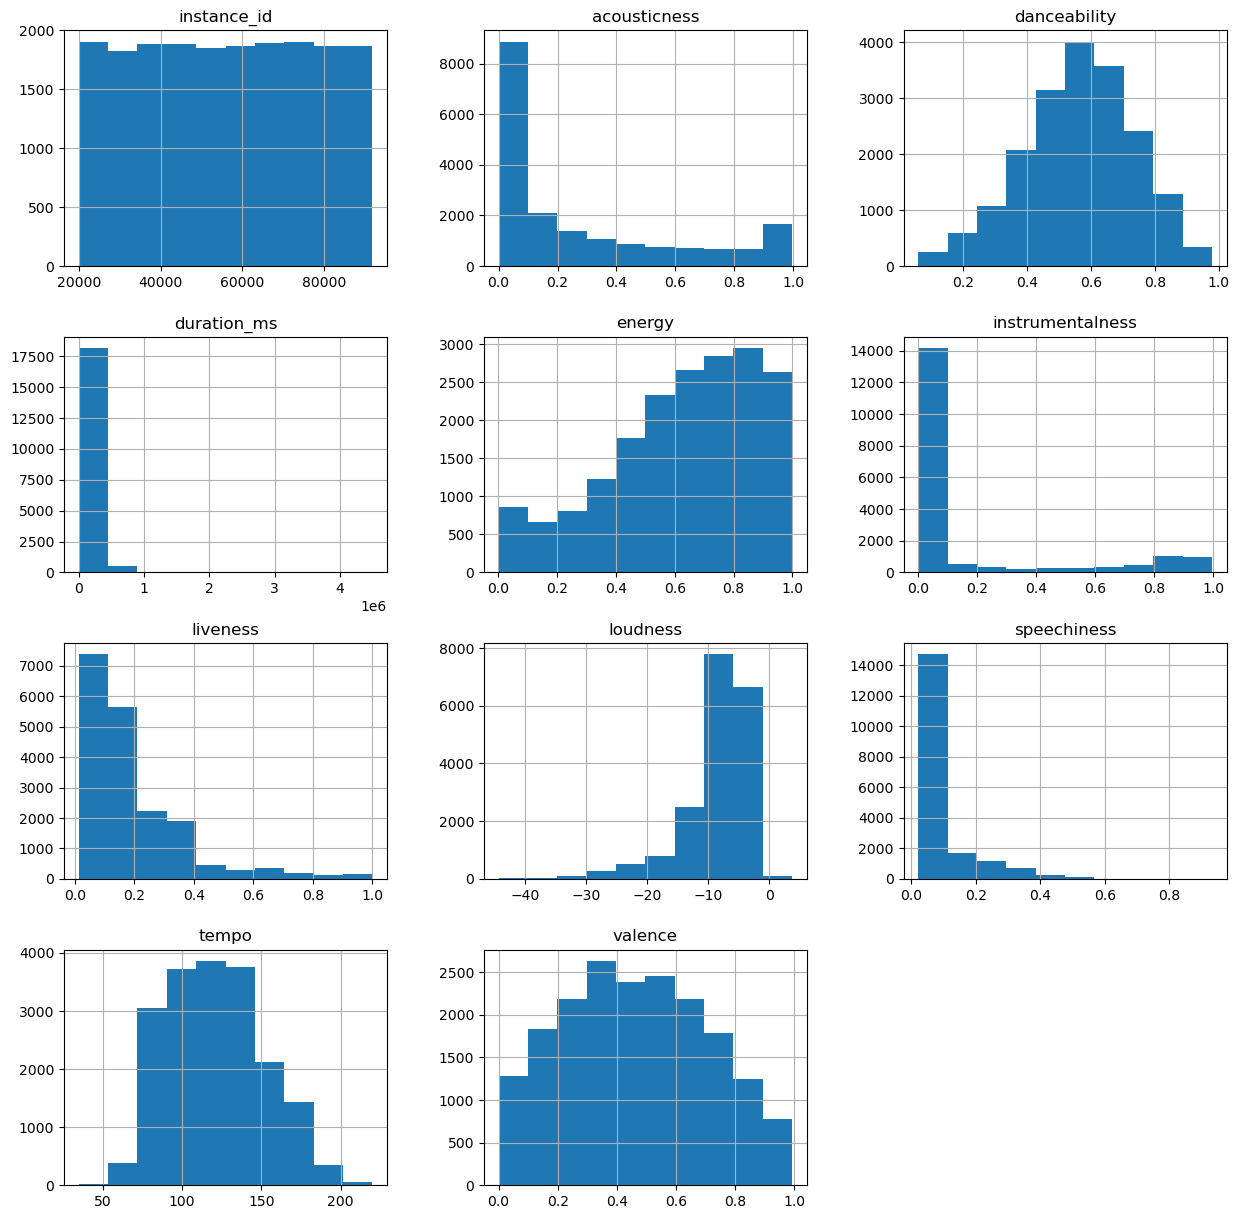

In [9]:
data.hist(figsize=(15,15));

Избавимся от выбросов:

In [10]:
MAXZ = 3

qcolumns = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness',
            'loudness','speechiness','tempo','valence']

for column in qcolumns:
    data['zscore'] = zscore(data[column])
    data = data[data['zscore']<=MAXZ]

data.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,zscore
count,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,17657.000000,1.765700e+04
mean,55961.789375,0.272386,0.563412,214634.614147,0.625997,0.161214,0.180022,-8.501534,0.081771,120.840989,0.466577,1.273264e-16
std,20742.611000,0.321268,0.170640,102070.598820,0.250793,0.308403,0.126748,5.501034,0.077187,30.169612,0.244053,1.000028e+00
min,20011.000000,0.000000,0.060000,-1.000000,0.001040,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000,-1.911841e+00
25%,38007.000000,0.014500,0.453000,177240.000000,0.471000,0.000000,0.096400,-10.195000,0.035200,95.984000,0.273000,-7.931989e-01
50%,56089.000000,0.117000,0.572000,218973.000000,0.666000,0.000154,0.127000,-6.973000,0.047900,120.010000,0.459000,-3.104732e-02
75%,73944.000000,0.466000,0.683000,263960.000000,0.830000,0.083700,0.235000,-5.019000,0.088200,141.463000,0.655000,7.720802e-01
max,91758.000000,0.996000,0.975000,601600.000000,0.999000,0.996000,0.697000,3.744000,0.380000,211.261000,0.992000,2.152968e+00


Удалим неинформативные признаки:

In [11]:
data = data.drop(columns=['instance_id','track_name', 'zscore', 'obtained_date'])

## 3. Разведочный анализ данных

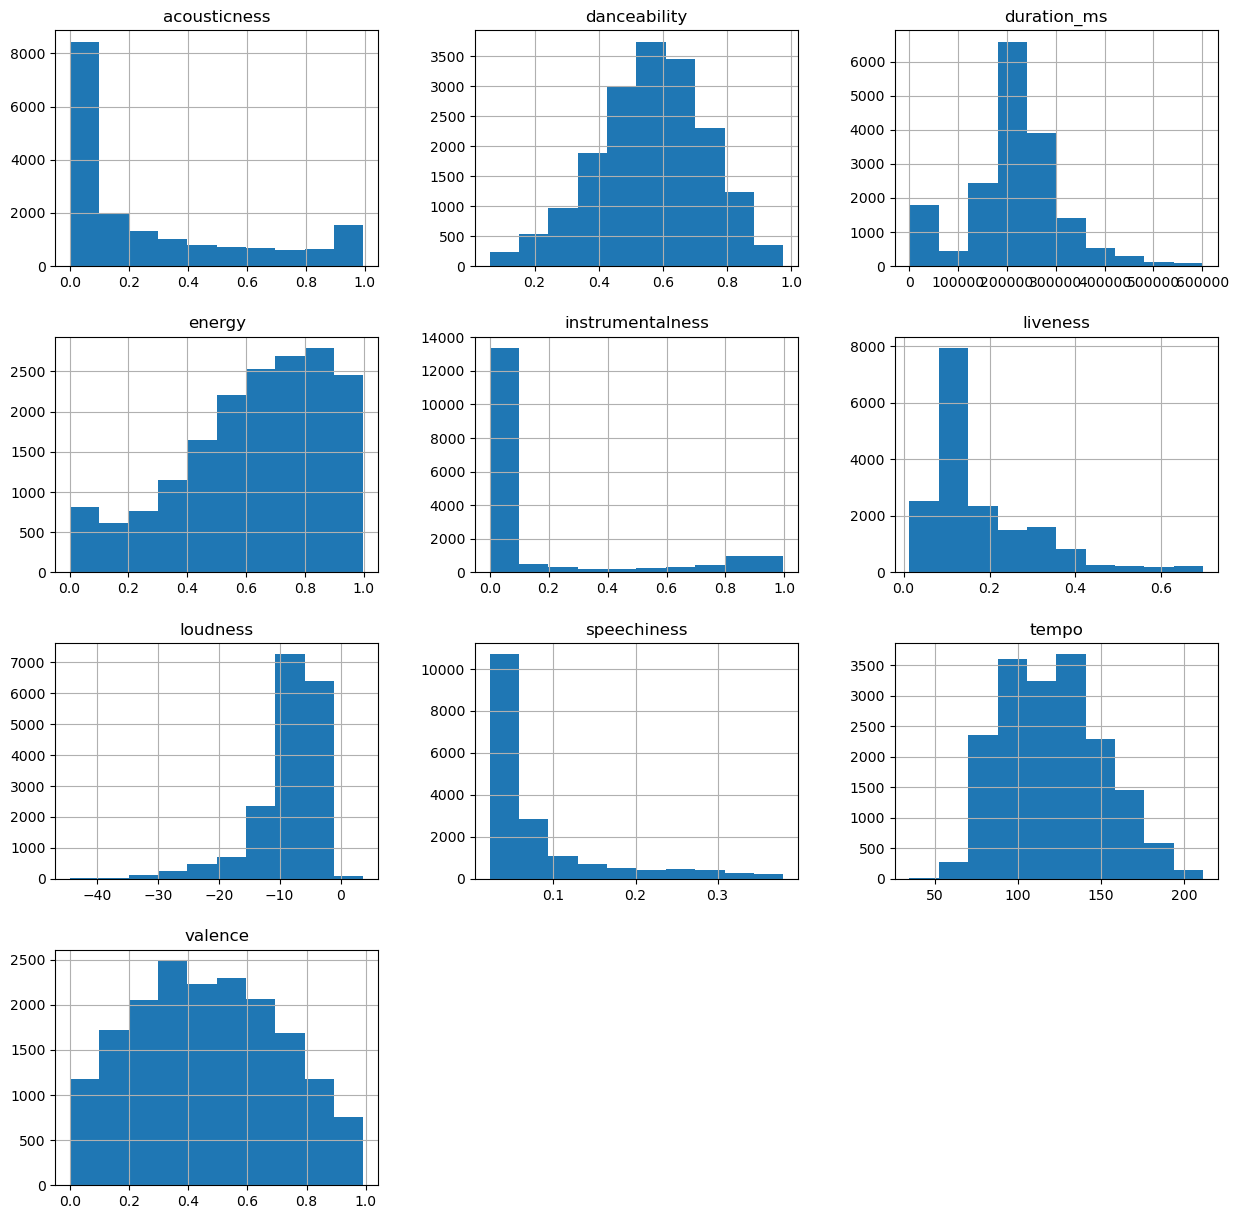

In [12]:
data.hist(figsize=(15,15));

In [13]:
#prof = ProfileReport(data)
#prof.to_file(output_file='output.html')

In [14]:
#prof.to_notebook_iframe()

Рассмотрим корреляции между переменными в данных:

In [15]:
data.loc[:, 'acousticness':'music_genre'].phik_matrix()

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
acousticness,1.000000,0.452479,0.250571,0.769010,0.441299,0.096342,0.212676,0.709285,0.022767,0.267792,0.326331,0.387445,0.652544
danceability,0.452479,1.000000,0.249993,0.508219,0.332828,0.098293,0.114642,0.472659,0.105857,0.371828,0.410012,0.525102,0.619352
duration_ms,0.250571,0.249993,1.000000,0.261260,0.333237,0.033573,0.076860,0.312172,0.033427,0.122455,0.117263,0.240446,0.373116
energy,0.769010,0.508219,0.261260,1.000000,0.435987,0.091752,0.286361,0.839217,0.029123,0.361367,0.379129,0.473013,0.668583
instrumentalness,0.441299,0.332828,0.333237,0.435987,1.000000,0.030999,0.141175,0.501614,0.095840,0.198522,0.202389,0.352349,0.568161
key,0.096342,0.098293,0.033573,0.091752,0.030999,1.000000,0.052675,0.082735,0.350496,0.124842,0.043370,0.040831,0.163129
liveness,0.212676,0.114642,0.076860,0.286361,0.141175,0.052675,1.000000,0.216151,0.000000,0.154079,0.098921,0.197679,0.153719
loudness,0.709285,0.472659,0.312172,0.839217,0.501614,0.082735,0.216151,1.000000,0.015289,0.265053,0.346226,0.429957,0.677619
mode,0.022767,0.105857,0.033427,0.029123,0.095840,0.350496,0.000000,0.015289,1.000000,0.138332,0.017686,0.069330,0.299688
speechiness,0.267792,0.371828,0.122455,0.361367,0.198522,0.124842,0.154079,0.265053,0.138332,1.000000,0.194570,0.150430,0.518618


interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


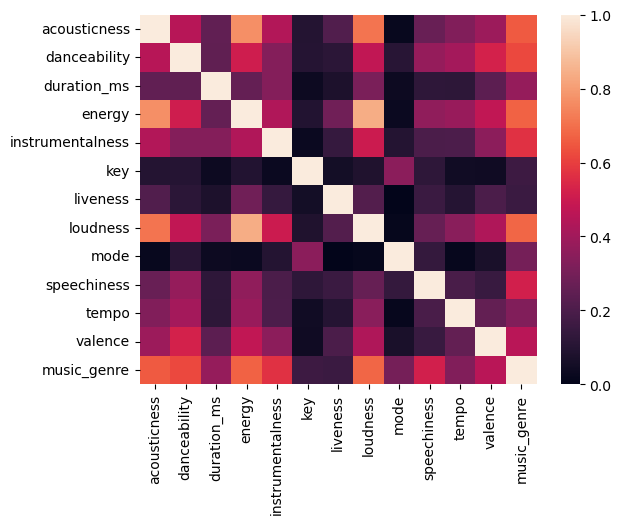

In [16]:
sns.heatmap(data.loc[:, 'acousticness':'music_genre'].phik_matrix());

Наибольшая взаимосвязь между музыкальным жанром прослеживается у акустичности, танцевальности, энергичности и громкости. Рассмотрим подробнее, как распределяются музыкальные характеристики в каждом жанре:

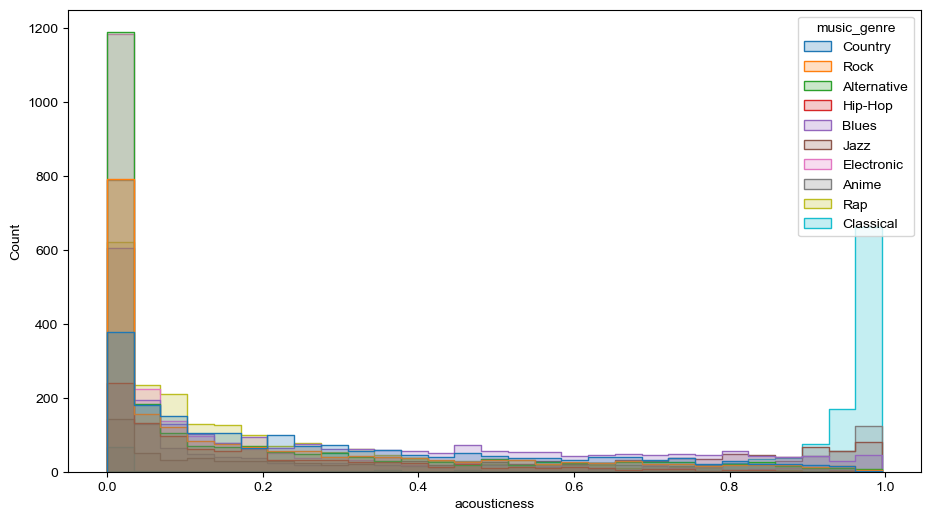

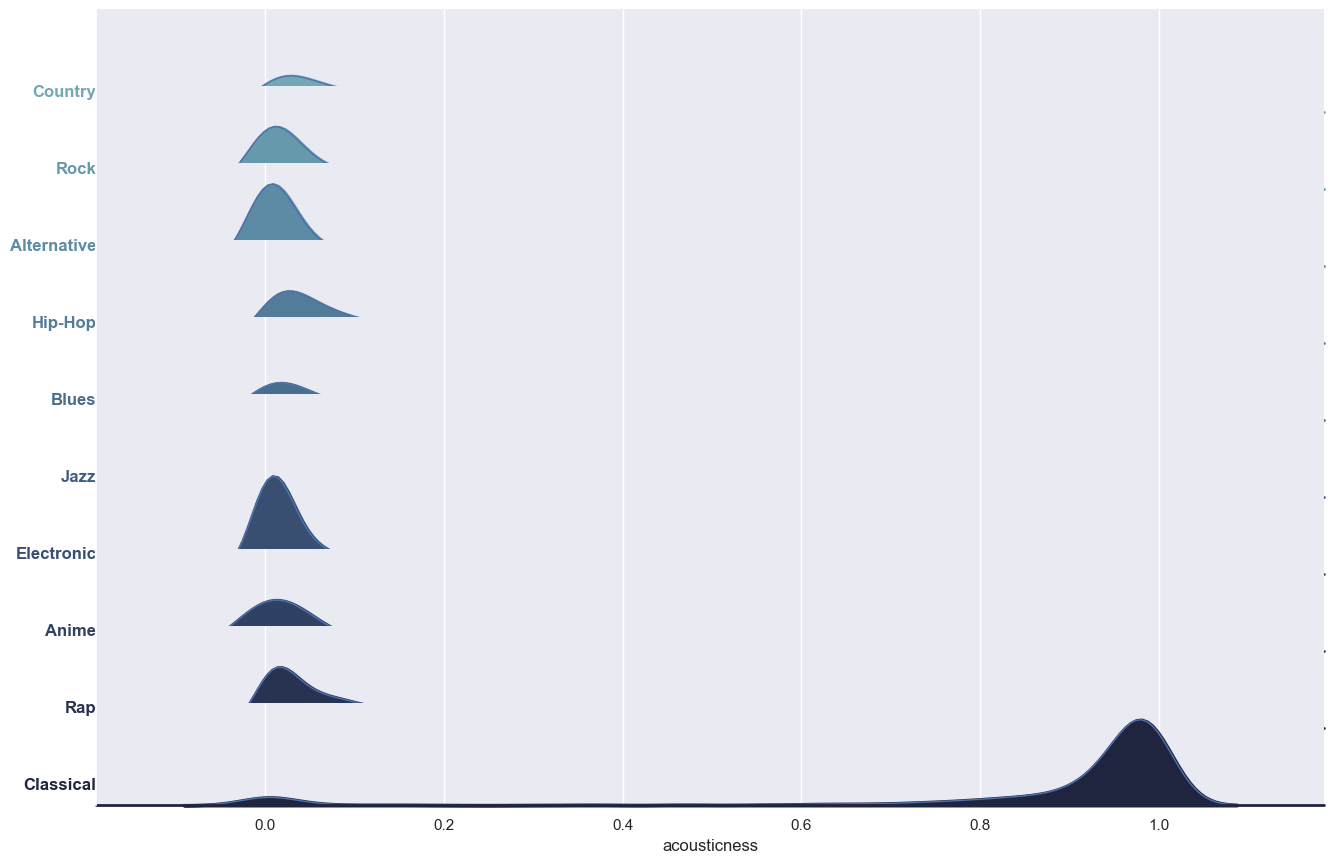

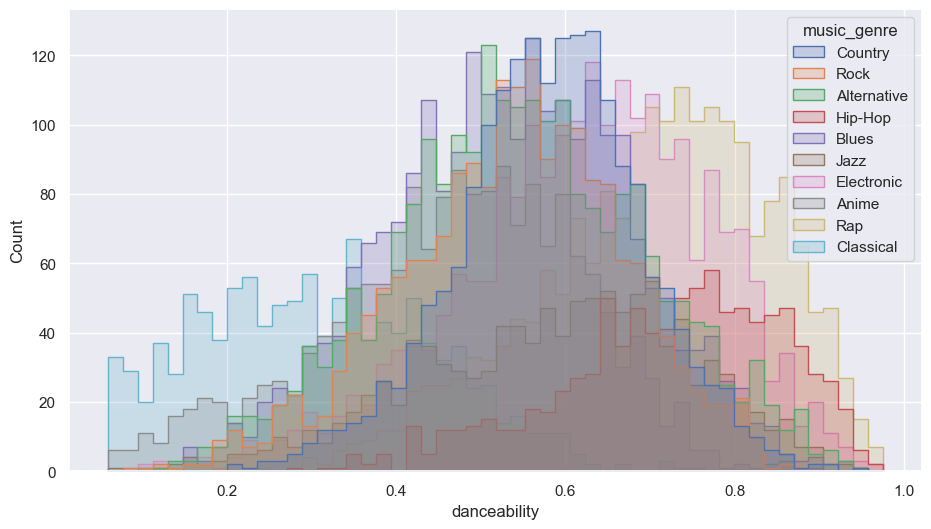

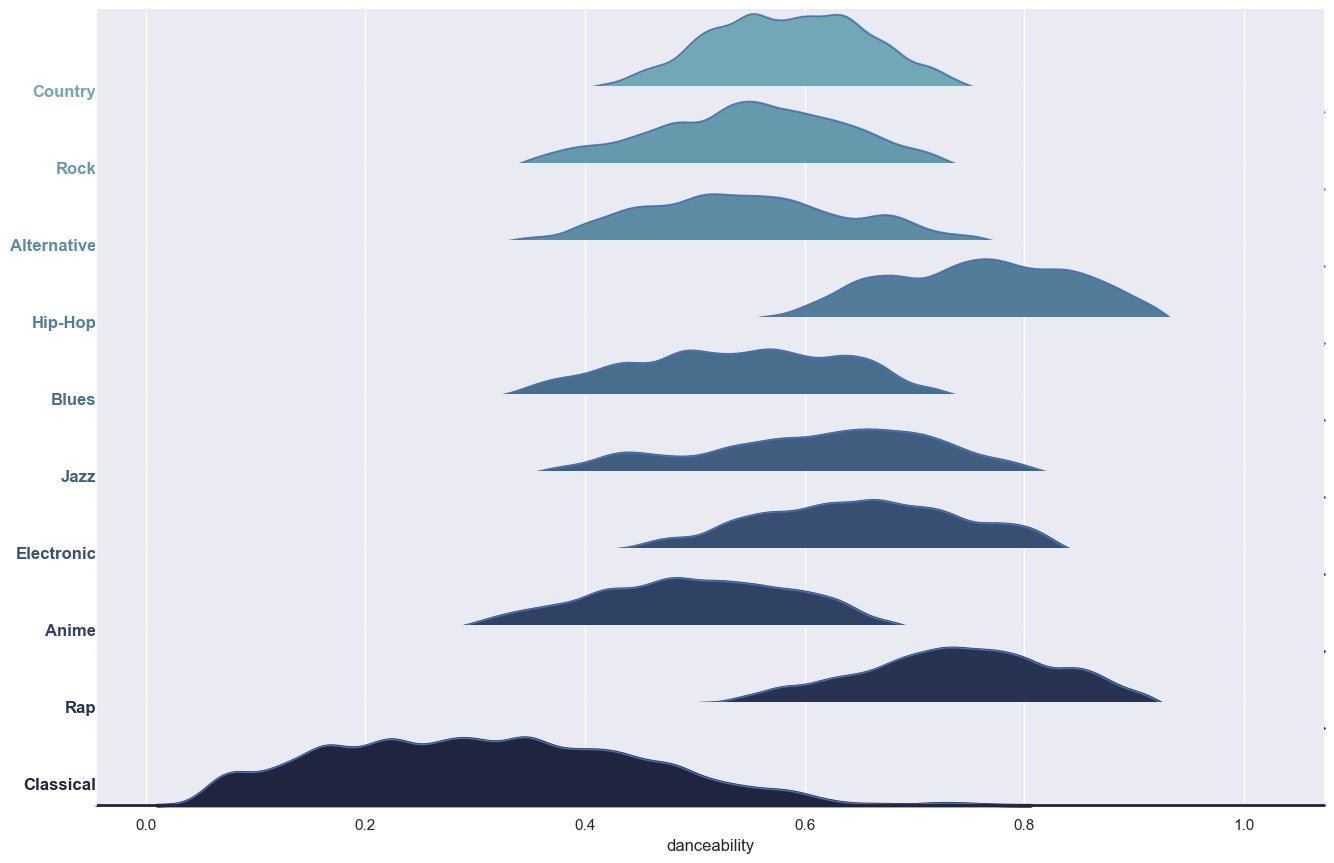

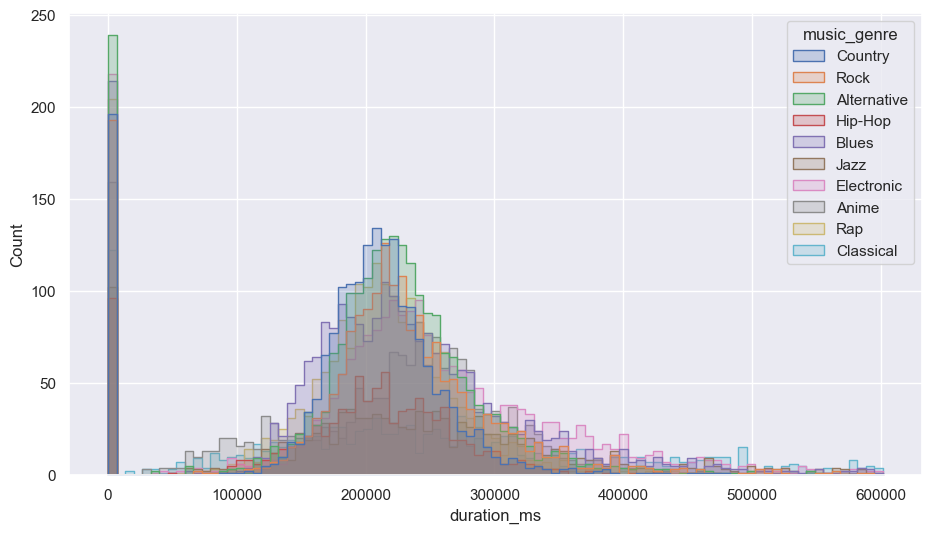

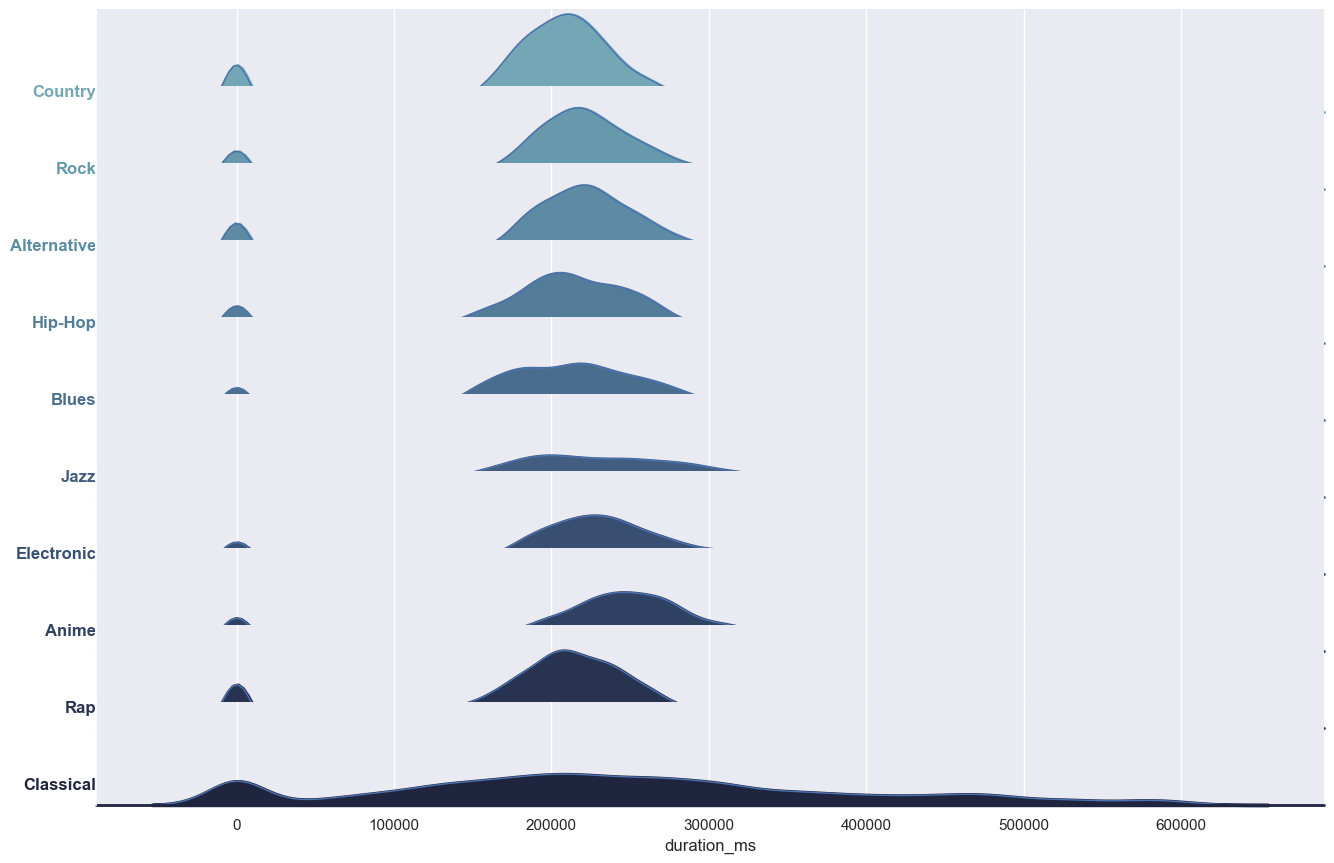

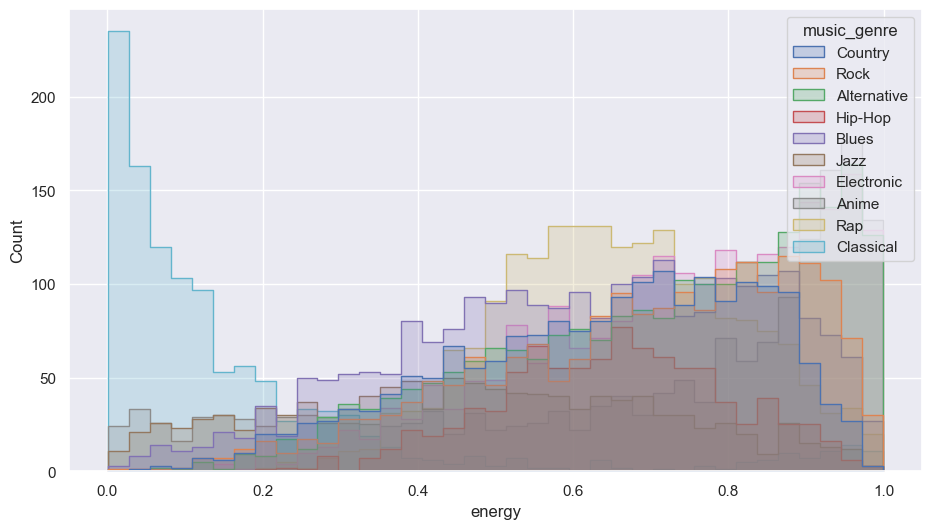

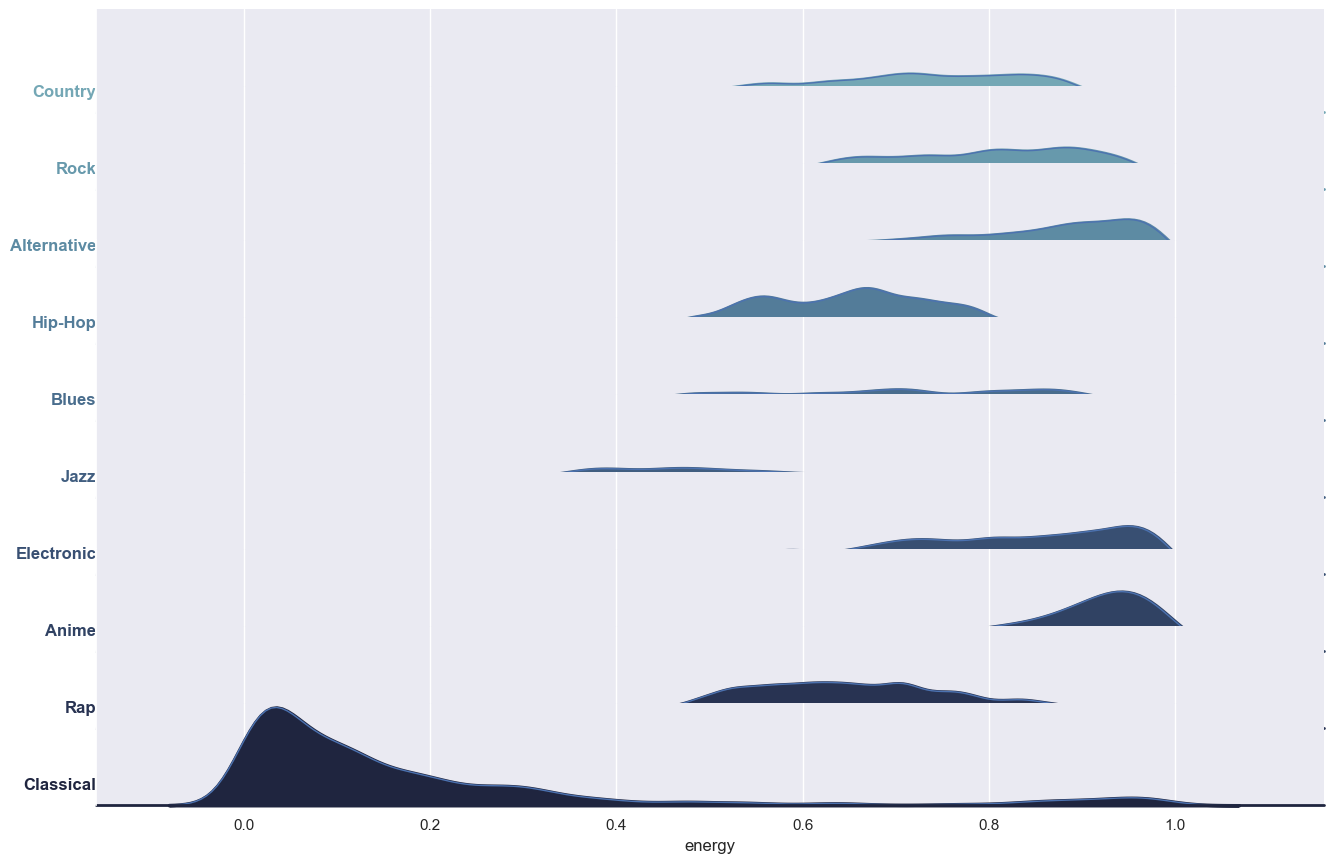

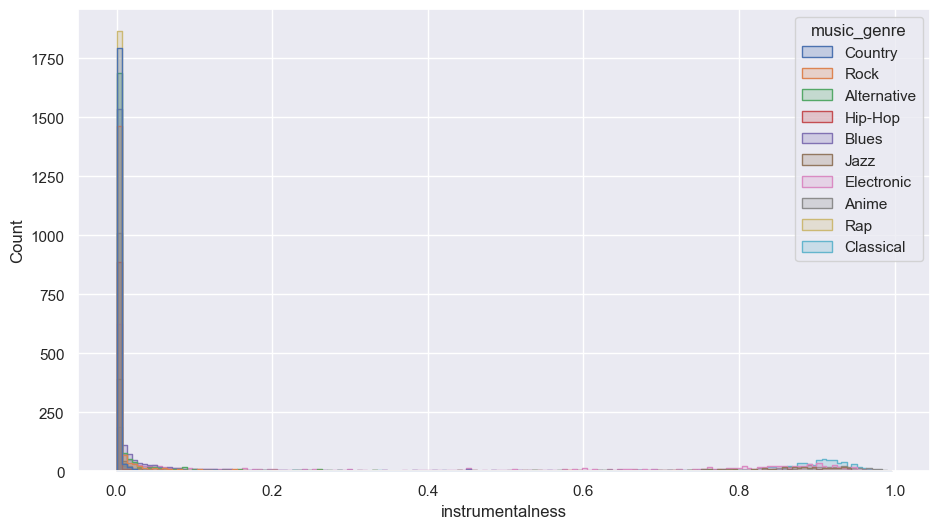

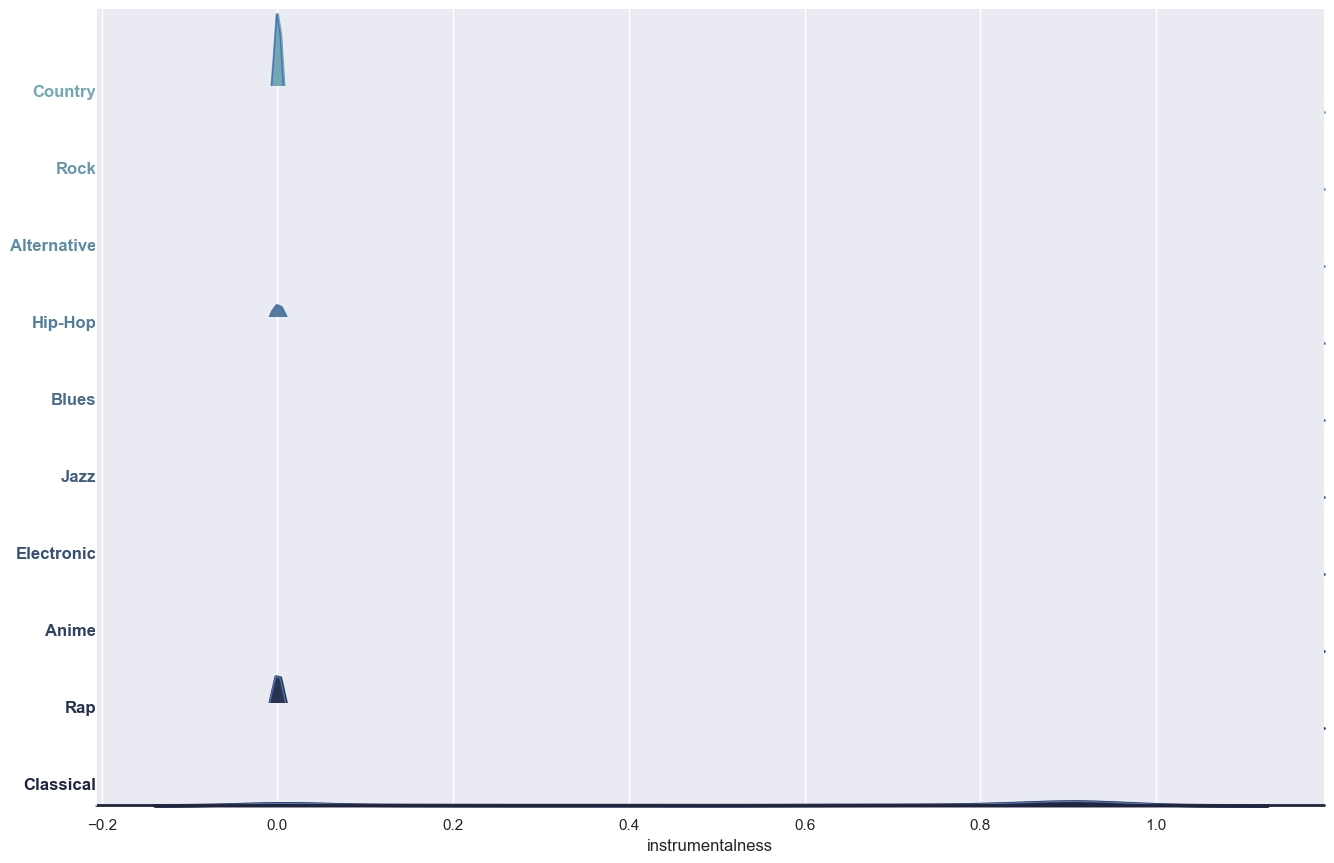

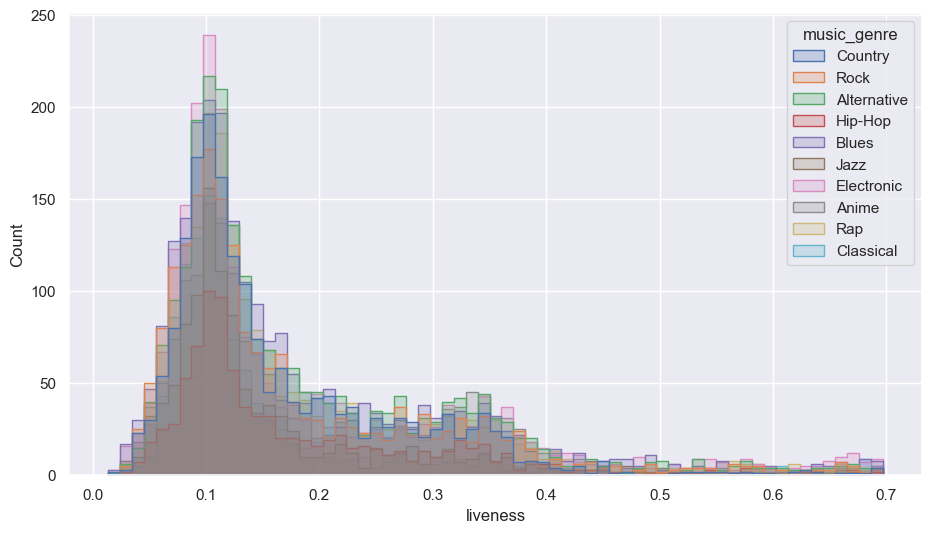

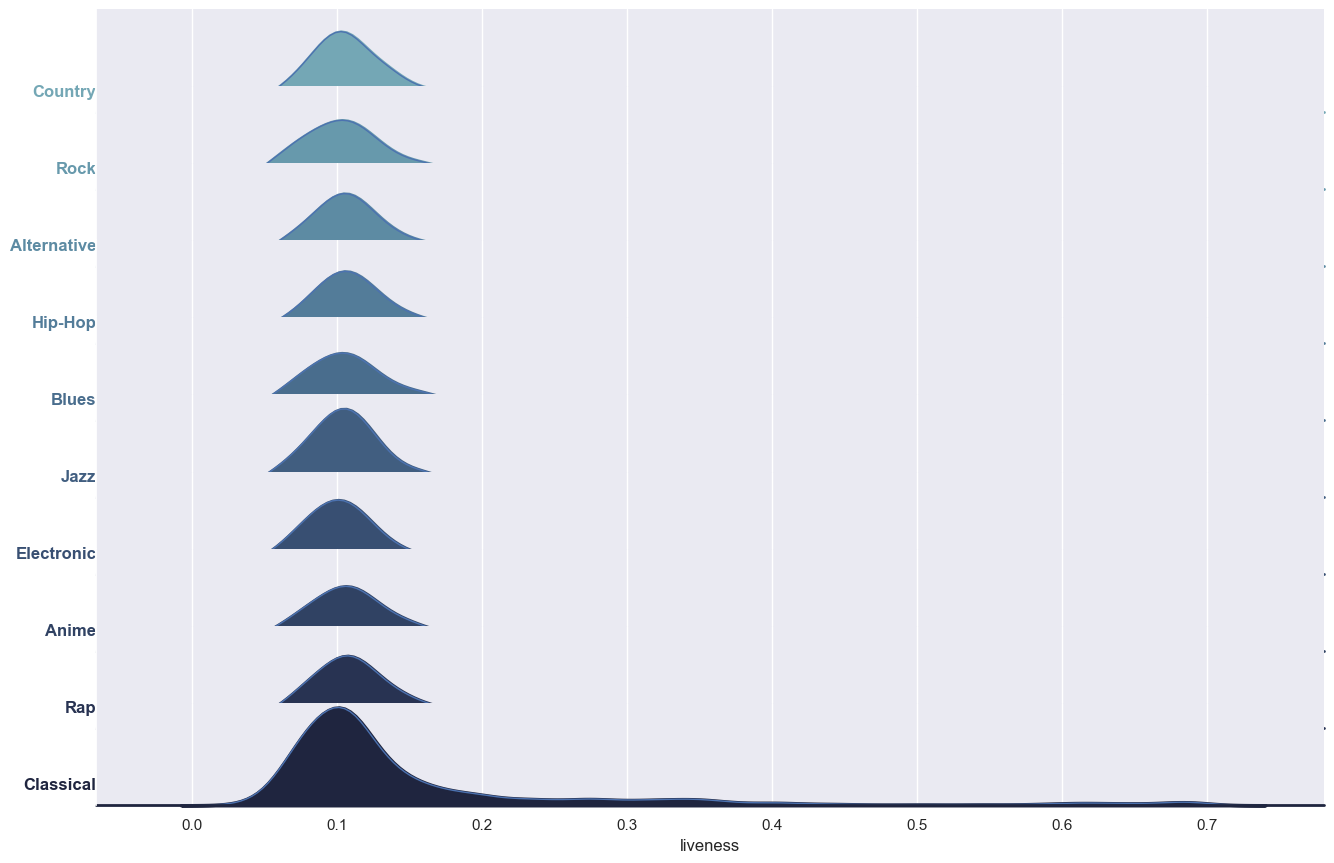

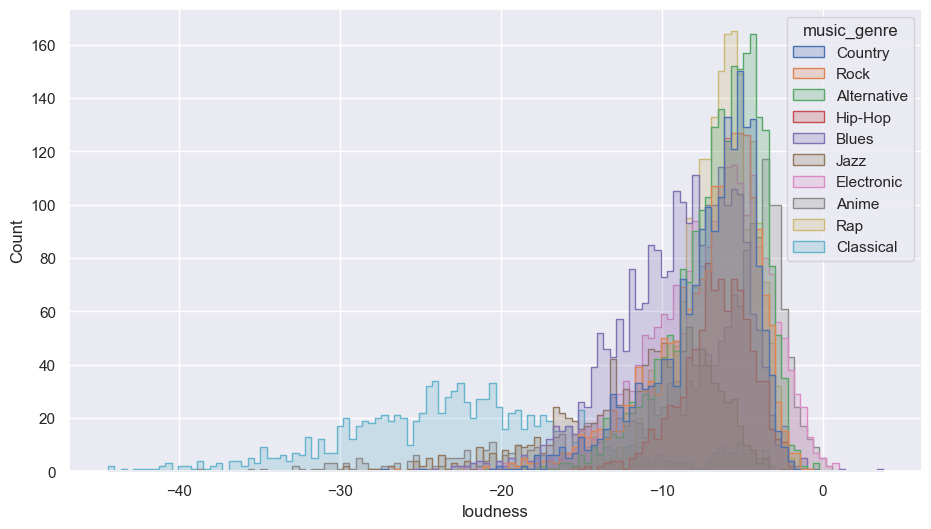

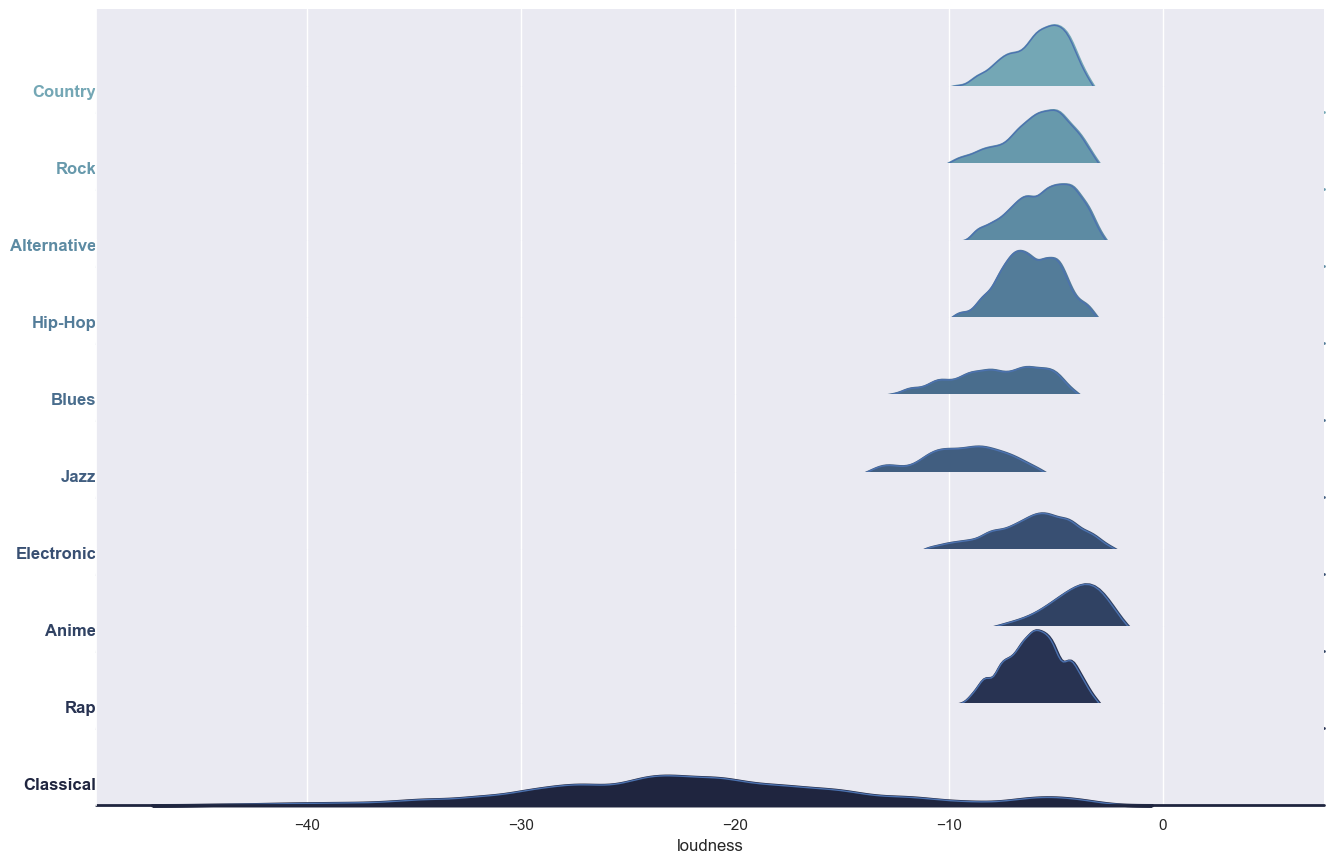

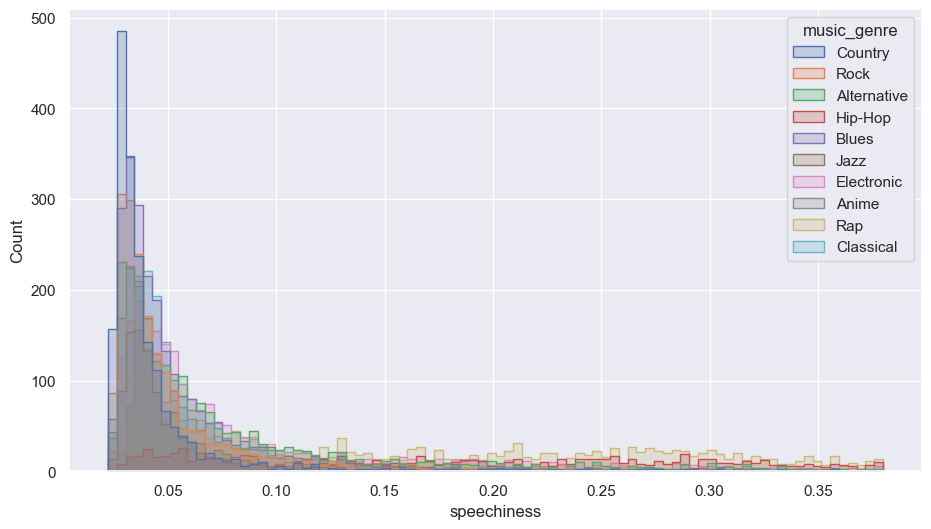

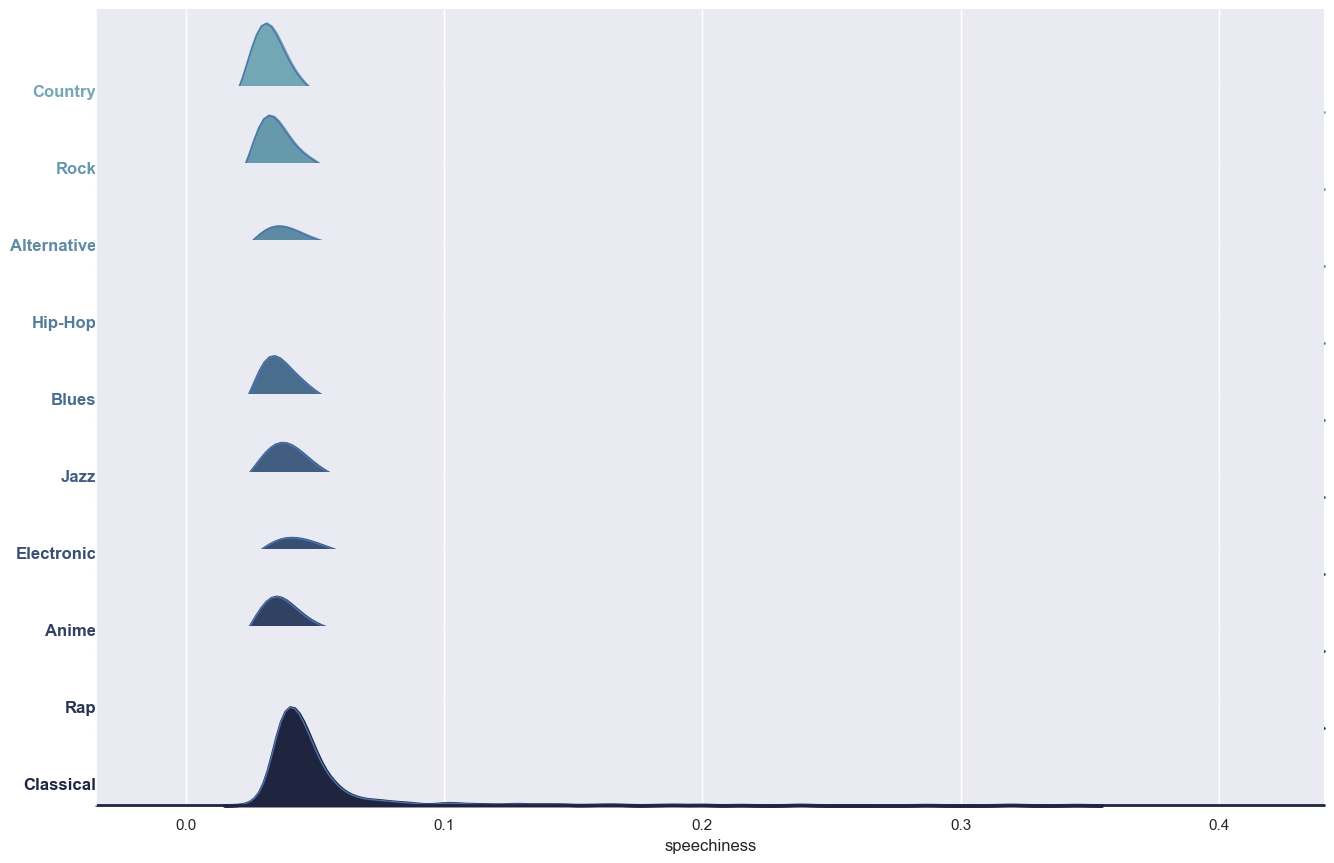

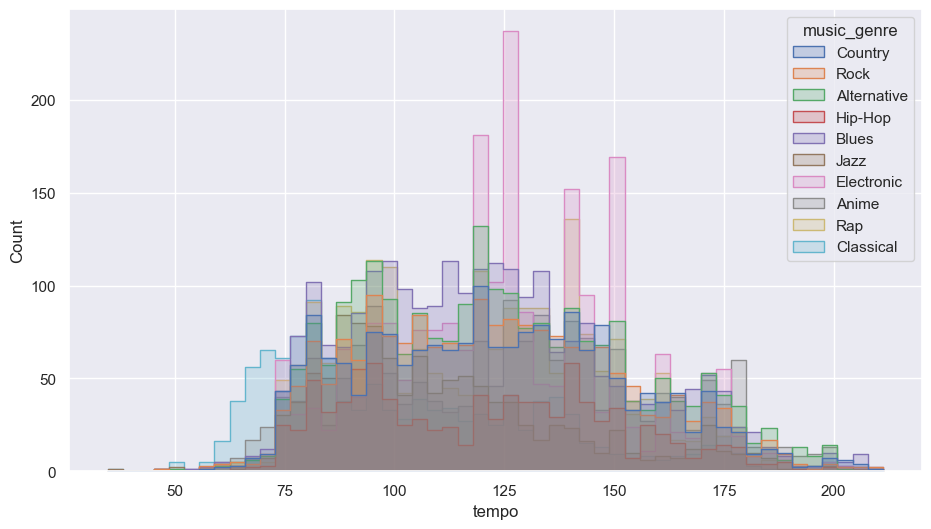

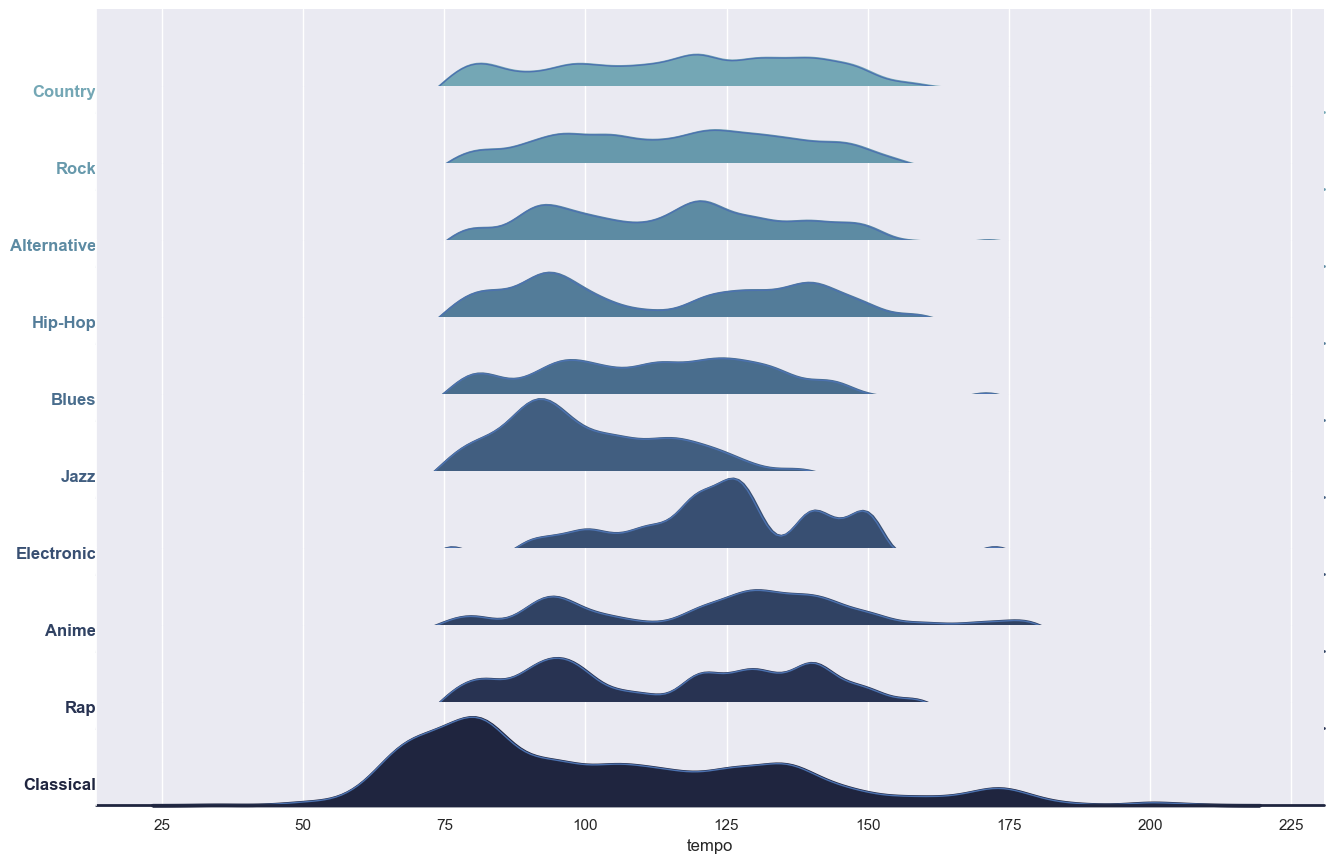

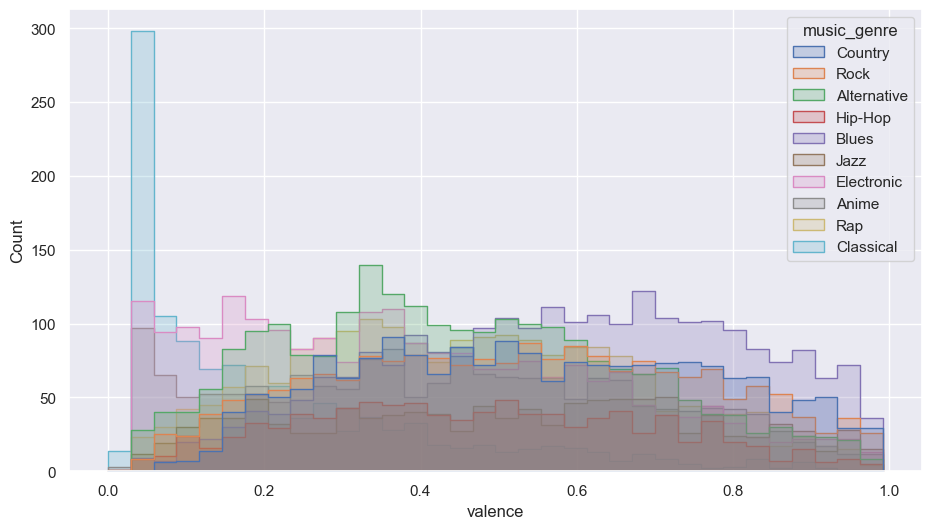

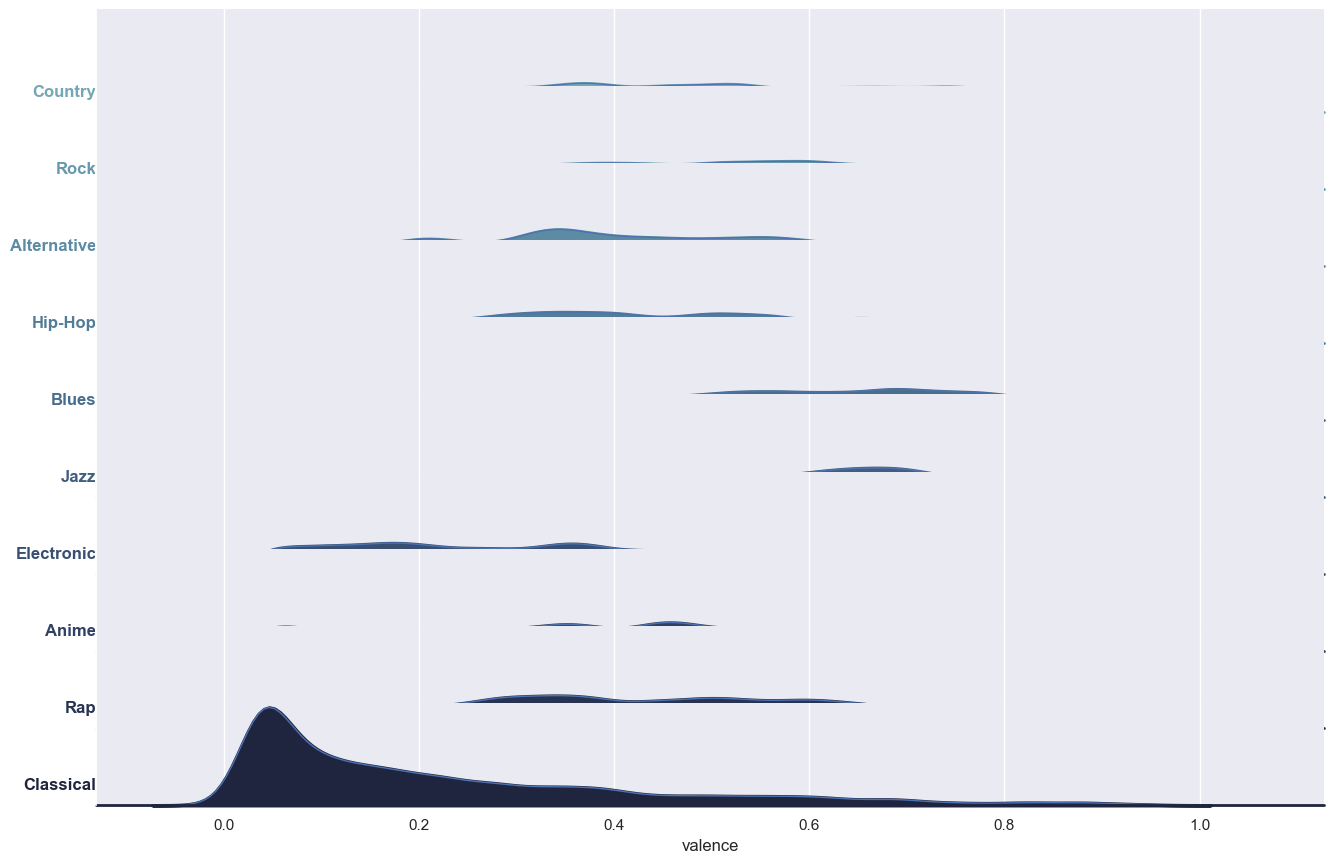

In [17]:
for col in qcolumns:
    fig, ax = plt.subplots(figsize=(11, 6))
    sns.histplot(data, x=col, hue="music_genre", element="step")
    sns.set(rc={'figure.figsize':(30,7)})
    
    
    pal = sns.cubehelix_palette(10, rot=-.25, light=0.6)
    g = sns.FacetGrid(data, row="music_genre", hue="music_genre", aspect=15, height=.9, palette=pal)


    g.map(sns.kdeplot, col,
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=2.5)
    g.map(sns.kdeplot, col, clip_on=False, color='b', lw=1, bw_adjust=.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="right", va="center", transform=ax.transAxes)


    g.map(label, col)

    g.figure.subplots_adjust(hspace=-.25)

    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=False);

 - Жанры, обладающие минимальной акустичностью чаще всего относятся к року, альтернативе и электронике. Высокой акустичностью чаще обладает классическая музыка.
 - Самой высокой тацевальностью обладают рэп и хип-хоп. Наименьшая – у классической музыки. Танцевальность остальных жанров распределяется нормально вокруг средних значений.
 - Как самые короткие, так и самые длинные композиции принадлежат классике. Длительность треков остальных жанров – приближенно сопоставима.
 - Все композиции с низким уровнем энергичности относятся к классической музыке. Наибольшая энергичность бывает у аниме, альтернативы, рока и электроники.
 - Инструментальность одинаковая для всех жанров, кроме классики, в которой признак распределен равномерно от минимальных до максимальных значений. 
 - Привлекательность распределена нормально около одинакового уровня во всех музыкальных жанрах.
 - Наименьшей громкостью обладают треки с классической музыкой. Также, блюз и джаз тише остальных жанров. У остальных жанров громкость одного, более высокого уровня. 
 - Выразительность всех жанров находится на одинаковом уровне.
 - Классические и джазовые треки, а также рэп чаще других бывают медленные. Треки остальных жанров имеют одинаковое распределение темпа.
 - Наименьшей привлекательностью для пользователей сервиса обладают произведения классической музыки, а также электроники. К наиболее привлекательным относятся блюз и джаз.


## 4. Подготовка обучающей и валидационной выборок

In [18]:
features = data.drop(columns = 'music_genre')
target = data['music_genre']

In [19]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)
print(features_train.shape, features_valid.shape)
print(target_train.shape, target_valid.shape)

(12359, 12) (5298, 12)
(12359,) (5298,)


In [20]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
encoder.fit(features_train[['key', 'mode']])
train_features_encoded = pd.DataFrame(encoder.transform(features_train[['key', 'mode']]))
train_features_encoded.columns = encoder.get_feature_names_out()
train_features_encoded.head()

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data_to_join = features_train.drop(columns=['key', 'mode']).reset_index(drop=True)
train_features_encoded = data_to_join.join(train_features_encoded)
train_features_encoded.shape

(12359, 22)

In [22]:
train_features_encoded.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.0830,0.672,231707.0,0.647,0.000000,0.1330,-6.401,0.0536,140.020,0.718,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.5260,0.626,255333.0,0.590,0.000123,0.0812,-10.545,0.0462,131.836,0.796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0153,0.507,243493.0,0.910,0.000000,0.0947,-6.214,0.0718,140.179,0.605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2370,0.582,177267.0,0.641,0.000000,0.1320,-7.621,0.0297,148.634,0.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4820,0.535,201000.0,0.425,0.000335,0.0842,-8.392,0.0292,64.712,0.239,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
valid_features_encoded = pd.DataFrame(encoder.transform(features_valid[['key','mode']]))
valid_features_encoded.columns = encoder.get_feature_names_out()
valid_features_encoded.head()

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
features_valid = features_valid.drop(columns=['key','mode']).reset_index(drop=True)
valid_features_encoded = features_valid.join(valid_features_encoded)
valid_features_encoded.shape


(5298, 22)

In [25]:
scaler = StandardScaler()
scaler.fit(train_features_encoded)
sc_train_features = pd.DataFrame(scaler.transform(train_features_encoded), columns = train_features_encoded.columns, 
                                 index = train_features_encoded.index)
sc_train_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-0.590368,0.634784,0.162400,0.084544,-0.520643,-0.370529,0.380645,-0.369408,0.635427,1.034814,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,5.637596,-0.291676,-0.295091,-0.254175,-0.368839,-0.27142,1.340443
1,0.792309,0.364157,0.391363,-0.143028,-0.520242,-0.781178,-0.371853,-0.464633,0.364535,1.354735,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,2.711213,-0.27142,-0.746022
2,-0.801671,-0.335946,0.276620,1.134567,-0.520643,-0.674155,0.414602,-0.135206,0.640690,0.571338,-0.260785,-0.288232,2.891864,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.27142,-0.746022
3,-0.109708,0.105295,-0.365188,0.060589,-0.520643,-0.378456,0.159109,-0.676959,0.920551,1.617235,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.27142,-0.746022
4,0.654978,-0.171216,-0.135187,-0.801787,-0.519551,-0.757395,0.019105,-0.683393,-1.857279,-0.929833,-0.260785,-0.288232,2.891864,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.27142,-0.746022


In [26]:
sc_valid_features = pd.DataFrame(scaler.transform(valid_features_encoded), columns = valid_features_encoded.columns, 
                                 index = valid_features_encoded.index)
sc_valid_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-0.652167,-0.159449,-0.244213,-0.606156,-0.512199,-0.697938,0.191976,-0.415734,0.876727,0.034034,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,3.428467,-0.295091,-0.254175,-0.368839,-0.271420,1.340443
1,-0.801047,-0.259464,-2.083122,0.208311,-0.520643,-1.067364,0.660108,-0.438897,1.863674,-0.281786,-0.260785,-0.288232,2.891864,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,-0.746022
2,-0.849407,-0.459493,0.055797,1.074679,2.247532,-0.726477,0.570041,-0.463346,-0.851895,-0.568895,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,3.684331,-0.746022
3,1.865991,-1.436107,1.073883,-1.244953,2.417078,-0.765322,-0.807844,-0.653796,0.896057,-0.347411,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,1.340443
4,-0.300099,1.987924,-2.083122,-0.857682,-0.520643,-0.481515,0.578575,1.733262,-1.216526,0.825634,-0.260785,-0.288232,-0.345798,2.924210,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,-0.746022


Проверим сбалансированность выборки:

In [27]:
data['music_genre'].value_counts()

Blues          2399
Alternative    2295
Electronic     2224
Rap            1995
Rock           1926
Country        1895
Anime          1725
Classical      1145
Jazz           1112
Hip-Hop         941
Name: music_genre, dtype: int64

Баланс классов не равномерный. Визуализируем распределение жанров в выборке:

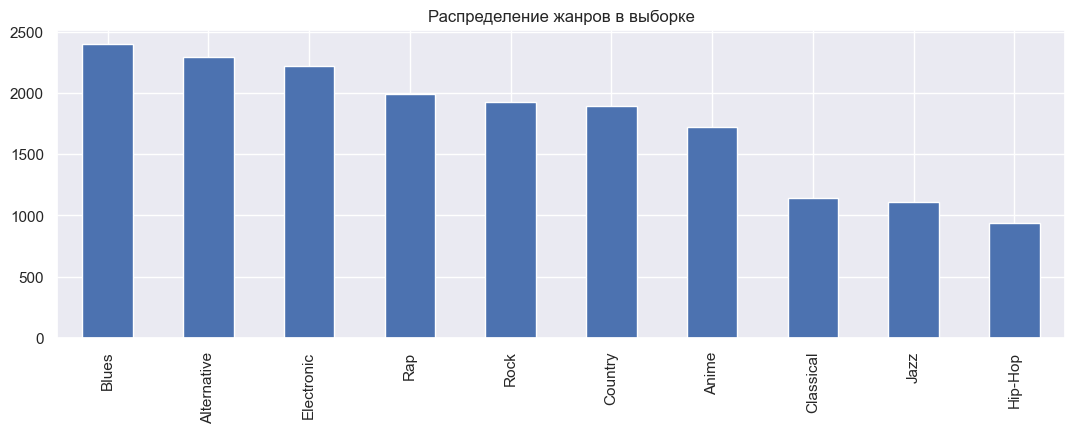

In [28]:
data['music_genre'].value_counts().plot(kind='bar', title='Распределение жанров в выборке', figsize=(13,4));

Произведем балансировку:

In [29]:
sm = SMOTE(random_state=12345)
sm_features_train, sm_target_train = sm.fit_resample(sc_train_features, target_train)

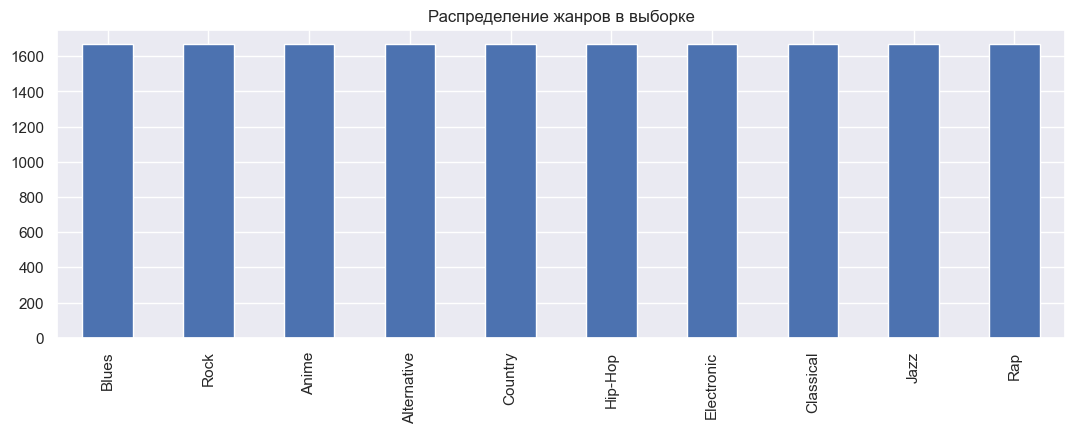

In [30]:
sm_target_train.value_counts().plot(kind='bar', title='Распределение жанров в выборке', figsize=(13,4));

## 5. Расчет базовой модели

In [31]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.28      0.20      0.23       686
       Anime       0.28      0.22      0.25       539
       Blues       0.41      0.31      0.35       731
   Classical       0.68      0.81      0.74       342
     Country       0.34      0.64      0.45       578
  Electronic       0.58      0.50      0.54       637
     Hip-Hop       0.23      0.46      0.31       269
        Jazz       0.31      0.40      0.35       337
         Rap       0.41      0.28      0.33       601
        Rock       0.20      0.14      0.16       578

    accuracy                           0.37      5298
   macro avg       0.37      0.40      0.37      5298
weighted avg       0.37      0.37      0.36      5298

Accuracy:  0.37013967534918835
F1 мера_micro:  0.37013967534918835
F1 мера_macro:  0.3697267971763926
F1 мера_weighted:  0.36441635136500083


Чтобы оценить стабильность качества моделей, проверим результаты с помощью кросс-валидации.

In [32]:
pipeline = Pipeline([('smote', sm), ('model', model)])         

In [33]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
          'f1_micro' : make_scorer(fbeta_score, beta=0.5, average='micro'),
           'f1_macro' : make_scorer(fbeta_score, beta=0.5, average='macro'), 
           'f1_weighted' : make_scorer(fbeta_score, beta=0.5, average='weighted')}

In [34]:
def cv_score(pipe, features, target, scoring):
    
    results = cross_validate(pipeline, features, target, cv=5, scoring=scoring)

    print('accuracy')
    print('test_accuracy: ', results['test_accuracy'].mean().round(4))
    print('Стандартное отклонение: ', results['test_accuracy'].std().round(4))
    print('2,5% квантиль', pd.Series(results['test_accuracy']).quantile(0.025).round(4))
    print('97,5% квантиль', pd.Series(results['test_accuracy']).quantile(0.975).round(4))
    print()
    print()

    print('f1_micro')
    print('f1_micro: ', results['test_f1_micro'].mean().round(4))
    print('Стандартное отклонение: ', results['test_f1_micro'].std().round(4))
    print('2,5% квантиль', pd.Series(results['test_f1_micro']).quantile(0.025).round(4))
    print('97,5% квантиль', pd.Series(results['test_f1_micro']).quantile(0.975).round(4))
    print()
    print()

    print('f1_macro')
    print('f1_macro: ', results['test_f1_macro'].mean().round(4))
    print('Стандартное отклонение: ', results['test_f1_macro'].std().round(4))
    print('2,5% квантиль', pd.Series(results['test_f1_macro']).quantile(0.025).round(4))
    print('97,5% квантиль', pd.Series(results['test_f1_macro']).quantile(0.975).round(4))
    print()
    print()

    print('f1_weighted')
    print('f1_weighted: ', results['test_f1_weighted'].mean().round(4))
    print('Стандартное отклонение: ', results['test_f1_weighted'].std().round(4))
    print('2,5% квантиль', pd.Series(results['test_f1_weighted']).quantile(0.025).round(4))
    print('97,5% квантиль', pd.Series(results['test_f1_weighted']).quantile(0.975).round(4))
    print()
    print()


In [35]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_micro
f1_micro:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_macro
f1_macro:  0.3641
Стандартное отклонение:  0.0113
2,5% квантиль 0.3552
97,5% квантиль 0.3838


f1_weighted
f1_weighted:  0.3596
Стандартное отклонение:  0.0113
2,5% квантиль 0.3523
97,5% квантиль 0.3795




In [36]:
model = DecisionTreeClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.20      0.20      0.20       686
       Anime       0.32      0.32      0.32       539
       Blues       0.29      0.24      0.26       731
   Classical       0.64      0.68      0.66       342
     Country       0.34      0.34      0.34       578
  Electronic       0.49      0.44      0.46       637
     Hip-Hop       0.19      0.27      0.22       269
        Jazz       0.23      0.28      0.25       337
         Rap       0.35      0.32      0.34       601
        Rock       0.16      0.16      0.16       578

    accuracy                           0.31      5298
   macro avg       0.32      0.32      0.32      5298
weighted avg       0.32      0.31      0.31      5298

Accuracy:  0.3103057757644394
F1 мера_micro:  0.3103057757644394
F1 мера_macro:  0.3196812188297835
F1 мера_weighted:  0.31387194198203366


In [37]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_micro
f1_micro:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_macro
f1_macro:  0.3641
Стандартное отклонение:  0.0113
2,5% квантиль 0.3552
97,5% квантиль 0.3838


f1_weighted
f1_weighted:  0.3596
Стандартное отклонение:  0.0113
2,5% квантиль 0.3523
97,5% квантиль 0.3795




In [38]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.34      0.26      0.29       686
       Anime       0.46      0.45      0.46       539
       Blues       0.47      0.41      0.44       731
   Classical       0.71      0.84      0.77       342
     Country       0.44      0.58      0.50       578
  Electronic       0.57      0.63      0.60       637
     Hip-Hop       0.19      0.27      0.22       269
        Jazz       0.31      0.36      0.33       337
         Rap       0.44      0.44      0.44       601
        Rock       0.20      0.13      0.16       578

    accuracy                           0.43      5298
   macro avg       0.41      0.44      0.42      5298
weighted avg       0.42      0.43      0.42      5298

Accuracy:  0.4301623254058135
F1 мера_micro:  0.4301623254058135
F1 мера_macro:  0.41605062118465463
F1 мера_weighted:  0.41948100419986467


In [39]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_micro
f1_micro:  0.3652
Стандартное отклонение:  0.0113
2,5% квантиль 0.3574
97,5% квантиль 0.3851


f1_macro
f1_macro:  0.3641
Стандартное отклонение:  0.0113
2,5% квантиль 0.3552
97,5% квантиль 0.3838


f1_weighted
f1_weighted:  0.3596
Стандартное отклонение:  0.0113
2,5% квантиль 0.3523
97,5% квантиль 0.3795




Таким образом, самая высокая f-мера - у модели случайного леса. Самая низкая - у решающего дерева.

## 6. Исследование методов повышения метрик 

### 6.1 Проверка на мультиколлинеарность

Проверим, требуется ли разрешение проблемы мультиколлинеарности для возможного повышения качества моделей.

In [40]:
multi = add_constant(sc_train_features)
coefs = pd.Series([variance_inflation_factor(multi.values, i) 
               for i in range(multi.shape[1])], 
              index=multi.columns)

coefs.sort_values(ascending=False)

energy              4.842116
loudness            4.037683
acousticness        2.687105
key_G               1.911741
key_C#              1.844456
key_C               1.836231
key_D               1.835347
key_F               1.640246
key_E               1.632218
key_B               1.629738
key_G#              1.562671
danceability        1.546600
key_A#              1.526480
key_F#              1.499015
valence             1.446531
instrumentalness    1.423565
key_D#              1.259494
speechiness         1.191374
mode_Minor          1.111659
tempo               1.102930
liveness            1.064906
duration_ms         1.031083
const               1.000000
dtype: float64

В данных присутствует только умеренная корреляция, поэтому не будем делать с ними доп. преобразования, связанные с  мультиколлинеарностью, чтобы не потерять важную информацию.

### 6.2 Заполнение пропусков с ориентацией на значения внутри классов

In [41]:
df2 = df.copy()
df2.shape

(20394, 16)

In [42]:
df2.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


Проверим, как отразится на точности моделей заполнение пропусков самыми частыми значениями (для категориальных признаков) и медианным (для количественного):

In [43]:
most_fr_key = data.groupby('music_genre').agg({'key':'value_counts'})

for genre in df2['music_genre'].unique():
    rows = most_fr_key[most_fr_key.index.get_level_values('music_genre').isin([genre])]
    df2.loc[(df2['music_genre'] == genre) & (df2['key'].isna()), 'key'] = rows.index.get_level_values('key')[0]

In [44]:
most_fr_mode = data.groupby('music_genre').agg({'mode':'value_counts'})

for genre in df2['music_genre'].unique():
    rows = most_fr_mode[most_fr_mode.index.get_level_values('music_genre').isin([genre])]
    df2.loc[(df2['music_genre'] == genre) & (df2['mode'].isna()), 'mode'] = rows.index.get_level_values('mode')[0]

In [45]:
for genre in df2['music_genre'].unique():
    df2.loc[(df2['music_genre'] == genre) & (df2['tempo'].isna()), 'tempo'] = \
    df2.loc[(df['music_genre'] == genre), 'tempo'].median()

In [46]:
df2.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [47]:
df2.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [48]:
df2.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.904400,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.119609,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,96.004000,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.028000,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,140.974000,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


In [49]:
def outl_rem(datafr):
    qcolumns = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness',
            'loudness','speechiness','tempo','valence']
    MAXZ = 3
    
    for column in qcolumns:
        datafr['zscore'] = zscore(datafr[column])
        datafr = datafr[datafr['zscore']<=MAXZ]

    return datafr

In [50]:
df2.shape

(20394, 16)

In [51]:
df2 = outl_rem(df2)
df2.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,zscore
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country,-0.066488
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock,0.298538
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative,-0.501239
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop,2.049842
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative,0.479000


In [52]:
df2.shape

(19215, 17)

In [53]:
df2 = df2.drop(columns=['instance_id','track_name', 'zscore', 'obtained_date'])

In [54]:
def data_processing(datafr):
    
  
    features = datafr.drop(columns = 'music_genre')
    target = datafr['music_genre']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)


    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
    encoder.fit(features_train[['key', 'mode']])
    train_features_encoded = pd.DataFrame(encoder.transform(features_train[['key', 'mode']]))
    train_features_encoded.columns = encoder.get_feature_names_out()
    data_to_join = features_train.drop(columns=['key', 'mode']).reset_index(drop=True)
    train_features_encoded = data_to_join.join(train_features_encoded)


    valid_features_encoded = pd.DataFrame(encoder.transform(features_valid[['key','mode']]))
    valid_features_encoded.columns = encoder.get_feature_names_out()
    features_valid = features_valid.drop(columns=['key','mode']).reset_index(drop=True)
    valid_features_encoded = features_valid.join(valid_features_encoded)


    scaler = StandardScaler()
    scaler.fit(train_features_encoded)
    sc_train_features = pd.DataFrame(scaler.transform(train_features_encoded), columns = train_features_encoded.columns, 
                                     index = train_features_encoded.index)


    sc_valid_features = pd.DataFrame(scaler.transform(valid_features_encoded), columns = valid_features_encoded.columns, 
                                     index = valid_features_encoded.index)

    return datafr, features_train, features_valid, target_train, target_valid, \
train_features_encoded, valid_features_encoded, sc_train_features, sc_valid_features

In [55]:
df2, features_train, features_valid, target_train, target_valid, \
train_features_encoded, valid_features_encoded, sc_train_features, sc_valid_features = \
data_processing(df2)

In [56]:
sm_features_train, sm_target_train = sm.fit_resample(sc_train_features, target_train)

In [57]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.28      0.17      0.21       747
       Anime       0.28      0.23      0.25       575
       Blues       0.41      0.31      0.36       764
   Classical       0.67      0.79      0.72       356
     Country       0.35      0.60      0.44       631
  Electronic       0.58      0.47      0.52       748
     Hip-Hop       0.28      0.53      0.37       329
        Jazz       0.28      0.38      0.32       333
         Rap       0.38      0.27      0.32       654
        Rock       0.19      0.18      0.19       628

    accuracy                           0.37      5765
   macro avg       0.37      0.39      0.37      5765
weighted avg       0.37      0.37      0.36      5765

Accuracy:  0.3653078924544666
F1 мера_micro:  0.3653078924544666
F1 мера_macro:  0.36745851679134944
F1 мера_weighted:  0.3619168460148592


In [58]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_micro
f1_micro:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_macro
f1_macro:  0.3653
Стандартное отклонение:  0.0067
2,5% квантиль 0.3581
97,5% квантиль 0.3761


f1_weighted
f1_weighted:  0.3607
Стандартное отклонение:  0.0045
2,5% квантиль 0.355
97,5% квантиль 0.3678




In [59]:
model = DecisionTreeClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.22      0.20      0.21       747
       Anime       0.36      0.35      0.36       575
       Blues       0.30      0.26      0.28       764
   Classical       0.64      0.69      0.66       356
     Country       0.33      0.33      0.33       631
  Electronic       0.50      0.43      0.46       748
     Hip-Hop       0.20      0.26      0.22       329
        Jazz       0.22      0.32      0.26       333
         Rap       0.31      0.32      0.32       654
        Rock       0.15      0.16      0.16       628

    accuracy                           0.32      5765
   macro avg       0.32      0.33      0.33      5765
weighted avg       0.32      0.32      0.32      5765

Accuracy:  0.31621856027753686
F1 мера_micro:  0.31621856027753686
F1 мера_macro:  0.3241082823020205
F1 мера_weighted:  0.31936939392884384


In [60]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_micro
f1_micro:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_macro
f1_macro:  0.3653
Стандартное отклонение:  0.0067
2,5% квантиль 0.3581
97,5% квантиль 0.3761


f1_weighted
f1_weighted:  0.3607
Стандартное отклонение:  0.0045
2,5% квантиль 0.355
97,5% квантиль 0.3678




In [61]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.34      0.24      0.28       747
       Anime       0.50      0.51      0.50       575
       Blues       0.44      0.42      0.43       764
   Classical       0.70      0.80      0.75       356
     Country       0.45      0.57      0.51       631
  Electronic       0.61      0.61      0.61       748
     Hip-Hop       0.18      0.22      0.20       329
        Jazz       0.31      0.40      0.35       333
         Rap       0.42      0.46      0.44       654
        Rock       0.19      0.13      0.16       628

    accuracy                           0.43      5765
   macro avg       0.41      0.44      0.42      5765
weighted avg       0.42      0.43      0.42      5765

Accuracy:  0.42983521248915874
F1 мера_micro:  0.42983521248915874
F1 мера_macro:  0.41634492032893045
F1 мера_weighted:  0.4204078737617236


In [62]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_micro
f1_micro:  0.3633
Стандартное отклонение:  0.0055
2,5% квантиль 0.3574
97,5% квантиль 0.372


f1_macro
f1_macro:  0.3653
Стандартное отклонение:  0.0067
2,5% квантиль 0.3581
97,5% квантиль 0.3761


f1_weighted
f1_weighted:  0.3607
Стандартное отклонение:  0.0045
2,5% квантиль 0.355
97,5% квантиль 0.3678




После заполнения пропусков наиболее частым и медианными значениями внутри классов метрики остались на прежних уровнях.

### 6.3 Заполнение пропусков методом Simple Imputer

In [63]:
df_simp = df.copy()
df_simp.shape

(20394, 16)

In [64]:
df_simp.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

Заполним пропуски медианным значением и модой, рассчитанным по всем данным и проверим, как это отразится на качестве моделей:

In [65]:
imputer1 = SimpleImputer(strategy='median')
imputer1.fit(df_simp[qcolumns])
df_simp_fit_q = pd.DataFrame(imputer1.transform(df_simp[qcolumns]), columns = df_simp[qcolumns].columns, \
                             index = df_simp[qcolumns].index)
df_simp_fit_q.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [66]:
cat_columns_impute = ['key','mode']

imputer2 = SimpleImputer(strategy='most_frequent')
imputer2.fit(df_simp[cat_columns_impute])
df_simp_fit_cat = pd.DataFrame(imputer2.transform(df_simp[cat_columns_impute]), columns = \
                               df_simp[cat_columns_impute].columns, index = df_simp[cat_columns_impute].index)
df_simp_fit_cat.isna().sum()

key     0
mode    0
dtype: int64

In [67]:
df_simp_fit = df_simp_fit_cat.join(df_simp_fit_q)
df_simp_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               20394 non-null  object 
 1   mode              20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   speechiness       20394 non-null  float64
 10  tempo             20394 non-null  float64
 11  valence           20394 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.9+ MB


In [68]:
df_simp_fit = df_simp_fit.join(df_simp['music_genre'])

In [69]:
df_simp_fit.shape

(20394, 13)

In [70]:
df_simp_fit = outl_rem(df_simp_fit)
df_simp_fit.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,zscore
count,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,1.921500e+04
mean,0.272308,0.563728,214352.448920,0.625727,0.160482,0.179503,-8.499360,0.082213,120.824927,0.466211,-1.852047e-16
std,0.320990,0.170500,101995.301414,0.250482,0.307639,0.126272,5.486234,0.077828,29.843546,0.243825,1.000026e+00
min,0.000000,0.060000,-1.000000,0.001040,0.000000,0.013600,-44.108000,0.022300,34.765000,0.000000,-1.912126e+00
25%,0.014600,0.454000,177223.500000,0.471000,0.000000,0.096300,-10.199500,0.035200,96.122500,0.273000,-7.924391e-01
50%,0.117000,0.572000,218773.000000,0.666000,0.000150,0.127000,-6.986000,0.048000,120.012500,0.459000,-2.957572e-02
75%,0.466000,0.684000,263320.000000,0.830000,0.082600,0.234000,-5.021000,0.088700,140.539500,0.655000,7.743018e-01
max,0.996000,0.975000,600533.000000,0.999000,0.996000,0.696000,3.744000,0.382000,209.627000,0.992000,2.156479e+00


In [71]:
df_simp_fit = df_simp_fit.drop(columns=['zscore'])

In [72]:
df_simp_fit, features_train, features_valid, target_train, target_valid, \
train_features_encoded, valid_features_encoded, sc_train_features, sc_valid_features = \
data_processing(df_simp_fit)
print(sc_train_features.shape, sc_valid_features.shape)
print(target_train.shape, target_valid.shape)

(13450, 22) (5765, 22)
(13450,) (5765,)


In [73]:
sc_train_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-0.150080,0.022666,-0.518876,0.565338,-0.524601,-0.550868,0.837249,0.471156,-1.359230,0.879064,-0.254803,-0.279565,-0.344918,-0.339359,-0.335395,-0.172807,-0.288733,-0.28979,-0.248625,-0.418552,-0.261358,1.386594
1,2.113741,-0.895651,0.369872,0.238539,-0.442204,2.652481,0.027753,-0.551790,-0.622682,0.592047,-0.254803,-0.279565,-0.344918,-0.339359,2.981561,-0.172807,-0.288733,-0.28979,-0.248625,-0.418552,-0.261358,-0.721192
2,-0.850262,-0.471813,0.169828,1.258789,-0.524590,1.019401,0.892876,-0.318194,1.186039,0.157421,-0.254803,-0.279565,-0.344918,-0.339359,2.981561,-0.172807,-0.288733,-0.28979,-0.248625,-0.418552,-0.261358,1.386594
3,1.803203,1.441349,-1.163610,-0.335352,-0.521432,-0.299625,0.360787,2.178205,-0.956059,1.420297,-0.254803,-0.279565,-0.344918,-0.339359,-0.335395,5.786811,-0.288733,-0.28979,-0.248625,-0.418552,-0.261358,-0.721192
4,1.961577,-0.248120,-2.086712,-1.475163,-0.524601,0.179307,-0.770290,-0.228349,0.930198,0.657651,-0.254803,-0.279565,-0.344918,-0.339359,-0.335395,-0.172807,3.463404,-0.28979,-0.248625,-0.418552,-0.261358,1.386594


In [74]:
sm_features_train, sm_target_train = sm.fit_resample(sc_train_features, target_train)

In [75]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.31      0.19      0.23       747
       Anime       0.29      0.24      0.26       575
       Blues       0.41      0.32      0.36       764
   Classical       0.68      0.79      0.73       356
     Country       0.35      0.61      0.44       631
  Electronic       0.58      0.47      0.52       748
     Hip-Hop       0.28      0.52      0.36       329
        Jazz       0.27      0.37      0.31       333
         Rap       0.39      0.29      0.33       654
        Rock       0.19      0.16      0.17       628

    accuracy                           0.37      5765
   macro avg       0.37      0.40      0.37      5765
weighted avg       0.37      0.37      0.36      5765

Accuracy:  0.36825672159583694
F1 мера_micro:  0.36825672159583694
F1 мера_macro:  0.3699627235311142
F1 мера_weighted:  0.36528421356483504


In [76]:
pipeline = Pipeline([('smote', sm),('imputer1', imputer1),('imputer2', imputer2), ('model', model)])                         


In [77]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3636
Стандартное отклонение:  0.0058
2,5% квантиль 0.3591
97,5% квантиль 0.3734


f1_micro
f1_micro:  0.3636
Стандартное отклонение:  0.0058
2,5% квантиль 0.3591
97,5% квантиль 0.3734


f1_macro
f1_macro:  0.3645
Стандартное отклонение:  0.0072
2,5% квантиль 0.3576
97,5% квантиль 0.3761


f1_weighted
f1_weighted:  0.3603
Стандартное отклонение:  0.0051
2,5% квантиль 0.3552
97,5% квантиль 0.3685




In [78]:
model = DecisionTreeClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.22      0.21      0.21       747
       Anime       0.36      0.38      0.37       575
       Blues       0.30      0.26      0.28       764
   Classical       0.62      0.71      0.66       356
     Country       0.33      0.32      0.33       631
  Electronic       0.51      0.44      0.47       748
     Hip-Hop       0.16      0.20      0.18       329
        Jazz       0.22      0.29      0.25       333
         Rap       0.33      0.32      0.32       654
        Rock       0.15      0.15      0.15       628

    accuracy                           0.32      5765
   macro avg       0.32      0.33      0.32      5765
weighted avg       0.32      0.32      0.32      5765

Accuracy:  0.31621856027753686
F1 мера_micro:  0.31621856027753686
F1 мера_macro:  0.3206439646897613
F1 мера_weighted:  0.3187244244142892


In [79]:
pipeline = Pipeline([('smote', sm),('imputer1', imputer1), ('imputer2', imputer2), ('model', model)])                         


In [80]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3062
Стандартное отклонение:  0.0099
2,5% квантиль 0.2941
97,5% квантиль 0.3167


f1_micro
f1_micro:  0.3062
Стандартное отклонение:  0.0099
2,5% квантиль 0.2941
97,5% квантиль 0.3167


f1_macro
f1_macro:  0.3145
Стандартное отклонение:  0.0091
2,5% квантиль 0.3012
97,5% квантиль 0.3234


f1_weighted
f1_weighted:  0.3098
Стандартное отклонение:  0.0096
2,5% квантиль 0.2968
97,5% квантиль 0.3202




In [81]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.31      0.23      0.26       747
       Anime       0.50      0.50      0.50       575
       Blues       0.43      0.41      0.42       764
   Classical       0.72      0.81      0.76       356
     Country       0.46      0.58      0.51       631
  Electronic       0.61      0.60      0.60       748
     Hip-Hop       0.21      0.25      0.23       329
        Jazz       0.30      0.40      0.34       333
         Rap       0.43      0.48      0.45       654
        Rock       0.19      0.13      0.15       628

    accuracy                           0.43      5765
   macro avg       0.42      0.44      0.42      5765
weighted avg       0.42      0.43      0.42      5765

Accuracy:  0.42983521248915874
F1 мера_micro:  0.42983521248915874
F1 мера_macro:  0.4183895823537204
F1 мера_weighted:  0.4201817563655121


In [82]:
pipeline = Pipeline([('smote', sm),('imputer1', imputer1),('imputer2', imputer2),('model', model)])                         

In [83]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.4239
Стандартное отклонение:  0.0034
2,5% квантиль 0.4193
97,5% квантиль 0.4289


f1_micro
f1_micro:  0.4239
Стандартное отклонение:  0.0034
2,5% квантиль 0.4193
97,5% квантиль 0.4289


f1_macro
f1_macro:  0.4118
Стандартное отклонение:  0.0035
2,5% квантиль 0.407
97,5% квантиль 0.4155


f1_weighted
f1_weighted:  0.4127
Стандартное отклонение:  0.0031
2,5% квантиль 0.4084
97,5% квантиль 0.4169




F-мера модели решающего дерева немного снизилась по сравнению с предыдущим способом заполнения пропусков (с 0.3177 до 0.3061). Метрики логистической регрессии и случайного леса остались на прежнем уровне.

### 6.4 Заполнение пропусков методом KNN imputation

Воспользуемся способом KNN Imputation для заполнения пропусков в данных о темпе. Пропуски в категориальных переменных заполним наиболее частыми значениями внутри жанра. 

In [84]:
df3 = df.copy()
df3.shape

(20394, 16)

In [85]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(df3[qcolumns])
df3_full = pd.DataFrame(imputer.transform(df3[qcolumns]), columns = df3[qcolumns].columns, index = df3[qcolumns].index)
df3_full.shape

(20394, 10)

In [86]:
df3 = df3_full.join(df3[cat_columns])
df3.shape

(20394, 13)

In [87]:
df3.isna().sum()

acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
key                 735
mode                506
music_genre           0
dtype: int64

In [88]:
for genre in df3['music_genre'].unique():
    rows = most_fr_key[most_fr_key.index.get_level_values('music_genre').isin([genre])]
    df3.loc[(df3['music_genre'] == genre) & (df3['key'].isna()), 'key'] = rows.index.get_level_values('key')[0]

In [89]:
for genre in df3['music_genre'].unique():
    rows = most_fr_mode[most_fr_mode.index.get_level_values('music_genre').isin([genre])]
    df3.loc[(df3['music_genre'] == genre) & (df3['mode'].isna()), 'mode'] = rows.index.get_level_values('mode')[0]

In [90]:
df3 = outl_rem(df3)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 20393
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      19215 non-null  float64
 1   danceability      19215 non-null  float64
 2   duration_ms       19215 non-null  float64
 3   energy            19215 non-null  float64
 4   instrumentalness  19215 non-null  float64
 5   liveness          19215 non-null  float64
 6   loudness          19215 non-null  float64
 7   speechiness       19215 non-null  float64
 8   tempo             19215 non-null  float64
 9   valence           19215 non-null  float64
 10  key               19215 non-null  object 
 11  mode              19215 non-null  object 
 12  music_genre       19215 non-null  object 
 13  zscore            19215 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.2+ MB


In [91]:
df3 = df3.drop(columns=['zscore'])

In [92]:
df3, features_train, features_valid, target_train, target_valid, \
train_features_encoded, valid_features_encoded, sc_train_features, sc_valid_features = \
data_processing(df3)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 20393
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      19215 non-null  float64
 1   danceability      19215 non-null  float64
 2   duration_ms       19215 non-null  float64
 3   energy            19215 non-null  float64
 4   instrumentalness  19215 non-null  float64
 5   liveness          19215 non-null  float64
 6   loudness          19215 non-null  float64
 7   speechiness       19215 non-null  float64
 8   tempo             19215 non-null  float64
 9   valence           19215 non-null  float64
 10  key               19215 non-null  object 
 11  mode              19215 non-null  object 
 12  music_genre       19215 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.1+ MB


In [93]:
sm_features_train, sm_target_train = sm.fit_resample(sc_train_features, target_train)

In [94]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.29      0.17      0.22       747
       Anime       0.28      0.23      0.25       575
       Blues       0.41      0.31      0.35       764
   Classical       0.67      0.79      0.72       356
     Country       0.35      0.60      0.44       631
  Electronic       0.58      0.48      0.52       748
     Hip-Hop       0.28      0.53      0.37       329
        Jazz       0.28      0.38      0.32       333
         Rap       0.38      0.28      0.32       654
        Rock       0.19      0.18      0.19       628

    accuracy                           0.37      5765
   macro avg       0.37      0.40      0.37      5765
weighted avg       0.37      0.37      0.36      5765

Accuracy:  0.3668690372940156
F1 мера_micro:  0.3668690372940156
F1 мера_macro:  0.36885097499835523
F1 мера_weighted:  0.36337737066684406


In [95]:
pipeline = Pipeline([('smote', sm),('imputer', imputer), ('model', model)])                         

In [96]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3631
Стандартное отклонение:  0.0054
2,5% квантиль 0.358
97,5% квантиль 0.3719


f1_micro
f1_micro:  0.3631
Стандартное отклонение:  0.0054
2,5% квантиль 0.358
97,5% квантиль 0.3719


f1_macro
f1_macro:  0.3652
Стандартное отклонение:  0.0067
2,5% квантиль 0.3581
97,5% квантиль 0.376


f1_weighted
f1_weighted:  0.3606
Стандартное отклонение:  0.0045
2,5% квантиль 0.3553
97,5% квантиль 0.3677




In [97]:
model = DecisionTreeClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.20      0.19      0.20       747
       Anime       0.36      0.37      0.36       575
       Blues       0.33      0.27      0.30       764
   Classical       0.63      0.70      0.66       356
     Country       0.36      0.36      0.36       631
  Electronic       0.49      0.43      0.45       748
     Hip-Hop       0.17      0.22      0.19       329
        Jazz       0.22      0.29      0.25       333
         Rap       0.35      0.33      0.34       654
        Rock       0.15      0.16      0.16       628

    accuracy                           0.32      5765
   macro avg       0.33      0.33      0.33      5765
weighted avg       0.33      0.32      0.32      5765

Accuracy:  0.3207285342584562
F1 мера_micro:  0.3207285342584562
F1 мера_macro:  0.3264788113551074
F1 мера_weighted:  0.32434030242413203


In [98]:
pipeline = Pipeline([('smote', sm),('imputer', imputer), ('model', model)])                         

In [99]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3093
Стандартное отклонение:  0.0022
2,5% квантиль 0.3065
97,5% квантиль 0.3122


f1_micro
f1_micro:  0.3093
Стандартное отклонение:  0.0022
2,5% квантиль 0.3065
97,5% квантиль 0.3122


f1_macro
f1_macro:  0.3186
Стандартное отклонение:  0.003
2,5% квантиль 0.3133
97,5% квантиль 0.3211


f1_weighted
f1_weighted:  0.3129
Стандартное отклонение:  0.0011
2,5% квантиль 0.3114
97,5% квантиль 0.3144




In [100]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train, sm_target_train)
predictions = model.predict(sc_valid_features)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.33      0.23      0.27       747
       Anime       0.51      0.53      0.52       575
       Blues       0.44      0.40      0.42       764
   Classical       0.70      0.80      0.75       356
     Country       0.45      0.55      0.49       631
  Electronic       0.61      0.60      0.60       748
     Hip-Hop       0.19      0.23      0.21       329
        Jazz       0.31      0.41      0.35       333
         Rap       0.44      0.49      0.47       654
        Rock       0.17      0.12      0.14       628

    accuracy                           0.43      5765
   macro avg       0.42      0.44      0.42      5765
weighted avg       0.42      0.43      0.42      5765

Accuracy:  0.43018213356461404
F1 мера_micro:  0.43018213356461404
F1 мера_macro:  0.4177613002958383
F1 мера_weighted:  0.4204798437084396


In [101]:
pipeline = Pipeline([('smote', sm),('imputer', imputer), ('model', model)])                         

In [102]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.4265
Стандартное отклонение:  0.0053
2,5% квантиль 0.4207
97,5% квантиль 0.4345


f1_micro
f1_micro:  0.4265
Стандартное отклонение:  0.0053
2,5% квантиль 0.4207
97,5% квантиль 0.4345


f1_macro
f1_macro:  0.416
Стандартное отклонение:  0.0062
2,5% квантиль 0.4089
97,5% квантиль 0.4239


f1_weighted
f1_weighted:  0.4166
Стандартное отклонение:  0.0064
2,5% квантиль 0.4084
97,5% квантиль 0.4245




Как и в предыдущих случаях, самая высокая f-мера - у модели случайного леса, а самая низкая - у решающего дерева. Метрики остались на прежних уровнях у всех моделей.

### 6.5 Создание синтетических признаков

Создание новых признаков может помочь моделировать взаимосвязь между характеристиками классов. Посмотрим, поможет ли это повысить качество моделей:

In [103]:
sm_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      18430 non-null  float64
 1   danceability      18430 non-null  float64
 2   duration_ms       18430 non-null  float64
 3   energy            18430 non-null  float64
 4   instrumentalness  18430 non-null  float64
 5   liveness          18430 non-null  float64
 6   loudness          18430 non-null  float64
 7   speechiness       18430 non-null  float64
 8   tempo             18430 non-null  float64
 9   valence           18430 non-null  float64
 10  key_A#            18430 non-null  float64
 11  key_B             18430 non-null  float64
 12  key_C             18430 non-null  float64
 13  key_C#            18430 non-null  float64
 14  key_D             18430 non-null  float64
 15  key_D#            18430 non-null  float64
 16  key_E             18430 non-null  float6

In [104]:
pol_feat = PolynomialFeatures(degree=2)
sm_features_train_poly = pol_feat.fit(sm_features_train)
sm_features_train_poly = pd.DataFrame(pol_feat.transform(sm_features_train), columns = \
                                      pol_feat.get_feature_names_out(), index = sm_features_train.index)
sm_features_train_poly.head()

,1,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,acousticness^2,acousticness danceability,acousticness duration_ms,acousticness energy,acousticness instrumentalness,acousticness liveness,acousticness loudness,acousticness speechiness,acousticness tempo,acousticness valence,acousticness key_A#,acousticness key_B,acousticness key_C,acousticness key_C#,acousticness key_D,acousticness key_D#,acousticness key_E,acousticness key_F,acousticness key_F#,acousticness key_G,acousticness key_G#,acousticness mode_Minor,danceability^2,danceability duration_ms,danceability energy,danceability instrumentalness,danceability liveness,danceability loudness,danceability speechiness,danceability tempo,danceability valence,danceability key_A#,danceability key_B,danceability key_C,danceability key_C#,danceability key_D,danceability key_D#,danceability key_E,danceability key_F,danceability key_F#,danceability key_G,danceability key_G#,danceability mode_Minor,duration_ms^2,duration_ms energy,duration_ms instrumentalness,duration_ms liveness,duration_ms loudness,duration_ms speechiness,duration_ms tempo,duration_ms valence,duration_ms key_A#,duration_ms key_B,duration_ms key_C,duration_ms key_C#,duration_ms key_D,duration_ms key_D#,duration_ms key_E,duration_ms key_F,duration_ms key_F#,duration_ms key_G,duration_ms key_G#,duration_ms mode_Minor,energy^2,energy instrumentalness,energy liveness,energy loudness,energy speechiness,energy tempo,energy valence,energy key_A#,energy key_B,energy key_C,energy key_C#,energy key_D,energy key_D#,energy key_E,energy key_F,energy key_F#,energy key_G,energy key_G#,energy mode_Minor,instrumentalness^2,instrumentalness liveness,instrumentalness loudness,instrumentalness speechiness,instrumentalness tempo,instrumentalness valence,instrumentalness key_A#,instrumentalness key_B,instrumentalness key_C,instrumentalness key_C#,instrumentalness key_D,instrumentalness key_D#,instrumentalness key_E,instrumentalness key_F,instrumentalness key_F#,instrumentalness key_G,instrumentalness key_G#,instrumentalness mode_Minor,liveness^2,liveness loudness,liveness speechiness,liveness tempo,liveness valence,liveness key_A#,liveness key_B,liveness key_C,liveness key_C#,liveness key_D,liveness key_D#,liveness key_E,liveness key_F,liveness key_F#,liveness key_G,liveness key_G#,liveness mode_Minor,loudness^2,loudness speechiness,loudness tempo,loudness valence,loudness key_A#,loudness key_B,loudness key_C,loudness key_C#,loudness key_D,loudness key_D#,loudness key_E,loudness key_F,loudness key_F#,loudness key_G,loudness key_G#,loudness mode_Minor,speechiness^2,speechiness tempo,speechiness valence,speechiness key_A#,speechiness key_B,speechiness key_C,speechiness key_C#,speechiness key_D,speechiness key_D#,speechiness key_E,speechiness key_F,speechiness key_F#,speechiness key_G,speechiness key_G#,speechiness mode_Minor,tempo^2,tempo valence,tempo key_A#,tempo key_B,tempo key_C,tempo key_C#,tempo key_D,tempo key_D#,tempo key_E,tempo key_F,tempo key_F#,tempo key_G,tempo key_G#,tempo mode_Minor,valence^2,valence key_A#,valence key_B,valence key_C,valence key_C#,valence key_D,valence key_D#,valence key_E,valence key_F,valence key_F#,valence key_G,valence key_G#,valence mode_Minor,key_A#^2,key_A# key_B,key_A# key_C,key_A# key_C#,key_A# key_D,key_A# key_D#,key_A# key_E,key_A# key_F,key_A# key_F#,key_A# key_G,key_A# key_G#,key_A# mode_Minor,key_B^2,key_B key_C,key_B key_C#,key_B key_D,key_B key_D#,key_B key_E,key_B key_F,key_B key_F#,key_B key_G,key_B key_G#,key_B mode_Minor,key_C^2,key_C key_C#,key_C key_D,key_C key_D#,key_C key_E,key_C key_F,key_C key_F#,key_C key_G,key_C key_G#,key_C mode_Minor,key_C#^2,key_C# key_D,key_C# key_D#,key_C# key_E,key_C# key_F,key_C# key_F#,key_C# key_G,key_C# key_G#,key_C# mode_Minor,key_D^2,key_D key_D#,key_D key_E,key_D key_F,key_D key_F#,key_D key_G,key_D key_G#,key_D mode

In [105]:
sc_features_valid_poly = pd.DataFrame(pol_feat.transform(sc_valid_features), columns = \
                                      pol_feat.get_feature_names_out(), index = sc_valid_features.index)
sc_features_valid_poly.head()

,1,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,acousticness^2,acousticness danceability,acousticness duration_ms,acousticness energy,acousticness instrumentalness,acousticness liveness,acousticness loudness,acousticness speechiness,acousticness tempo,acousticness valence,acousticness key_A#,acousticness key_B,acousticness key_C,acousticness key_C#,acousticness key_D,acousticness key_D#,acousticness key_E,acousticness key_F,acousticness key_F#,acousticness key_G,acousticness key_G#,acousticness mode_Minor,danceability^2,danceability duration_ms,danceability energy,danceability instrumentalness,danceability liveness,danceability loudness,danceability speechiness,danceability tempo,danceability valence,danceability key_A#,danceability key_B,danceability key_C,danceability key_C#,danceability key_D,danceability key_D#,danceability key_E,danceability key_F,danceability key_F#,danceability key_G,danceability key_G#,danceability mode_Minor,duration_ms^2,duration_ms energy,duration_ms instrumentalness,duration_ms liveness,duration_ms loudness,duration_ms speechiness,duration_ms tempo,duration_ms valence,duration_ms key_A#,duration_ms key_B,duration_ms key_C,duration_ms key_C#,duration_ms key_D,duration_ms key_D#,duration_ms key_E,duration_ms key_F,duration_ms key_F#,duration_ms key_G,duration_ms key_G#,duration_ms mode_Minor,energy^2,energy instrumentalness,energy liveness,energy loudness,energy speechiness,energy tempo,energy valence,energy key_A#,energy key_B,energy key_C,energy key_C#,energy key_D,energy key_D#,energy key_E,energy key_F,energy key_F#,energy key_G,energy key_G#,energy mode_Minor,instrumentalness^2,instrumentalness liveness,instrumentalness loudness,instrumentalness speechiness,instrumentalness tempo,instrumentalness valence,instrumentalness key_A#,instrumentalness key_B,instrumentalness key_C,instrumentalness key_C#,instrumentalness key_D,instrumentalness key_D#,instrumentalness key_E,instrumentalness key_F,instrumentalness key_F#,instrumentalness key_G,instrumentalness key_G#,instrumentalness mode_Minor,liveness^2,liveness loudness,liveness speechiness,liveness tempo,liveness valence,liveness key_A#,liveness key_B,liveness key_C,liveness key_C#,liveness key_D,liveness key_D#,liveness key_E,liveness key_F,liveness key_F#,liveness key_G,liveness key_G#,liveness mode_Minor,loudness^2,loudness speechiness,loudness tempo,loudness valence,loudness key_A#,loudness key_B,loudness key_C,loudness key_C#,loudness key_D,loudness key_D#,loudness key_E,loudness key_F,loudness key_F#,loudness key_G,loudness key_G#,loudness mode_Minor,speechiness^2,speechiness tempo,speechiness valence,speechiness key_A#,speechiness key_B,speechiness key_C,speechiness key_C#,speechiness key_D,speechiness key_D#,speechiness key_E,speechiness key_F,speechiness key_F#,speechiness key_G,speechiness key_G#,speechiness mode_Minor,tempo^2,tempo valence,tempo key_A#,tempo key_B,tempo key_C,tempo key_C#,tempo key_D,tempo key_D#,tempo key_E,tempo key_F,tempo key_F#,tempo key_G,tempo key_G#,tempo mode_Minor,valence^2,valence key_A#,valence key_B,valence key_C,valence key_C#,valence key_D,valence key_D#,valence key_E,valence key_F,valence key_F#,valence key_G,valence key_G#,valence mode_Minor,key_A#^2,key_A# key_B,key_A# key_C,key_A# key_C#,key_A# key_D,key_A# key_D#,key_A# key_E,key_A# key_F,key_A# key_F#,key_A# key_G,key_A# key_G#,key_A# mode_Minor,key_B^2,key_B key_C,key_B key_C#,key_B key_D,key_B key_D#,key_B key_E,key_B key_F,key_B key_F#,key_B key_G,key_B key_G#,key_B mode_Minor,key_C^2,key_C key_C#,key_C key_D,key_C key_D#,key_C key_E,key_C key_F,key_C key_F#,key_C key_G,key_C key_G#,key_C mode_Minor,key_C#^2,key_C# key_D,key_C# key_D#,key_C# key_E,key_C# key_F,key_C# key_F#,key_C# key_G,key_C# key_G#,key_C# mode_Minor,key_D^2,key_D key_D#,key_D key_E,key_D key_F,key_D key_F#,key_D key_G,key_D key_G#,key_D mode

In [106]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
model.fit(sm_features_train_poly, sm_target_train)
predictions = model.predict(sc_features_valid_poly)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.30      0.21      0.25       747
       Anime       0.40      0.45      0.42       575
       Blues       0.43      0.36      0.40       764
   Classical       0.72      0.76      0.74       356
     Country       0.40      0.56      0.47       631
  Electronic       0.58      0.51      0.54       748
     Hip-Hop       0.26      0.45      0.33       329
        Jazz       0.29      0.37      0.33       333
         Rap       0.42      0.35      0.39       654
        Rock       0.23      0.18      0.20       628

    accuracy                           0.40      5765
   macro avg       0.40      0.42      0.41      5765
weighted avg       0.41      0.40      0.40      5765

Accuracy:  0.40242844752818735
F1 мера_micro:  0.40242844752818735
F1 мера_macro:  0.40339027828869184
F1 мера_weighted:  0.40078498702420384


In [107]:
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('model', model)])          

In [108]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3945
Стандартное отклонение:  0.0037
2,5% квантиль 0.3898
97,5% квантиль 0.3996


f1_micro
f1_micro:  0.3945
Стандартное отклонение:  0.0037
2,5% квантиль 0.3898
97,5% квантиль 0.3996


f1_macro
f1_macro:  0.3953
Стандартное отклонение:  0.0047
2,5% квантиль 0.3899
97,5% квантиль 0.4009


f1_weighted
f1_weighted:  0.3926
Стандартное отклонение:  0.0052
2,5% квантиль 0.385
97,5% квантиль 0.3977




In [109]:
importances = pd.DataFrame({
    'feature':sm_features_train_poly.columns,
    'importance':np.mean(np.abs(model.coef_), axis=0)
})
importances.sort_values(by='importance', ascending=True).head(10)

,feature,importance
203,key_A# key_D#,0.010717
248,key_D#^2,0.012603
253,key_D# key_G#,0.012816
214,key_B key_D#,0.012957
251,key_D# key_F#,0.013267
250,key_D# key_F,0.013715
249,key_D# key_E,0.014281
233,key_C# key_D#,0.014711
241,key_D key_D#,0.015324
224,key_C key_D#,0.015486


Проверим, какие из признаков имели наибольший вес:

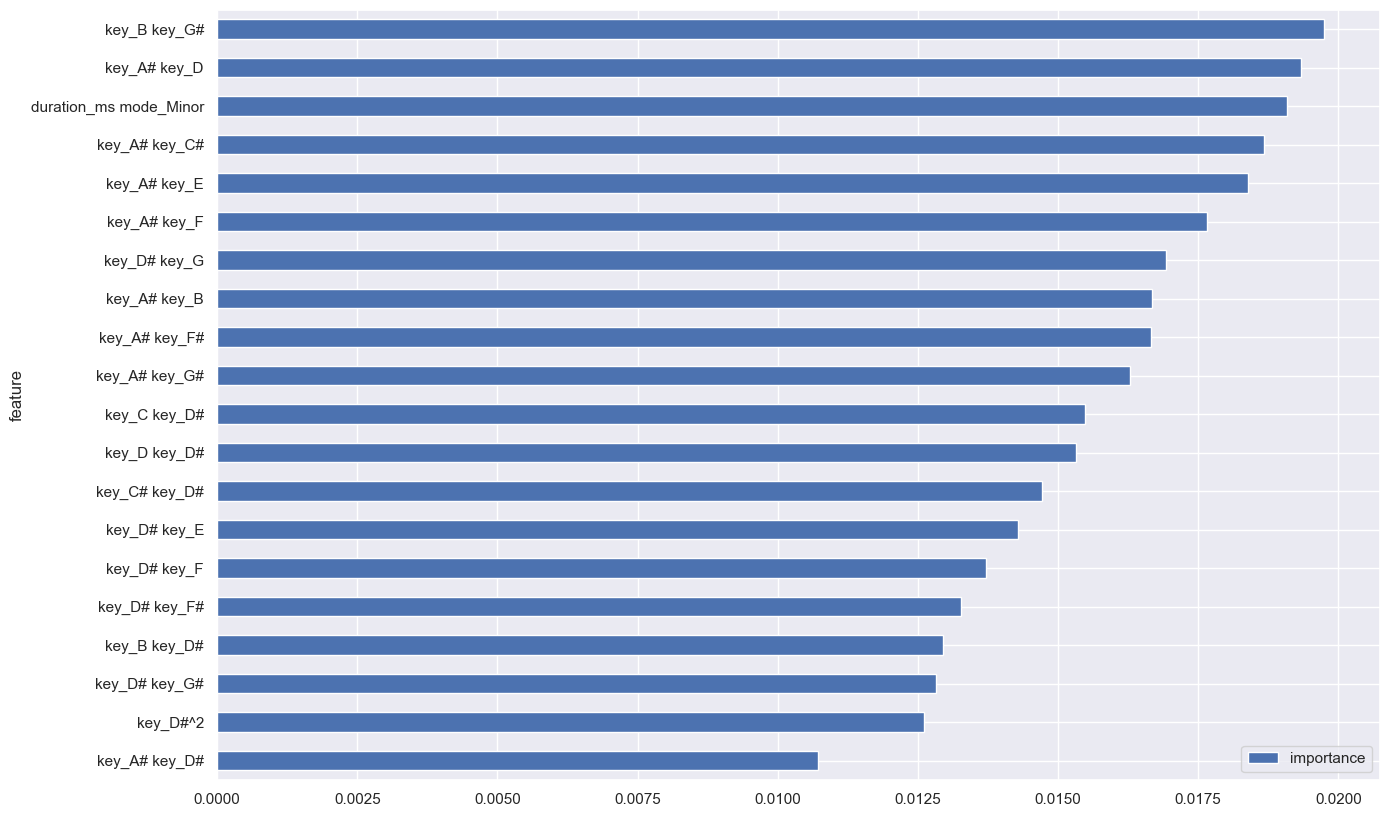

In [110]:
importances.sort_values(by='importance', ascending=True).head(20).plot.barh(x='feature', y='importance', figsize=(15,10));

In [111]:
model = DecisionTreeClassifier(random_state=123)
model.fit(sm_features_train_poly, sm_target_train)
predictions = model.predict(sc_features_valid_poly)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.20      0.18      0.19       747
       Anime       0.36      0.35      0.36       575
       Blues       0.30      0.27      0.28       764
   Classical       0.62      0.70      0.66       356
     Country       0.32      0.32      0.32       631
  Electronic       0.47      0.41      0.44       748
     Hip-Hop       0.17      0.24      0.20       329
        Jazz       0.19      0.27      0.22       333
         Rap       0.34      0.31      0.32       654
        Rock       0.17      0.18      0.18       628

    accuracy                           0.31      5765
   macro avg       0.31      0.32      0.32      5765
weighted avg       0.31      0.31      0.31      5765

Accuracy:  0.3089332176929748
F1 мера_micro:  0.3089332176929748
F1 мера_macro:  0.3150224801058555
F1 мера_weighted:  0.31210943967636673


In [112]:
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('model', model)])                         

In [113]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.297
Стандартное отклонение:  0.0039
2,5% квантиль 0.2922
97,5% квантиль 0.3011


f1_micro
f1_micro:  0.297
Стандартное отклонение:  0.0039
2,5% квантиль 0.2922
97,5% квантиль 0.3011


f1_macro
f1_macro:  0.3045
Стандартное отклонение:  0.0062
2,5% квантиль 0.2989
97,5% квантиль 0.3147


f1_weighted
f1_weighted:  0.2995
Стандартное отклонение:  0.0043
2,5% квантиль 0.2945
97,5% квантиль 0.3057




In [114]:
importances_tree = pd.DataFrame({
    'feature':sm_features_train_poly.columns,
    'importance':model.feature_importances_
})
importances_tree.sort_values(by='importance', ascending=True).head(10)

,feature,importance
0,1,0.0
255,key_E^2,0.0
21,key_G#,0.0
248,key_D#^2,0.0
19,key_F#,0.0
202,key_A# key_D,0.0
16,key_D#,0.0
264,key_F key_G#,0.0
11,key_A#,0.0
12,key_B,0.0


In [115]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train_poly, sm_target_train)
predictions = model.predict(sc_features_valid_poly)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.32      0.23      0.27       747
       Anime       0.48      0.51      0.50       575
       Blues       0.44      0.42      0.43       764
   Classical       0.73      0.80      0.76       356
     Country       0.44      0.55      0.49       631
  Electronic       0.61      0.58      0.59       748
     Hip-Hop       0.20      0.24      0.22       329
        Jazz       0.30      0.39      0.34       333
         Rap       0.42      0.47      0.45       654
        Rock       0.20      0.15      0.17       628

    accuracy                           0.43      5765
   macro avg       0.42      0.43      0.42      5765
weighted avg       0.42      0.43      0.42      5765

Accuracy:  0.42740676496097135
F1 мера_micro:  0.42740676496097135
F1 мера_macro:  0.41775320248732745
F1 мера_weighted:  0.4198791232780055


In [116]:
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('model', model)])      

In [117]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.4228
Стандартное отклонение:  0.0076
2,5% квантиль 0.4149
97,5% квантиль 0.4325


f1_micro
f1_micro:  0.4228
Стандартное отклонение:  0.0076
2,5% квантиль 0.4149
97,5% квантиль 0.4325


f1_macro
f1_macro:  0.4153
Стандартное отклонение:  0.0075
2,5% квантиль 0.4064
97,5% квантиль 0.4249


f1_weighted
f1_weighted:  0.415
Стандартное отклонение:  0.0076
2,5% квантиль 0.406
97,5% квантиль 0.4241




In [118]:
importances_forest = pd.DataFrame({
    'feature':sm_features_train_poly.columns,
    'importance':model.feature_importances_
})
importances_forest.sort_values(by='importance', ascending=True).head(10)

,feature,importance
0,1,0.000000
16,key_D#,0.000078
248,key_D#^2,0.000082
266,key_F#^2,0.000160
198,key_A#^2,0.000166
19,key_F#,0.000169
21,key_G#,0.000171
12,key_B,0.000184
273,key_G#^2,0.000204
17,key_E,0.000210


 - Использование синтетических признаков помогло повысить f1-меру логистической регрессии с 0.3652 до 0.3944.
 - F-мера решающего дерева, наоборот, упала с 0.3142 до 0.2969.
 - F-мера случайного леса осталась на прежнем уровне. 
 
 Самой качественной моделью остается модель случайного леса.

### 6.6 Отбор набора обучающих признаков методом  F-тестирования ANOVA

Воспользуемся F-тестом ANOVA для выявления наиболее значимых признаков из всех признаков, которые были получены ранее:

In [119]:
sm_features_train_poly.shape

(18430, 276)

In [120]:
fsel = SelectKBest(score_func=f_classif, k='all')
fsel.fit(sm_features_train_poly, sm_target_train)
features_sel_train = fsel.transform(sm_features_train_poly)

anova_scores = pd.DataFrame({
    'feature': sm_features_train_poly.columns,
    'score': fsel.scores_
})

anova_scores.sort_values(by='score', ascending=False).head(10)

,feature,score
29,acousticness loudness,3049.024705
26,acousticness energy,2688.067907
89,energy loudness,2526.099077
23,acousticness^2,2351.216877
7,loudness,2284.609256
86,energy^2,2226.755523
50,danceability loudness,1931.127071
24,acousticness danceability,1685.675704
140,loudness^2,1681.074005
47,danceability energy,1604.181399


Рассмотрим, какие признаки были выделены как наиболее важные:

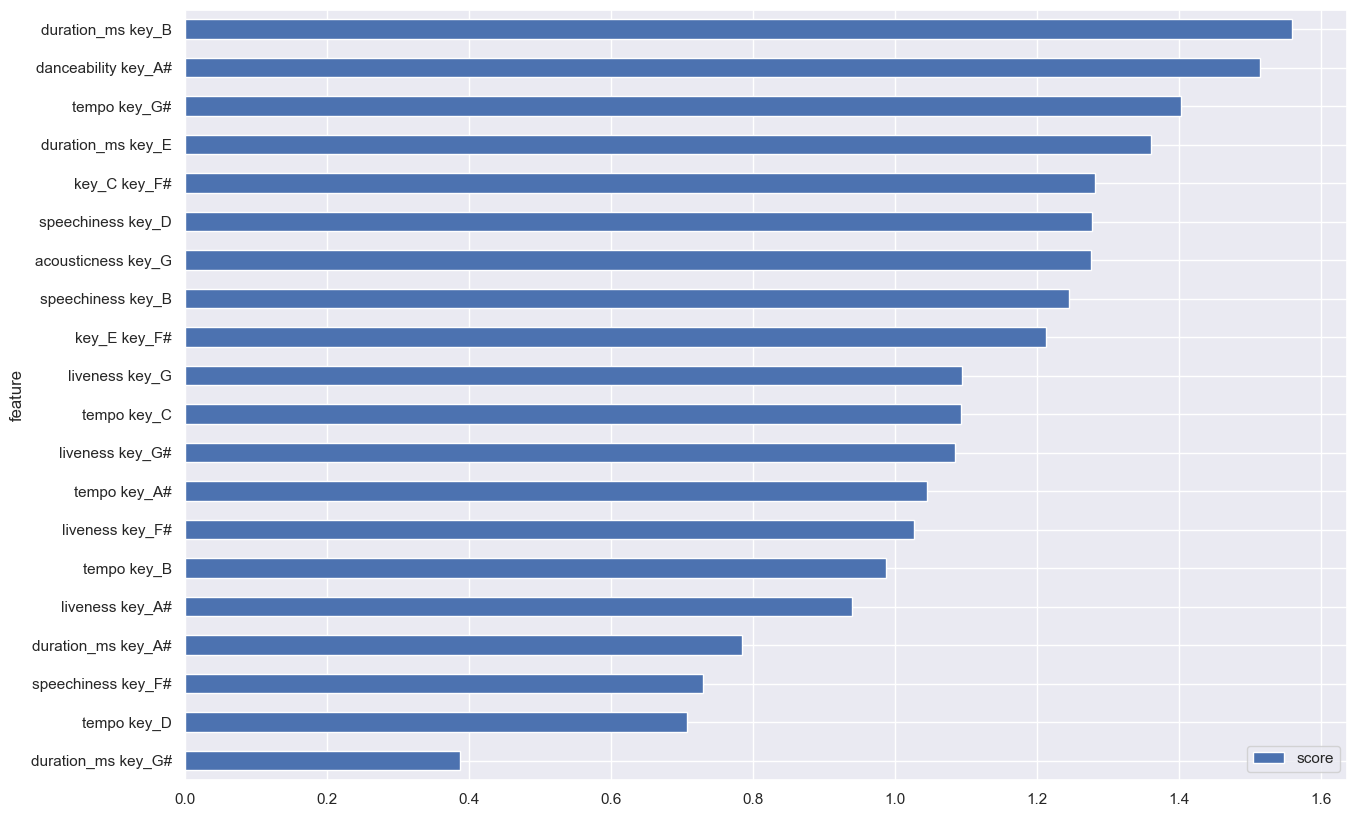

In [121]:
anova_scores.sort_values(by='score', ascending=True).head(20).plot.barh(x='feature', y='score', figsize=(15,10));

In [122]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,276,10):
    fsel = SelectKBest(score_func=f_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)

Accuracy:  0.4137033824804857
F1 мера_micro:  0.4137033824804857
F1 мера_macro:  0.41281257689364403
F1 мера_weighted:  0.41042500697192935
k:  81


In [123]:
fsel = SelectKBest(score_func=f_classif, k=k_fin)
    
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [124]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.4082
Стандартное отклонение:  0.0048
2,5% квантиль 0.402
97,5% квантиль 0.4135


f1_micro
f1_micro:  0.4082
Стандартное отклонение:  0.0048
2,5% квантиль 0.402
97,5% квантиль 0.4135


f1_macro
f1_macro:  0.409
Стандартное отклонение:  0.0049
2,5% квантиль 0.4021
97,5% квантиль 0.4144


f1_weighted
f1_weighted:  0.4066
Стандартное отклонение:  0.0049
2,5% квантиль 0.4006
97,5% квантиль 0.4134




In [125]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,100,10):
    fsel = SelectKBest(score_func=f_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = DecisionTreeClassifier(random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)

Accuracy:  0.3026886383347788
F1 мера_micro:  0.3026886383347788
F1 мера_macro:  0.31194656235674584
F1 мера_weighted:  0.307260622309219
k:  61


In [126]:
fsel = SelectKBest(score_func=f_classif, k=k_fin)
    
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [127]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3014
Стандартное отклонение:  0.0076
2,5% квантиль 0.2905
97,5% квантиль 0.3099


f1_micro
f1_micro:  0.3014
Стандартное отклонение:  0.0076
2,5% квантиль 0.2905
97,5% квантиль 0.3099


f1_macro
f1_macro:  0.3115
Стандартное отклонение:  0.0069
2,5% квантиль 0.3012
97,5% квантиль 0.3192


f1_weighted
f1_weighted:  0.3064
Стандартное отклонение:  0.0073
2,5% квантиль 0.2954
97,5% квантиль 0.3148




In [128]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,100,10):
    fsel = SelectKBest(score_func=f_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = RandomForestClassifier(random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)


Accuracy:  0.42792714657415437
F1 мера_micro:  0.42792714657415437
F1 мера_macro:  0.42024287351719974
F1 мера_weighted:  0.4213508132580779
k:  81


In [129]:
fsel = SelectKBest(score_func=f_classif, k=k_fin)
    
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [130]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.4242
Стандартное отклонение:  0.0055
2,5% квантиль 0.4152
97,5% квантиль 0.4296


f1_micro
f1_micro:  0.4242
Стандартное отклонение:  0.0055
2,5% квантиль 0.4152
97,5% квантиль 0.4296


f1_macro
f1_macro:  0.4181
Стандартное отклонение:  0.0074
2,5% квантиль 0.4063
97,5% квантиль 0.4254


f1_weighted
f1_weighted:  0.4174
Стандартное отклонение:  0.0062
2,5% квантиль 0.4076
97,5% квантиль 0.4234




F-мера модели логистической регрессии немного повысилась с 0.3944 до 0.4081.
F-мера модели решающего дерева также немного увеличилась с 0.2969 до 0.3014.
F-мера модели случайного леса осталась на прежнем уровне.

### 6.7 Отбор набора обучающих признаков методом Mutual information

Воспользуемся методом отбора признаков Mutual information:

In [131]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,100,10):
    fsel = SelectKBest(score_func=mutual_info_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

#print(classification_report(target_valid, predictions))
print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)

Accuracy:  0.35576756287944494
F1 мера_micro:  0.35576756287944494
F1 мера_macro:  0.36189110759035514
F1 мера_weighted:  0.35536883851235523
k:  91


In [132]:
fsel = SelectKBest(score_func=mutual_info_classif, k=k_fin)
    
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [133]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3557
Стандартное отклонение:  0.0054
2,5% квантиль 0.3465
97,5% квантиль 0.361


f1_micro
f1_micro:  0.3557
Стандартное отклонение:  0.0054
2,5% квантиль 0.3465
97,5% квантиль 0.361


f1_macro
f1_macro:  0.3624
Стандартное отклонение:  0.0046
2,5% квантиль 0.3552
97,5% квантиль 0.3675


f1_weighted
f1_weighted:  0.3543
Стандартное отклонение:  0.0058
2,5% квантиль 0.3442
97,5% квантиль 0.3592




In [134]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,100,10):
    fsel = SelectKBest(score_func=mutual_info_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = DecisionTreeClassifier(random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

#print(classification_report(target_valid, predictions))
print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)


Accuracy:  0.2940156114483955
F1 мера_micro:  0.2940156114483955
F1 мера_macro:  0.3019286729218488
F1 мера_weighted:  0.2974223763681539
k:  81


In [135]:
fsel = SelectKBest(score_func=mutual_info_classif, k=k_fin)

pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [136]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.2864
Стандартное отклонение:  0.0053
2,5% квантиль 0.2804
97,5% квантиль 0.2937


f1_micro
f1_micro:  0.2864
Стандартное отклонение:  0.0053
2,5% квантиль 0.2804
97,5% квантиль 0.2937


f1_macro
f1_macro:  0.2976
Стандартное отклонение:  0.0054
2,5% квантиль 0.2899
97,5% квантиль 0.3045


f1_weighted
f1_weighted:  0.2897
Стандартное отклонение:  0.0055
2,5% квантиль 0.2816
97,5% квантиль 0.2963




In [137]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for k in range(1,100,10):
    fsel = SelectKBest(score_func=mutual_info_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = RandomForestClassifier(random_state=123)
    model.fit(features_sel_train, sm_target_train)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

#print(classification_report(target_valid, predictions))
print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)


Accuracy:  0.38404163052905466
F1 мера_micro:  0.3840416305290546
F1 мера_macro:  0.3822206025339824
F1 мера_weighted:  0.3834603143637029
k:  81


In [138]:
fsel = SelectKBest(score_func=mutual_info_classif, k=k_fin)
    
pipeline = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), ('model', model_fin)])                         

In [139]:
cv_score(pipeline, sc_train_features, target_train, scoring)

accuracy
test_accuracy:  0.3706
Стандартное отклонение:  0.0081
2,5% квантиль 0.3654
97,5% квантиль 0.3848


f1_micro
f1_micro:  0.3706
Стандартное отклонение:  0.0081
2,5% квантиль 0.3654
97,5% квантиль 0.3848


f1_macro
f1_macro:  0.3707
Стандартное отклонение:  0.0105
2,5% квантиль 0.3594
97,5% квантиль 0.3878


f1_weighted
f1_weighted:  0.3665
Стандартное отклонение:  0.0078
2,5% квантиль 0.3588
97,5% квантиль 0.3797




При использовании данного метода отбора признаков F-мера всех моделей снижается:
 - сильнее всего метрика падает у случайного леса: с 0.4295 в базовой модели до 0.3749.
 - у модели решающего дерева - с 0.3142 до 0.2849,
 - у логистической регрессии - 0.3652 до 0.3556.

### 6.8 Отбор набора обучающих признаков на основе их важности

Воспользуемся ранее созданными таблицами с важностями признаков логистической регресии и деревьев, чтобы отобрать наиболее значимые из них.
Сначала проверим результаты на признаках, выбранных моделью логистической регрессии:

#### 6.8.1 Важность по модели логистической регрессии

In [140]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_features_train = sm_features_train_poly[importances.sort_values(by='importance', 
                                                                        ascending=True).head(qty)['feature'].unique()]
    imp_features_valid = sc_features_valid_poly[importances.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs', random_state=123)
    model.fit(imp_features_train, sm_target_train)
    predictions = model.predict(imp_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.22549869904596703
F1 мера_micro:  0.22549869904596703
F1 мера_macro:  0.2276614696645393
F1 мера_weighted:  0.22664450296851701
181


In [141]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_features_train = sm_features_train_poly[importances.sort_values(by='importance', 
                                                                        ascending=True).head(qty)['feature'].unique()]
    imp_features_valid = sc_features_valid_poly[importances.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = model = DecisionTreeClassifier(random_state=123)
    model.fit(imp_features_train, sm_target_train)
    predictions = model.predict(imp_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.2940156114483955
F1 мера_micro:  0.2940156114483955
F1 мера_macro:  0.2979876424909568
F1 мера_weighted:  0.29564427935990595
181


In [142]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_features_train = sm_features_train_poly[importances.sort_values(by='importance', 
                                                                        ascending=True).head(qty)['feature'].unique()]
    imp_features_valid = sc_features_valid_poly[importances.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = model = RandomForestClassifier(random_state=123)
    model.fit(imp_features_train, sm_target_train)
    predictions = model.predict(imp_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.4152645273200347
F1 мера_micro:  0.4152645273200347
F1 мера_macro:  0.40674396365014154
F1 мера_weighted:  0.40647956427695753
181


F-мера всех моделей также снизилась:
 - у логистической регрессии до 0.2254,
 - у решающего дерева до 0.2940,
 - у случайного леса - до 0.4152.

#### 6.8.2 Важность по модели решающего дерева

Проверим результаты на признаках, выбранных "деревянными" алгоритмами:

In [143]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_tree_features_train = sm_features_train_poly[importances_tree.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]

    imp_tree_features_valid = sc_features_valid_poly[importances_tree.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)
    model.fit(imp_tree_features_train, sm_target_train)
    predictions = model.predict(imp_tree_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.3186470078057242
F1 мера_micro:  0.3186470078057242
F1 мера_macro:  0.3263912312684541
F1 мера_weighted:  0.31796920401701084
161


In [144]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_features_train = sm_features_train_poly[importances.sort_values(by='importance', 
                                                                        ascending=True).head(qty)['feature'].unique()]
    imp_features_valid = sc_features_valid_poly[importances.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = model = DecisionTreeClassifier(random_state=123)
    model.fit(imp_tree_features_train, sm_target_train)
    predictions = model.predict(imp_tree_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.30095403295750217
F1 мера_micro:  0.30095403295750217
F1 мера_macro:  0.3057173627426855
F1 мера_weighted:  0.3037765738529469
1


In [145]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

#Наиболее оптимальное количество отобранных признаков найдем в цикле:
for qty in range(1,200, 20):
    imp_features_train = sm_features_train_poly[importances.sort_values(by='importance', 
                                                                        ascending=True).head(qty)['feature'].unique()]
    imp_features_valid = sc_features_valid_poly[importances.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature'].unique()]
    
    
    model = model = RandomForestClassifier(random_state=123)
    model.fit(imp_tree_features_train, sm_target_train)
    predictions = model.predict(imp_tree_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.420294882914137
F1 мера_micro:  0.420294882914137
F1 мера_macro:  0.4112626051608686
F1 мера_weighted:  0.4136054611960486
1


 - F-мера логистической регрессии снизилась относительно базовой модели с 0.3652 до 0.3186,
 - у модели решающего дерева также немного упала - с 0.3142 до 0.3009,
 - у модели случайного леса осталась на прежнем уровне.

Таким образом, к мерам, повышающим качество исходных моделей, можно отнести:
 - разработку синтетических признаков с последующим их отбором методом F-теста ANOVA для модели логистической регрессии,
 - также стоит протестировать отбор признаков по их важности на основании моделей после заполнения пропусков для алгоритма случайного леса.
 
 Модель решающего дерева показывала стабильно самые низкие результаты, поэтому дальше рассматриваться не будет.

### 6.9 Финализация базовой модели

#### 6.9.1 Доработка модели случайного леса

Заполним пропуски методом Simple Imputer и найдем важности признаков на заполненных данных:

In [146]:
df_rf = df.copy()

In [147]:
imputer1 = SimpleImputer(strategy='median')
imputer1.fit(df_rf[qcolumns])
df_fin_rf_q = pd.DataFrame(imputer1.transform(df_rf[qcolumns]), columns = df_rf[qcolumns].columns, 
                           index = df_rf[qcolumns].index)
df_fin_rf_q.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [148]:
cat_columns_impute = ['key','mode']

imputer2 = SimpleImputer(strategy='most_frequent')
imputer2.fit(df_simp[cat_columns_impute])
df_fin_rf_cat = pd.DataFrame(imputer2.transform(df_rf[cat_columns_impute]), columns = 
                             df_rf[cat_columns_impute].columns, index = df_rf[cat_columns_impute].index)
df_fin_rf_cat.isna().sum()

key     0
mode    0
dtype: int64

In [149]:
df_fin_rf = df_fin_rf_cat.join(df_fin_rf_q)
df_fin_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               20394 non-null  object 
 1   mode              20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   speechiness       20394 non-null  float64
 10  tempo             20394 non-null  float64
 11  valence           20394 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.9+ MB


In [150]:
df_fin_rf = df_fin_rf.join(df_rf['music_genre'])

In [151]:
df_fin_rf.shape

(20394, 13)

In [152]:
df_fin_rf = outl_rem(df_fin_rf)

In [153]:
df_fin_rf = df_fin_rf.drop(columns=['zscore'])

In [154]:
df_fin_rf, features_train, features_valid, target_train, target_valid, \
train_features_encoded, valid_features_encoded, sc_train_features_fin, sc_valid_features_fin = \
data_processing(df_fin_rf)
df_fin_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 20393
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               19215 non-null  object 
 1   mode              19215 non-null  object 
 2   acousticness      19215 non-null  float64
 3   danceability      19215 non-null  float64
 4   duration_ms       19215 non-null  float64
 5   energy            19215 non-null  float64
 6   instrumentalness  19215 non-null  float64
 7   liveness          19215 non-null  float64
 8   loudness          19215 non-null  float64
 9   speechiness       19215 non-null  float64
 10  tempo             19215 non-null  float64
 11  valence           19215 non-null  float64
 12  music_genre       19215 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.1+ MB


In [155]:
sm_features_train_fin, sm_target_train_fin = sm.fit_resample(sc_train_features_fin, target_train)

In [156]:
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train_fin, sm_target_train_fin)
  
model = RandomForestClassifier(random_state=123)
model.fit(sm_features_train_fin, sm_target_train_fin)
predictions = model.predict(sc_valid_features_fin)
    
f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
acc_fin = accuracy_score(target_valid, predictions)


print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)


Accuracy:  0.42983521248915874
F1 мера_micro:  0.42983521248915874
F1 мера_macro:  0.4183895823537204
F1 мера_weighted:  0.4201817563655121


In [157]:
importances_tree = pd.DataFrame({
    'feature':sm_features_train.columns,
    'importance':model.feature_importances_
})
importances_tree.sort_values(by='importance', ascending=True).head()

,feature,importance
15,key_D#,0.003292
10,key_A#,0.005448
18,key_F#,0.005849
20,key_G#,0.006487
11,key_B,0.006729


Найдем наиболее оптимальное количество признаков и оценим результаты:

In [158]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
qty_fin = 0
model_fin = None

for qty in range(1,sm_features_train.shape[1], 20):
    imp_features_train = sm_features_train_fin[importances_tree.sort_values(by='importance', 
                                                                            ascending=True).head(qty)['feature']]
    imp_features_valid = sc_valid_features_fin[importances_tree.sort_values(by='importance', \
                                                                    ascending=True).head(qty)['feature']]
    
    
    model = RandomForestClassifier(random_state=123)
    model.fit(imp_features_train, sm_target_train_fin)
    predictions = model.predict(imp_features_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        acc_fin = accuracy_score(target_valid, predictions)
        qty_fin = qty
        model_fin = model

print('Accuracy: ', acc_fin)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print(qty_fin)

Accuracy:  0.41960104076322635
F1 мера_micro:  0.41960104076322635
F1 мера_macro:  0.406947443502989
F1 мера_weighted:  0.40832592775127496
21


Ограничение количества признаков отрицательно сказывается на метриках: f1-микро снизилась с 0.4298 до 0.4196. Поэтому дальше будем рассматривать модель с использованием всех музыкальных характеристик.

#### 6.9.1 Доработка модели логистической регрессии

In [159]:
pol_feat = PolynomialFeatures(degree=2)
sm_features_train_poly = pol_feat.fit(sm_features_train_fin)
sm_features_train_poly = pd.DataFrame(pol_feat.transform(sm_features_train_fin), columns = pol_feat.get_feature_names_out(), index = sm_features_train_fin.index)
sm_features_train_poly.head()

,1,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,acousticness^2,acousticness danceability,acousticness duration_ms,acousticness energy,acousticness instrumentalness,acousticness liveness,acousticness loudness,acousticness speechiness,acousticness tempo,acousticness valence,acousticness key_A#,acousticness key_B,acousticness key_C,acousticness key_C#,acousticness key_D,acousticness key_D#,acousticness key_E,acousticness key_F,acousticness key_F#,acousticness key_G,acousticness key_G#,acousticness mode_Minor,danceability^2,danceability duration_ms,danceability energy,danceability instrumentalness,danceability liveness,danceability loudness,danceability speechiness,danceability tempo,danceability valence,danceability key_A#,danceability key_B,danceability key_C,danceability key_C#,danceability key_D,danceability key_D#,danceability key_E,danceability key_F,danceability key_F#,danceability key_G,danceability key_G#,danceability mode_Minor,duration_ms^2,duration_ms energy,duration_ms instrumentalness,duration_ms liveness,duration_ms loudness,duration_ms speechiness,duration_ms tempo,duration_ms valence,duration_ms key_A#,duration_ms key_B,duration_ms key_C,duration_ms key_C#,duration_ms key_D,duration_ms key_D#,duration_ms key_E,duration_ms key_F,duration_ms key_F#,duration_ms key_G,duration_ms key_G#,duration_ms mode_Minor,energy^2,energy instrumentalness,energy liveness,energy loudness,energy speechiness,energy tempo,energy valence,energy key_A#,energy key_B,energy key_C,energy key_C#,energy key_D,energy key_D#,energy key_E,energy key_F,energy key_F#,energy key_G,energy key_G#,energy mode_Minor,instrumentalness^2,instrumentalness liveness,instrumentalness loudness,instrumentalness speechiness,instrumentalness tempo,instrumentalness valence,instrumentalness key_A#,instrumentalness key_B,instrumentalness key_C,instrumentalness key_C#,instrumentalness key_D,instrumentalness key_D#,instrumentalness key_E,instrumentalness key_F,instrumentalness key_F#,instrumentalness key_G,instrumentalness key_G#,instrumentalness mode_Minor,liveness^2,liveness loudness,liveness speechiness,liveness tempo,liveness valence,liveness key_A#,liveness key_B,liveness key_C,liveness key_C#,liveness key_D,liveness key_D#,liveness key_E,liveness key_F,liveness key_F#,liveness key_G,liveness key_G#,liveness mode_Minor,loudness^2,loudness speechiness,loudness tempo,loudness valence,loudness key_A#,loudness key_B,loudness key_C,loudness key_C#,loudness key_D,loudness key_D#,loudness key_E,loudness key_F,loudness key_F#,loudness key_G,loudness key_G#,loudness mode_Minor,speechiness^2,speechiness tempo,speechiness valence,speechiness key_A#,speechiness key_B,speechiness key_C,speechiness key_C#,speechiness key_D,speechiness key_D#,speechiness key_E,speechiness key_F,speechiness key_F#,speechiness key_G,speechiness key_G#,speechiness mode_Minor,tempo^2,tempo valence,tempo key_A#,tempo key_B,tempo key_C,tempo key_C#,tempo key_D,tempo key_D#,tempo key_E,tempo key_F,tempo key_F#,tempo key_G,tempo key_G#,tempo mode_Minor,valence^2,valence key_A#,valence key_B,valence key_C,valence key_C#,valence key_D,valence key_D#,valence key_E,valence key_F,valence key_F#,valence key_G,valence key_G#,valence mode_Minor,key_A#^2,key_A# key_B,key_A# key_C,key_A# key_C#,key_A# key_D,key_A# key_D#,key_A# key_E,key_A# key_F,key_A# key_F#,key_A# key_G,key_A# key_G#,key_A# mode_Minor,key_B^2,key_B key_C,key_B key_C#,key_B key_D,key_B key_D#,key_B key_E,key_B key_F,key_B key_F#,key_B key_G,key_B key_G#,key_B mode_Minor,key_C^2,key_C key_C#,key_C key_D,key_C key_D#,key_C key_E,key_C key_F,key_C key_F#,key_C key_G,key_C key_G#,key_C mode_Minor,key_C#^2,key_C# key_D,key_C# key_D#,key_C# key_E,key_C# key_F,key_C# key_F#,key_C# key_G,key_C# key_G#,key_C# mode_Minor,key_D^2,key_D key_D#,key_D key_E,key_D key_F,key_D key_F#,key_D key_G,key_D key_G#,key_D mode

In [160]:
sc_features_valid_poly = pd.DataFrame(pol_feat.transform(sc_valid_features_fin), columns = \
                                      pol_feat.get_feature_names_out(), index = sc_valid_features_fin.index)
sc_features_valid_poly.head()

,1,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,acousticness^2,acousticness danceability,acousticness duration_ms,acousticness energy,acousticness instrumentalness,acousticness liveness,acousticness loudness,acousticness speechiness,acousticness tempo,acousticness valence,acousticness key_A#,acousticness key_B,acousticness key_C,acousticness key_C#,acousticness key_D,acousticness key_D#,acousticness key_E,acousticness key_F,acousticness key_F#,acousticness key_G,acousticness key_G#,acousticness mode_Minor,danceability^2,danceability duration_ms,danceability energy,danceability instrumentalness,danceability liveness,danceability loudness,danceability speechiness,danceability tempo,danceability valence,danceability key_A#,danceability key_B,danceability key_C,danceability key_C#,danceability key_D,danceability key_D#,danceability key_E,danceability key_F,danceability key_F#,danceability key_G,danceability key_G#,danceability mode_Minor,duration_ms^2,duration_ms energy,duration_ms instrumentalness,duration_ms liveness,duration_ms loudness,duration_ms speechiness,duration_ms tempo,duration_ms valence,duration_ms key_A#,duration_ms key_B,duration_ms key_C,duration_ms key_C#,duration_ms key_D,duration_ms key_D#,duration_ms key_E,duration_ms key_F,duration_ms key_F#,duration_ms key_G,duration_ms key_G#,duration_ms mode_Minor,energy^2,energy instrumentalness,energy liveness,energy loudness,energy speechiness,energy tempo,energy valence,energy key_A#,energy key_B,energy key_C,energy key_C#,energy key_D,energy key_D#,energy key_E,energy key_F,energy key_F#,energy key_G,energy key_G#,energy mode_Minor,instrumentalness^2,instrumentalness liveness,instrumentalness loudness,instrumentalness speechiness,instrumentalness tempo,instrumentalness valence,instrumentalness key_A#,instrumentalness key_B,instrumentalness key_C,instrumentalness key_C#,instrumentalness key_D,instrumentalness key_D#,instrumentalness key_E,instrumentalness key_F,instrumentalness key_F#,instrumentalness key_G,instrumentalness key_G#,instrumentalness mode_Minor,liveness^2,liveness loudness,liveness speechiness,liveness tempo,liveness valence,liveness key_A#,liveness key_B,liveness key_C,liveness key_C#,liveness key_D,liveness key_D#,liveness key_E,liveness key_F,liveness key_F#,liveness key_G,liveness key_G#,liveness mode_Minor,loudness^2,loudness speechiness,loudness tempo,loudness valence,loudness key_A#,loudness key_B,loudness key_C,loudness key_C#,loudness key_D,loudness key_D#,loudness key_E,loudness key_F,loudness key_F#,loudness key_G,loudness key_G#,loudness mode_Minor,speechiness^2,speechiness tempo,speechiness valence,speechiness key_A#,speechiness key_B,speechiness key_C,speechiness key_C#,speechiness key_D,speechiness key_D#,speechiness key_E,speechiness key_F,speechiness key_F#,speechiness key_G,speechiness key_G#,speechiness mode_Minor,tempo^2,tempo valence,tempo key_A#,tempo key_B,tempo key_C,tempo key_C#,tempo key_D,tempo key_D#,tempo key_E,tempo key_F,tempo key_F#,tempo key_G,tempo key_G#,tempo mode_Minor,valence^2,valence key_A#,valence key_B,valence key_C,valence key_C#,valence key_D,valence key_D#,valence key_E,valence key_F,valence key_F#,valence key_G,valence key_G#,valence mode_Minor,key_A#^2,key_A# key_B,key_A# key_C,key_A# key_C#,key_A# key_D,key_A# key_D#,key_A# key_E,key_A# key_F,key_A# key_F#,key_A# key_G,key_A# key_G#,key_A# mode_Minor,key_B^2,key_B key_C,key_B key_C#,key_B key_D,key_B key_D#,key_B key_E,key_B key_F,key_B key_F#,key_B key_G,key_B key_G#,key_B mode_Minor,key_C^2,key_C key_C#,key_C key_D,key_C key_D#,key_C key_E,key_C key_F,key_C key_F#,key_C key_G,key_C key_G#,key_C mode_Minor,key_C#^2,key_C# key_D,key_C# key_D#,key_C# key_E,key_C# key_F,key_C# key_F#,key_C# key_G,key_C# key_G#,key_C# mode_Minor,key_D^2,key_D key_D#,key_D key_E,key_D key_F,key_D key_F#,key_D key_G,key_D key_G#,key_D mode

In [161]:
acc = 0
f1_micro = 0
f1_macro = 0
f1_w = 0
k_fin = 0
model_fin = None

for k in range(1,276,10):
    fsel = SelectKBest(score_func=f_classif, k=k)
    fsel.fit(sm_features_train_poly, sm_target_train_fin)
    features_sel_train = fsel.transform(sm_features_train_poly)
    features_sel_valid = fsel.transform(sc_features_valid_poly)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=123)
    model.fit(features_sel_train, sm_target_train_fin)
    predictions = model.predict(features_sel_valid)
    
    if fbeta_score(target_valid, predictions, beta=0.5, average='micro') > f1_micro:
        acc = accuracy_score(target_valid, predictions)
        f1_micro = fbeta_score(target_valid, predictions, beta=0.5, average='micro')
        f1_macro = fbeta_score(target_valid, predictions, beta=0.5, average='macro')
        f1_w= fbeta_score(target_valid, predictions, beta=0.5, average='weighted')
        k_fin = k
        model_fin = model

print('Accuracy: ', acc)
print('F1 мера_micro: ', f1_micro)
print('F1 мера_macro: ', f1_macro)
print('F1 мера_weighted: ', f1_w)
print('k: ', k_fin)

Accuracy:  0.41439722463139633
F1 мера_micro:  0.41439722463139633
F1 мера_macro:  0.4120731794386329
F1 мера_weighted:  0.4097062440680241
k:  111


Создание дополнительных признаков и отбор наиболее важных из них с помощью метода F-теста ANOVA позволяет повысить качество логистической регрессии с 0.3652 до 0.4143.

## 7. Оптимизация моделей

### 7.1 Подбор гиперпараметров модели случайного леса

RandomizedSearchCV не оценивает каждое сочетание параметров, а использует случайные комбинации. Используем его для оценки гиперпараметров в первом приближении:

In [163]:
pipeline_rf = Pipeline([('smote', sm), ('model_rf', RandomForestClassifier(random_state=123))])                         


grid_values = {
    'model_rf__criterion': ['gini', 'entropy'],
    'model_rf__max_depth': range(50,200,50),
    'model_rf__n_estimators': range(50,1000,100),
    'model_rf__max_features': ['log2', 'sqrt'],
    'model_rf__min_samples_split': range(2,50,5),
    'model_rf__min_samples_leaf': range(1,50,5),
}

scoring = {'accuracy' : make_scorer(accuracy_score), 
          'f1_micro' : make_scorer(fbeta_score, beta=0.5, average='micro'),
           'f1_macro' : make_scorer(fbeta_score, beta=0.5, average='macro'), 
           'f1_weighted' : make_scorer(fbeta_score, beta=0.5, average='weighted')}

rs_forest = RandomizedSearchCV(pipeline_rf, 
                               grid_values, 
                               n_iter = 100, 
                               cv=5, 
                               scoring = scoring, 
                               refit = 'f1_micro',
                               n_jobs=-1,
                               random_state=123)

rs_forest.fit(sc_train_features_fin, target_train)

rs_forest.best_params_

{'model_rf__n_estimators': 850,
 'model_rf__min_samples_split': 7,
 'model_rf__min_samples_leaf': 1,
 'model_rf__max_features': 'sqrt',
 'model_rf__max_depth': 100,
 'model_rf__criterion': 'entropy'}

In [164]:
rs_forest.cv_results_

{'mean_fit_time': array([  9.11004233,  63.28013544,  28.60310264,  39.1027596 ,
         30.83897958,  46.64414787,  25.21108627,  26.2201293 ,
         29.81976786,  91.50909505,  24.1730226 ,  19.33796406,
         51.41675472,  20.09368792,   9.91812739,  98.50496182,
          8.9388133 ,   7.2156899 ,  15.55710626,  16.83042254,
         24.43662796,  11.99731212,  49.73587804,  27.84306536,
         30.22936006,  50.25779319,  56.86528192,   6.11802907,
         89.84699345, 100.53897133,  52.11128368,  47.60491509,
        122.15140724,  26.01635118,  36.37526436, 126.66188102,
         12.37750382,  11.23151374,  43.57949052,  43.1436605 ,
         37.13595119,  47.43623915,  35.21280522,  62.27575946,
          6.03525901,  28.41093926,  17.95854311,  35.18826423,
         10.73719597, 132.59231267,   5.73661213,  85.80435724,
         98.68196673,  30.40210152,  14.31920142,  32.31385126,
         50.8506176 ,   5.95790172,  44.4198678 ,  69.52591929,
        167.37432966,  

In [165]:
rs_forest.best_score_

0.43167286245353165

Грубая оптимизация гиперпараметров позволяет незначительно повысить метрику до 0.4298. 

Рассмотрим, как меняется метрика при различных диапазонах гиперпараметров:

In [166]:
rs_forest_df = pd.DataFrame(rs_forest.cv_results_).reset_index(drop=True)
rs_forest_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model_rf__n_estimators,param_model_rf__min_samples_split,param_model_rf__min_samples_leaf,param_model_rf__max_features,param_model_rf__max_depth,param_model_rf__criterion,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,9.110042,0.088122,0.363145,0.042098,250,42,26,sqrt,100,gini,"{'model_rf__n_estimators': 250, 'model_rf__min...",0.410409,0.412639,0.407435,0.416357,0.412639,0.411896,0.002937,56,0.410409,0.412639,0.407435,0.416357,0.412639,0.411896,0.002937,56,0.400333,0.405071,0.393342,0.402566,0.403296,0.400921,0.004083,54,0.399019,0.405432,0.394342,0.406888,0.403488,0.401834,0.004589,55
1,63.280135,2.235683,0.597811,0.094288,650,22,31,sqrt,150,entropy,"{'model_rf__n_estimators': 650, 'model_rf__min...",0.402602,0.400000,0.409294,0.406691,0.405204,0.404758,0.003219,70,0.402602,0.400000,0.409294,0.406691,0.405204,0.404758,0.003219,70,0.390495,0.391344,0.394252,0.394002,0.393627,0.392744,0.001527,71,0.387805,0.390879,0.395421,0.396737,0.394840,0.393136,0.003305,71
2,28.603103,3.871566,0.605683,0.065546,650,22,16,sqrt,50,gini,"{'model_rf__n_estimators': 650, 'model_rf__min...",0.421561,0.420446,0.414870,0.415242,0.422677,0.418959,0.003266,37,0.421561,0.420446,0.414870,0.415242,0.422677,0.418959,0.003266,37,0.410539,0.411070,0.399804,0.402302,0.411777,0.407098,0.005014,37,0.409795,0.412680,0.401238,0.405711,0.413944,0.408673,0.004672,36
3,39.102760,2.686892,0.796937,0.105434,850,7,11,sqrt,150,gini,"{'model_rf__n_estimators': 850, 'model_rf__min...",0.424164,0.423420,0.422677,0.420818,0.431227,0.424461,0.003561,16,0.424164,0.423420,0.422677,0.420818,0.431227,0.424461,0.003561,16,0.413255,0.414036,0.407794,0.407226,0.419413,0.412345,0.004485,15,0.412299,0.416187,0.410576,0.410791,0.423186,0.414608,0.004738,13
4,30.838980,0.619793,0.284902,0.016083,350,32,36,sqrt,50,entropy,"{'model_rf__n_estimators': 350, 'model_rf__min...",0.397770,0.401487,0.403346,0.400000,0.400000,0.400520,0.001845,86,0.397770,0.401487,0.403346,0.400000,0.400000,0.400520,0.001845,86,0.385941,0.395787,0.388194,0.389149,0.390284,0.389871,0.003285,86,0.383045,0.396224,0.389991,0.391874,0.391285,0.390484,0.004268,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.822064,1.038413,0.440314,0.083544,250,32,11,log2,50,gini,"{'model_rf__n_estimators': 250, 'model_rf__min...",0.421561,0.414498,0.414870,0.423420,0.423048,0.419480,0.003966,34,0.421561,0.414498,0.414870,0.423420,0.423048,0.419480,0.003966,34,0.410211,0.407270,0.401603,0.412996,0.412104,0.408837,0.004114,28,0.409559,0.408880,0.403600,0.414966,0.415580,0.410517,0.004402,28
96,11.858847,0.244516,0.299087,0.021989,150,7,6,sqrt,50,gini,"{'model_rf__n_estimators': 150, 'model_rf__min...",0.427509,0.419703,0.428253,0.422305,0.427881,0.425130,0.003476,11,0.427509,0.419703,0.428253,0.422305,0.427881,0.425130,0.003476,11,0.417680,0.410733,0.413579,0.407504,0.414440,0.412787,0.003447,9,0.417725,0.413132,0.415843,0.410449,0.420729,0.415575,0.003564,6
97,8.652580,0.412419,0.185013,0.036191,50,17,11,sqrt,100,entropy,"{'model_rf__n_estimators': 50, 'model_rf__min_...",0.414498,0.416357,0.418959,0.413011,0.413755,0.415316,0.002134,47,0.414498,0.416357,0.418959,0.413011,0.413755,0.415316,0.002134,47,0.404585,0.41

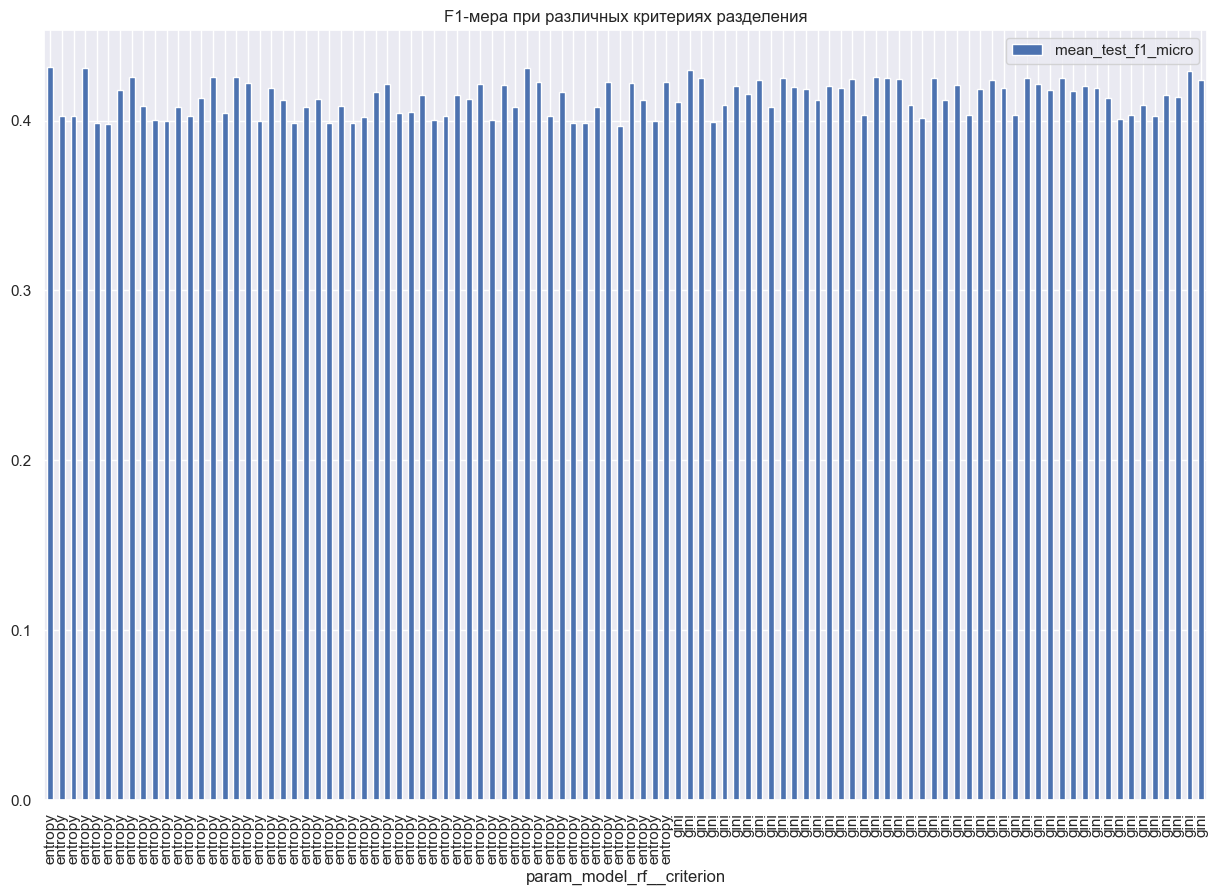

In [167]:
rs_forest_df.sort_values(by='param_model_rf__criterion').plot.bar(x='param_model_rf__criterion', y='mean_test_f1_micro', title='F1-мера при различных критериях разделения', figsize=(15,10));

Метрика распределяется равномерно при обоих значениях гиперпараметра, поэтому любой из гиперпараметров может дать одинаковый результат.

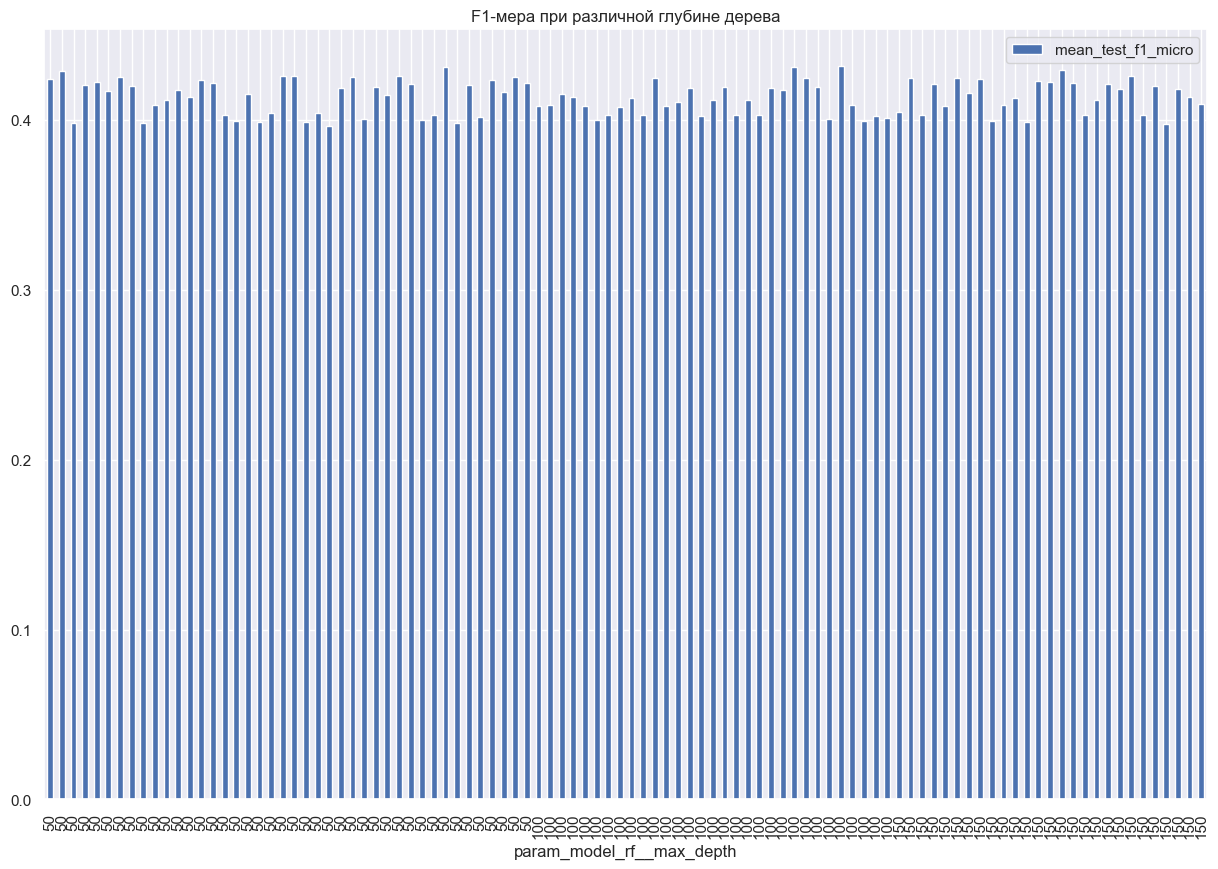

In [168]:
rs_forest_df.sort_values(by='param_model_rf__max_depth').plot.bar(x='param_model_rf__max_depth', y='mean_test_f1_micro', title='F1-мера при различной глубине дерева', figsize=(15,10));

При глубине около 100  и выше более высоких оценок становится немного больше.

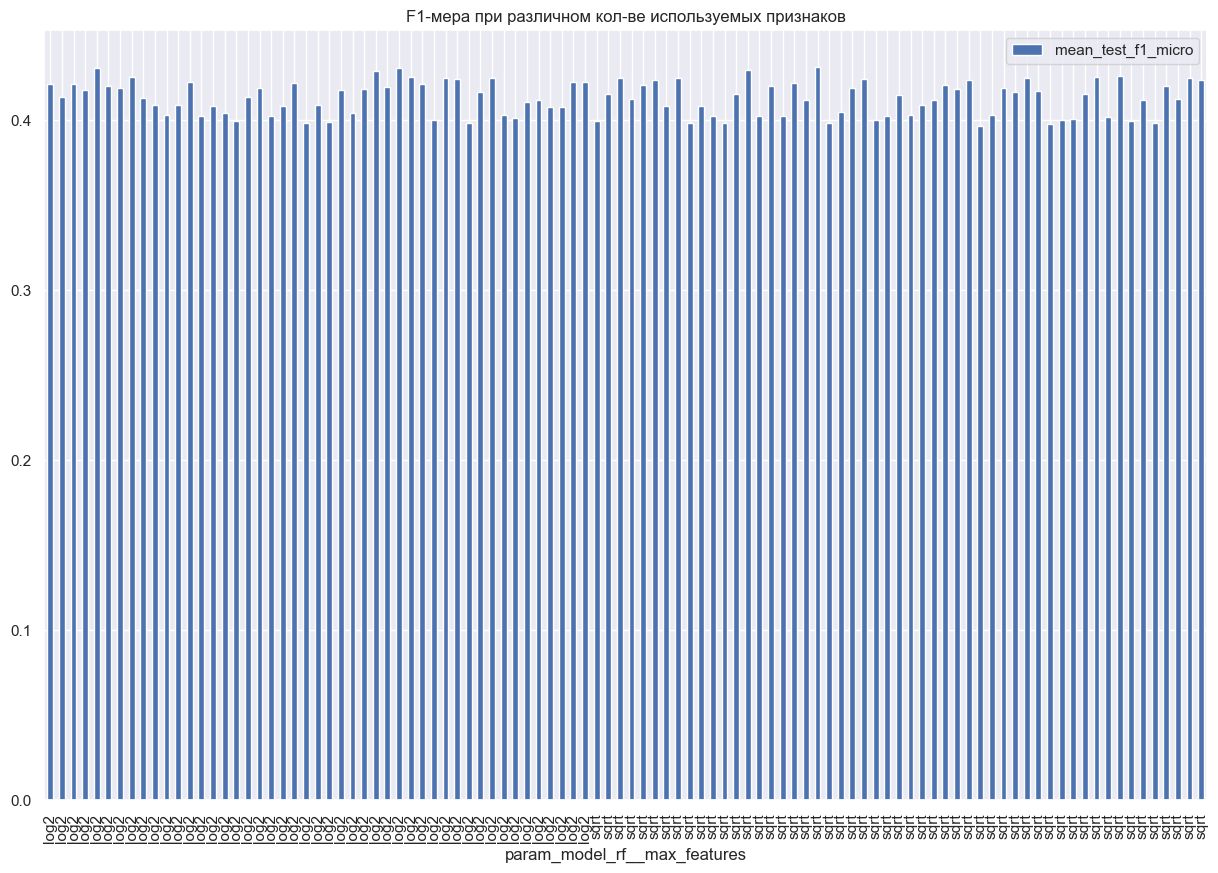

In [169]:
rs_forest_df.sort_values(by='param_model_rf__max_features').plot.bar(x='param_model_rf__max_features', y='mean_test_f1_micro', title='F1-мера при различном кол-ве используемых признаков', figsize=(15,10));

Метрика распределяется равномерно, не зависимо от гиперпараметра.

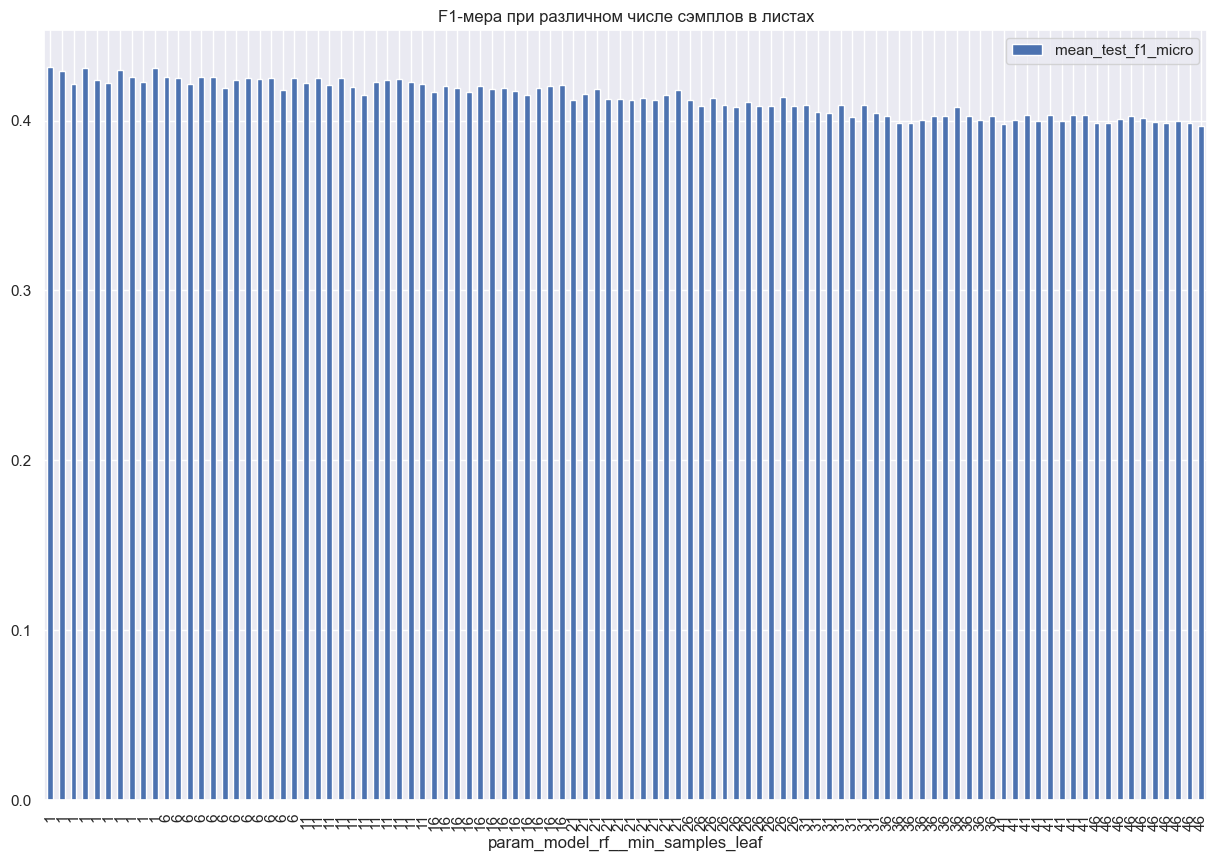

In [170]:
rs_forest_df.sort_values(by='param_model_rf__min_samples_leaf').plot.bar(x='param_model_rf__min_samples_leaf', y='mean_test_f1_micro', title='F1-мера при различном числе сэмплов в листах', figsize=(15,10));

При увеличении числа сэмплов в листе, метрика снижается. Поэтому будем рассматривать минимальное количество.

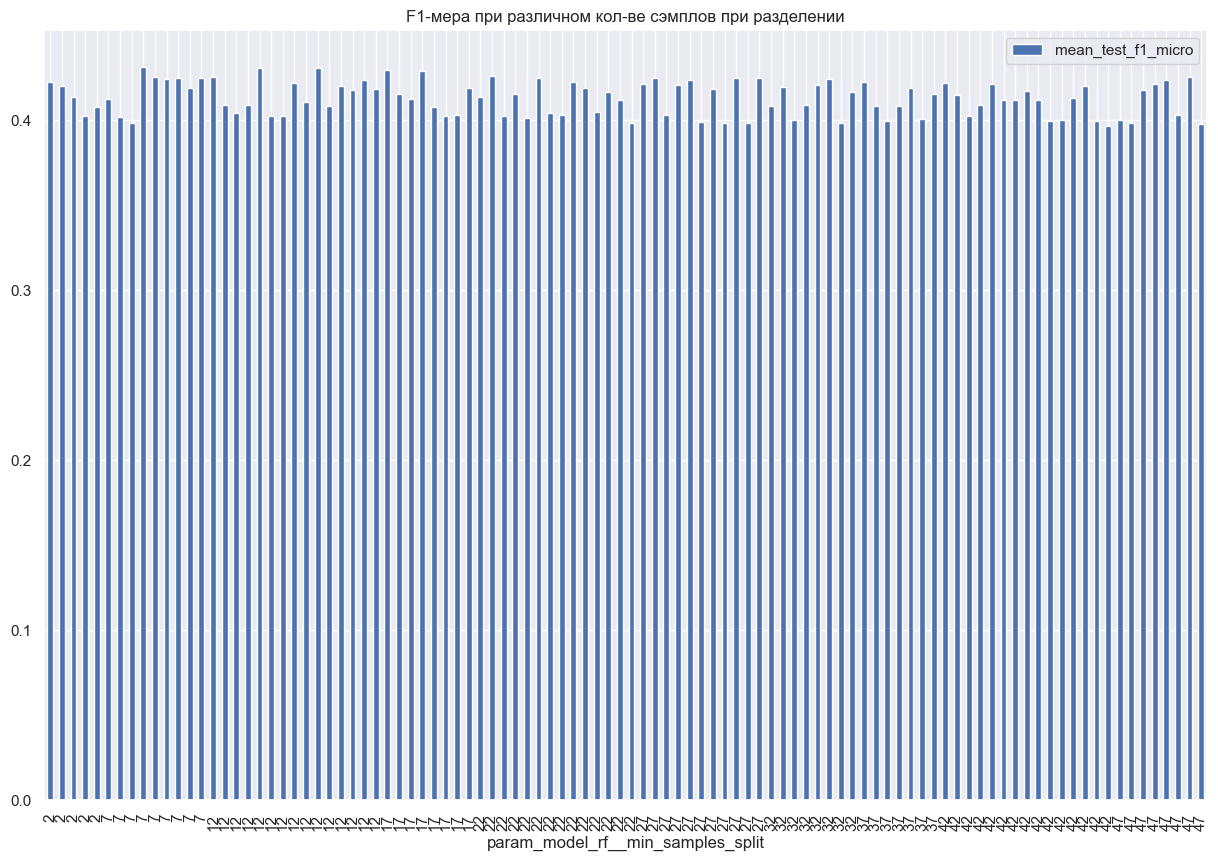

In [171]:
rs_forest_df.sort_values(by='param_model_rf__min_samples_split').plot.bar(x='param_model_rf__min_samples_split', y='mean_test_f1_micro', title='F1-мера при различном кол-ве сэмплов при разделении', figsize=(15,10));

При увеличении числа сэмплов для разбиения узла, метрика также немного снижается. Поэтому будем рассматривать минимальное количество.

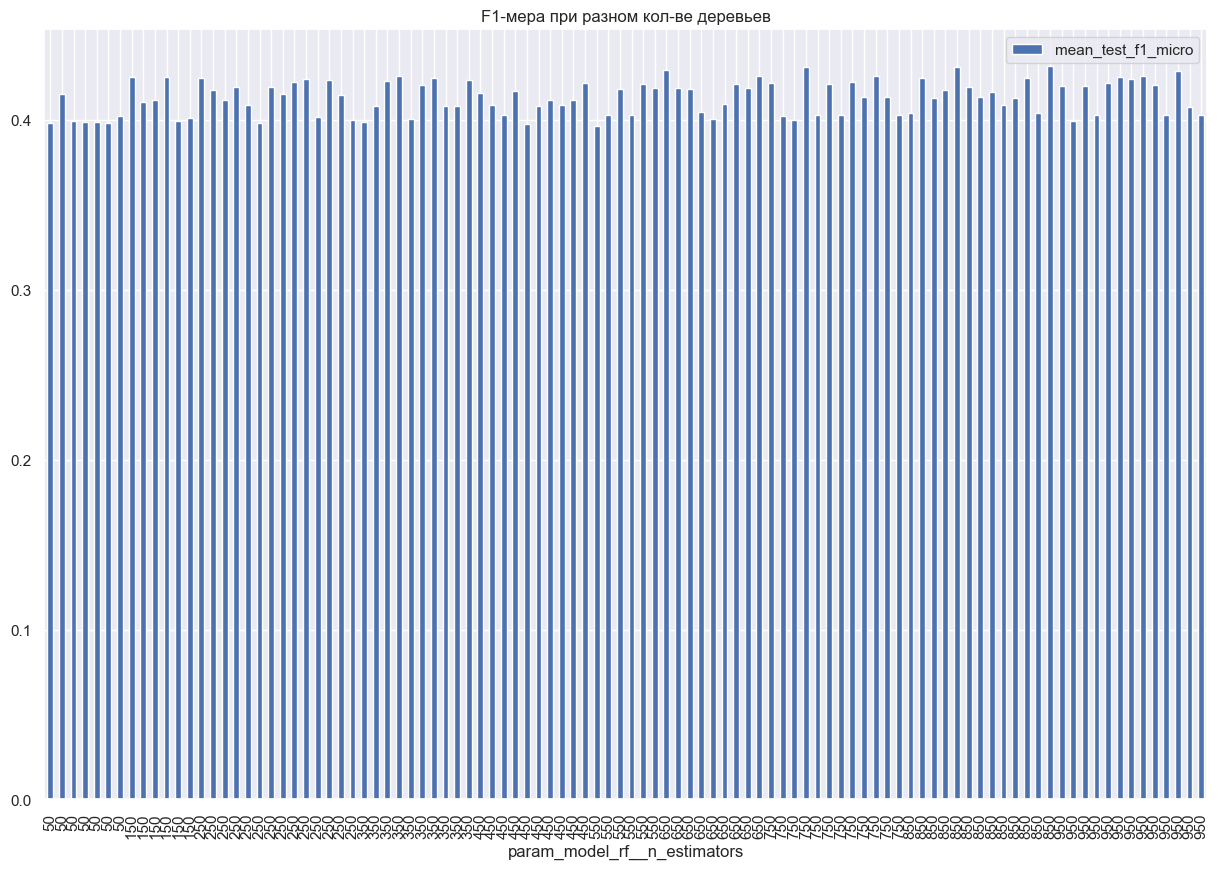

In [172]:
rs_forest_df.sort_values(by='param_model_rf__n_estimators').plot.bar(x='param_model_rf__n_estimators', y='mean_test_f1_micro', title='F1-мера при разном кол-ве деревьев', figsize=(15,10));

Качество немного растет при увеличении количества деревьев.

Теперь рассмотрим гиперпараметры, дающие более высокие оценки, прицельно:

In [174]:
pipeline_rf_gs = Pipeline([('smote', sm), ('model_rf', RandomForestClassifier(random_state=123))])                         


grid_values = {
    'model_rf__criterion': ['entropy'],
    'model_rf__max_depth': [81,101,121],
    'model_rf__n_estimators': [630,810,970],
    'model_rf__max_features': ['log2'],
    'model_rf__min_samples_split': [2],
    'model_rf__min_samples_leaf': [1],
}

scoring = {'accuracy' : make_scorer(accuracy_score), 
          'f1_micro' : make_scorer(fbeta_score, beta=0.5, average='micro')}
           #'f1_macro' : make_scorer(fbeta_score, beta=0.5, average='macro'), 
           #'f1_weighted' : make_scorer(fbeta_score, beta=0.5, average='weighted')}

gs_forest = GridSearchCV(pipeline_rf_gs, grid_values, cv=5, scoring = scoring, refit = 'f1_micro', n_jobs=-1)

gs_forest.fit(sc_train_features_fin, target_train)

gs_forest.best_params_

{'model_rf__criterion': 'entropy',
 'model_rf__max_depth': 81,
 'model_rf__max_features': 'log2',
 'model_rf__min_samples_leaf': 1,
 'model_rf__min_samples_split': 2,
 'model_rf__n_estimators': 630}

In [175]:
gs_forest.best_score_

0.43144981412639405

Рассчитаем модель с полученными гиперпараметрами, а также проверим доп. параметр, использующий балансировку классов:

In [176]:
model = RandomForestClassifier(n_estimators=gs_forest.best_params_['model_rf__n_estimators'], 
                               criterion=gs_forest.best_params_['model_rf__criterion'], 
                               max_depth=gs_forest.best_params_['model_rf__max_depth'], 
                               max_features=gs_forest.best_params_['model_rf__max_features'], 
                               min_samples_leaf=gs_forest.best_params_['model_rf__min_samples_leaf'], 
                               min_samples_split=gs_forest.best_params_['model_rf__min_samples_split'],
                               class_weight='balanced',
                              random_state=123)

model.fit(sc_train_features_fin, target_train)
predictions = model.predict(sc_valid_features_fin)

print(classification_report(target_valid, predictions))
print('Accuracy: ', accuracy_score(target_valid, predictions))
print('F1 мера_micro: ', fbeta_score(target_valid, predictions, beta=0.5, average='micro'))
print('F1 мера_macro: ', fbeta_score(target_valid, predictions, beta=0.5, average='macro'))
print('F1 мера_weighted: ', fbeta_score(target_valid, predictions, beta=0.5, average='weighted'))

              precision    recall  f1-score   support

 Alternative       0.34      0.29      0.31       747
       Anime       0.54      0.46      0.50       575
       Blues       0.42      0.55      0.48       764
   Classical       0.71      0.82      0.76       356
     Country       0.45      0.57      0.50       631
  Electronic       0.58      0.67      0.62       748
     Hip-Hop       0.02      0.00      0.01       329
        Jazz       0.43      0.25      0.31       333
         Rap       0.44      0.68      0.53       654
        Rock       0.19      0.09      0.12       628

    accuracy                           0.46      5765
   macro avg       0.41      0.44      0.41      5765
weighted avg       0.42      0.46      0.43      5765

Accuracy:  0.4577623590633131
F1 мера_micro:  0.4577623590633131
F1 мера_macro:  0.4097072439713581
F1 мера_weighted:  0.4192923405661552


Использование балансировки классов внутри модели случайного леса позволяет дополнительно повысить F-меру до 0.4577.

### 7.2 Подбор гиперпараметров модели логистической регрессии

Произведем также подбор гиперпараметров для модели логистической регрессии:

In [177]:
fsel = SelectKBest(score_func=f_classif, k=k_fin)

pipeline_lr = Pipeline([('smote', sm), ('pol_feat', pol_feat), ('KBest', fsel), 
                        ('model_lr', LogisticRegression(random_state=123))])                         

scoring = {'accuracy' : make_scorer(accuracy_score), 
          'f1_micro' : make_scorer(fbeta_score, beta=0.5, average='micro'),
           'f1_macro' : make_scorer(fbeta_score, beta=0.5, average='macro'), 
           'f1_weighted' : make_scorer(fbeta_score, beta=0.5, average='weighted')}


grid_values = {
    'model_lr__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'model_lr__multi_class': ['multinomial', 'ovr'], 
    'model_lr__solver': ['lbfgs','sag'],
    'model_lr__max_iter': [1000]
}

gs_lr = GridSearchCV(pipeline_lr, 
                               grid_values, 
                               cv=5, 
                               scoring = scoring, 
                               refit = 'f1_micro',
                               n_jobs=-1)

gs_lr.fit(sc_train_features_fin, target_train)

gs_lr.best_params_


{'model_lr__C': 10,
 'model_lr__max_iter': 1000,
 'model_lr__multi_class': 'ovr',
 'model_lr__solver': 'lbfgs'}

In [178]:
gs_lr.best_score_

0.40379182156133825

Подбор гиперпараметров логистической регрессии не помог повысить метрику.

Модель случайного леса показывает более высокие метрики после предобработки данных и оптимизации гиперпараметров. Кроме того, на всех шагах предобработки ее результаты были самыми высокими, т.е. результат более стабилен, чем у модели логистической регрессии, поэтому выбираем ее в качестве финальной модели.

## 8. Анализ лучшей модели

In [179]:
print(classification_report(target_valid, predictions))

              precision    recall  f1-score   support

 Alternative       0.34      0.29      0.31       747
       Anime       0.54      0.46      0.50       575
       Blues       0.42      0.55      0.48       764
   Classical       0.71      0.82      0.76       356
     Country       0.45      0.57      0.50       631
  Electronic       0.58      0.67      0.62       748
     Hip-Hop       0.02      0.00      0.01       329
        Jazz       0.43      0.25      0.31       333
         Rap       0.44      0.68      0.53       654
        Rock       0.19      0.09      0.12       628

    accuracy                           0.46      5765
   macro avg       0.41      0.44      0.41      5765
weighted avg       0.42      0.46      0.43      5765



Классическая музыка обладает характеристиками, наиболее отличающимися от характеристик треков остальных жанров, поэтому для нее видим более высокие метрики классификации.

Характеристики треков остальных жанров имеют более похожие распределения и числовые диапазоны, поэтому классифицировать их было сложнее.

In [180]:
importances_fin = pd.DataFrame({
    'feature':sm_features_train_fin.columns,
    'importance':model.feature_importances_
})
importances_tree.sort_values(by='importance', ascending=False).head(10)

,feature,importance
0,acousticness,0.108169
7,speechiness,0.104228
6,loudness,0.103439
1,danceability,0.102040
4,instrumentalness,0.100482
3,energy,0.091768
9,valence,0.083514
2,duration_ms,0.076252
8,tempo,0.072035
5,liveness,0.065192


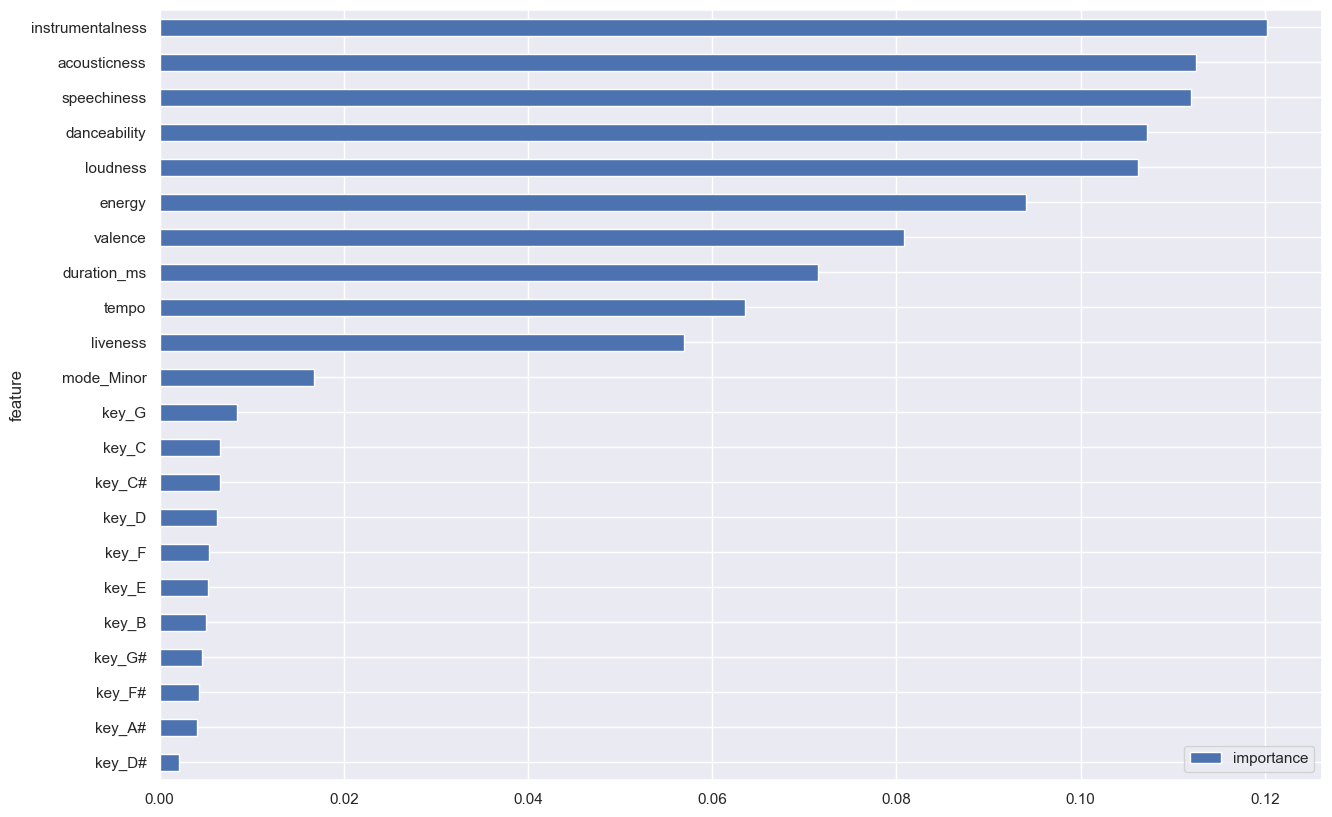

In [181]:
importances_fin.sort_values(by='importance', ascending=True).plot.barh(x='feature', y='importance', figsize=(15,10));

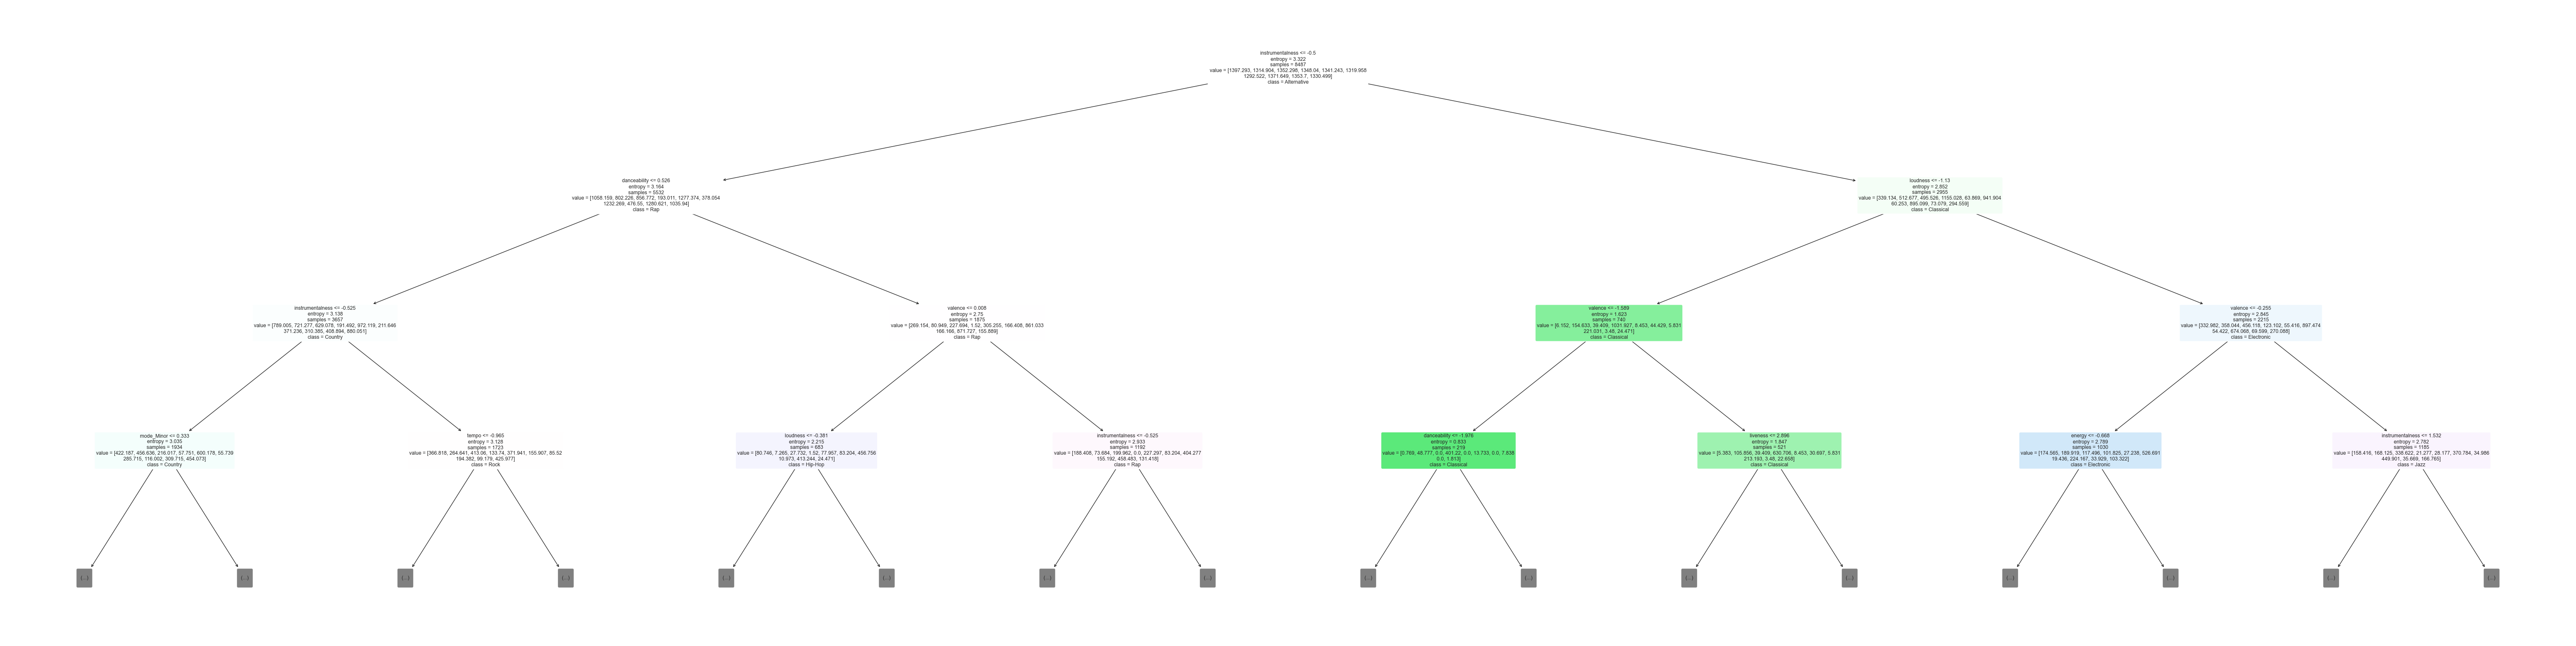

In [182]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[10], max_depth=3, feature_names=sm_features_train_fin.columns, 
          filled=True, rounded=True, class_names=model.classes_);

Наиболее значимыми для классификации являются признаки, описывающие непосредственно саму музыку: инструментальность, аустичность, танцевальность. 

Далее, чем более характеристика является "технической" и более узкой (длительность, темп, модальность, ключ и пр.), тем меньше она позволяла делить выборку на классы.

## 9. Работа с тестовой выборкой

### 9.1 Предобработка тестовых данных

Произведем предобработку тестовых данных аналогично тому, как выполняли для финальной модели:

In [183]:
features_test = pd.read_csv(r'D:\python_projects\Yandex_DS\Мастерская kaggle\датасет\kaggle_music_genre_test.csv')
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [184]:
features_test.duplicated().sum()

0

In [185]:
features_test.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

In [186]:
df_test_q = pd.DataFrame(imputer1.transform(features_test[qcolumns]), columns = \
                         features_test[qcolumns].columns, index = features_test[qcolumns].index)
df_test_cat = pd.DataFrame(imputer2.transform(features_test[cat_columns_impute]), columns = \
                           features_test[cat_columns_impute].columns, index = features_test[cat_columns_impute].index)
df_test = df_test_cat.join(df_test_q)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               5099 non-null   object 
 1   mode              5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   liveness          5099 non-null   float64
 8   loudness          5099 non-null   float64
 9   speechiness       5099 non-null   float64
 10  tempo             5099 non-null   float64
 11  valence           5099 non-null   float64
dtypes: float64(10), object(2)
memory usage: 478.2+ KB


In [187]:
df_test_enc = pd.DataFrame(encoder.transform(df_test[['key', 'mode']]))
df_test_enc.columns = encoder.get_feature_names_out()
df_test_enc.head()

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
data_to_join = df_test.drop(columns=['key', 'mode']).reset_index(drop=True)
df_test_enc = data_to_join.join(df_test_enc)
df_test_enc.shape

(5099, 22)

In [189]:
df_test_sc = pd.DataFrame(scaler.transform(df_test_enc), columns = df_test_enc.columns, 
                                 index = df_test_enc.index)
df_test_sc.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.090046,1.134858,-0.666137,0.212303,-0.520643,0.977161,0.247179,3.521947,-1.008293,1.760790,3.834572,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,1.340443
1,0.829763,-1.812633,0.246257,-0.410524,-0.493516,-0.751846,0.603271,-0.680819,-1.404700,-0.605809,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,3.684331,-0.746022
2,-0.831229,0.670084,0.669180,0.575619,-0.520643,-0.560791,0.744183,1.797603,-1.020242,-0.220263,-0.260785,-0.288232,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,1.340443
3,-0.786065,0.164127,-0.364345,0.491777,-0.520643,-0.457732,0.706958,-0.437610,1.298290,0.608252,-0.260785,3.469426,-0.345798,-0.341973,-0.345798,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,-0.746022
4,-0.848379,-0.841902,-2.083122,-0.713953,-0.472388,-1.128406,-0.060975,1.540238,-1.555471,-1.413816,-0.260785,-0.288232,-0.345798,-0.341973,2.891864,-0.177381,-0.291676,-0.295091,-0.254175,-0.368839,-0.271420,-0.746022


### 9.2 Получение предсказаний на тестовой выборке

In [190]:
predictions = model.predict(df_test_sc)

In [191]:
results_df = pd.DataFrame({
    'id': features_test['instance_id'],
    'genre':predictions
}) 
results_df

,id,genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Alternative
...,...,...
5094,50532,Blues
5095,26255,Alternative
5096,67924,Rap
5097,79778,Electronic


In [192]:
results_df.to_csv('results.csv', index= False )

## 10. Общий вывод

**Датасет**

Для работы использовались данные о наборе музыкальных треков и их характеристик. Полнота и чистота данных хорошая: только по трем признакам были пропущены всего 3, 2 и 1,8% значений. Дубликаты отсутствуют.

**Анализ данных**

Анализ данных позволяет сделать следующие наблюдения:
 - Классическая музыка больше всех жанров отличается своими характеристиками от остальных: она обладает значительно большей акустичностью, меньшей танцевальностью, значительно меньшей энергичностью, громкостью и привлекательностью для пользователей сервиса.
 - Рэп и хип-хоп обладают наибольшей танцевальностью и низкой (ниже только у классики и джаза) энергичностью.
 - Джаз и блюз имеют самые низкие (не беря во внимание сильно отличающуюся классику) энергичность и громкость.
 - Остальные характеристики у треков разных жанров имеют примерно одинаковые распределения.
 
При этом, из матрицы корреляции следует, что наибольшая взаимосвязь между музыкальным жанром прослеживается у акустичности, танцевальности, энергичности и громкости.

**Модели и методы предобработки**

В качестве моделей для классификации треков рассматривались алгоритмы логистической регрессии, решающего дерева и случайного леса. В качестве метрики была выбрана F-мера (микро).

Для максимизации метрики были исследованы следующие меры:
 - Заполнение пропусков наиболее частыми значениями внутри классов
 - Заполнение пропусков методом Simple Imputer
 - Заполнение пропусков методом KNN imputation
 - Создание синтетических признаков
 - Отбор набора обучающих признаков методом F-тестирования ANOVA
 - Отбор набора обучающих признаков методом Mutual information
 - Отбор набора обучающих признаков на основе их важности
 - Поиск оптимальных гиперпараметров
 
Наибольшее значение F-меры базовой модели показал алгоритм случайного леса. Наименьшее – модель решающего дерева. Поэтому для оптимизации рассматривались только модели случайного леса и логистической регрессии.

Повысить значение F-меры случайного леса с 0.4295 у базовой модели до 0.4577 удалось заполнением пропусков методом Simple Imputer (для данных о темпе использовалось медианное значение по всей выборке, для данных о ключе и модальности – наиболее частое).

Повысить значение метрики модели логистической регрессии с 0.3652 у базовой модели до 0.4143 удалось созданием синтетических признаков алгоритмом полиномиальной регрессии с последующим отбором наиболее важных признаков с помощью анализа ANOVA.  

**Анализ итоговой модели**

В качестве итоговой модели был выбран алгоритм случайного леса, т.к. он позволил достичь более высокое значение метрики, а также продемонстрировал большую стабильность в достижении более высокого качества.

Анализ итоговой модели показал, что наиболее значимыми для классификации являются признаки, описывающие непосредственно саму музыку: инструментальность, аустичность, танцевальность.

Далее, чем более характеристика является "технической" и более узкой (длительность, темп, модальность, ключ и пр.), тем меньше она позволяла делить выборку на классы.

Классическая музыка обладает характеристиками, наиболее отличающимися от характеристик треков остальных жанров, поэтому для нее метрики классификации оказались выше (0.76). Характеристики треков остальных жанров имеют более похожие распределения и числовые диапазоны, поэтому их разделить было сложнее.